### Goal: Predict a Profitable DraftKings Fantasy Basketball Lineup.
### I have collected data from FantasyCruncher, RotoGuru and ESPN.  I have create two regression models (simple linear regression and Keras).
### There are currently no risks, just optimization.
### My assumptions are the same: Past performance will determine the highest scoring players on a daily basis.
### Performed & summarized the EDA of the data - See below EDA and current DataFrame.


In [938]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import numpy as np
import re

# A data legend and other notes about this file can be found in rotoguru1.com/hoop/nba-dhd-2018-notes.txt

# Data obtained from RotoGuru for 2017-2018 Season for Fantasy Basketball Players.

# Data is separated by ':'

# Use delimiter=':' to separate into columns.


# use pd.read_csv to load the previous DraftKings data and assign to variable 'nba_2017'

nba_2017 = pd.read_csv('DK_2017-2018_1206.csv', delimiter=':')



In [939]:
# view the columns in nba_2017

nba_2017.columns

Index(['GID', 'Last, First', 'First  Last', 'Date', 'Team', 'Opp', 'H/A',
       'GameID', 'GTime(ET)', 'Team pts', 'Opp pts', 'Start', 'Minutes', 'GP',
       'active', 'FDP', 'DKP', 'DDP', 'YHP', 'Stats', 'DoubleD', 'TripleD',
       'FD Sal', 'FD Change', 'DK Sal', 'DK Change', 'DD Sal', 'DD Change',
       'YH Sal', 'YH Change', 'FD pos', 'DK pos', 'DD pos', 'YH pos',
       'Unnamed: 34'],
      dtype='object')

In [940]:
# view the data in nba_2017

nba_2017

GID           Last, First          First  Last      Date Team  Opp  \
0      5153      Mason III, Frank      Frank Mason III  20171206  sac  cle   
1      5153      Mason III, Frank      Frank Mason III  20171202  sac  mil   
2      5153      Mason III, Frank      Frank Mason III  20171201  sac  chi   
3      5153      Mason III, Frank      Frank Mason III  20171128  sac  mil   
4      5153      Mason III, Frank      Frank Mason III  20171127  sac  gsw   
5      5153      Mason III, Frank      Frank Mason III  20171125  sac  lac   
6      5153      Mason III, Frank      Frank Mason III  20171122  sac  lal   
7      5153      Mason III, Frank      Frank Mason III  20171120  sac  den   
8      5153      Mason III, Frank      Frank Mason III  20171118  sac  por   
9      5153      Mason III, Frank      Frank Mason III  20171117  sac  por   
10     5153      Mason III, Frank      Frank Mason III  20171115  sac  atl   
11     5153      Mason III, Frank      Frank Mason III  20171113  sac  was   
12     5153      Mason III, Frank      Frank Mason III  20171111  sac  nyk   
13     5153      Mason III, Frank      Frank Mason III  20171109  sac  phi   
14     5153      Mason III, Frank      Frank Mason III  20171107  sac  okc   
15     5153      Mason III, Frank      Frank Mason III  20171104  sac  det   
16     5153      Mason III, Frank      Frank Mason III  20171101  sac  bos   
17     5153      Mason III, Frank      Frank Mason III  20171031  sac  ind   
18     5153      Mason III, Frank      Frank Mason III  20171029  sac  was   
19     5153      Mason III, Frank      Frank Mason III  20171026  sac  nor   
20     5153      Mason III, Frank      Frank Mason III  20171023  sac  pho   
21     5153      Mason III, Frank      Frank Mason III  20171021  sac  den   
22     5153      Mason III, Frank      Frank Mason III  20171020  sac  dal   
23     5153      Mason III, Frank      Frank Mason III  20171018  sac  hou   
24     3816       Williams, Louis       Louis Williams  20171206  lac  min   
25     3816       Williams, Louis       Louis Williams  20171203  lac  min   
26     3816       Williams, Louis       Louis Williams  20171202  lac  dal   
27     3816       Williams, Louis       Louis Williams  20171130  lac  uta   
28     3816       Williams, Louis       Louis Williams  20171127  lac  lal   
29     3816       Williams, Louis       Louis Williams  20171125  lac  sac   
...     ...                   ...                  ...       ...  ...  ...   
12058  5130         Jackson, Josh         Josh Jackson  20171028  pho  por   
12059  5130         Jackson, Josh         Josh Jackson  20171025  pho  uta   
12060  5130         Jackson, Josh         Josh Jackson  20171023  pho  sac   
12061  5130         Jackson, Josh         Josh Jackson  20171021  pho  lac   
12062  5130         Jackson, Josh         Josh Jackson  20171020  pho  lal   
12063  5130         Jackson, Josh         Josh Jackson  20171018  pho  por   
12064  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171206  sac  cle   
12065  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171202  sac  mil   
12066  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171201  sac  chi   
12067  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171128  sac  mil   
12068  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171127  sac  gsw   
12069  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171125  sac  lac   
12070  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171122  sac  lal   
12071  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171120  sac  den   
12072  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171118  sac  por   
12073  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171117  sac  por   
12074  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171115  sac  atl   
12075  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171113  sac  was   
12076  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171111  sac  nyk   
12077  4817  Cauley-Stein, Wil

In [941]:
# See how many columns and rows in the DataFrame.

nba_2017.shape

(12088, 35)

In [942]:
# Locate a single game day to see if the columns are what you need.

nba_2017.loc[nba_2017['Date']== 20171206,:].sort_values('DKP', ascending=False)


GID            Last, First           First  Last      Date Team  Opp  \
0      5153       Mason III, Frank       Frank Mason III  20171206  sac  cle   
24     3816        Williams, Louis        Louis Williams  20171206  lac  min   
47     5006             Baker, Ron             Ron Baker  20171206  nyk  mem   
71     4379          Irving, Kyrie          Kyrie Irving  20171206  bos  dal   
97     4863            Cook, Quinn            Quinn Cook  20171206  gsw  cha   
123    4628      Hardaway Jr., Tim      Tim Hardaway Jr.  20171206  nyk  mem   
147    4564            Curry, Seth            Seth Curry  20171206  dal  bos   
172    3670            Smith, Josh            Josh Smith  20171206  nor  den   
180    4932   Finney-Smith, Dorian   Dorian Finney-Smith  20171206  dal  bos   
205    4316      Stephenson, Lance      Lance Stephenson  20171206  ind  chi   
230    4112           Lopez, Robin           Robin Lopez  20171206  chi  ind   
253    4963       Murray, Dejounte       Dejounte Murray  20171206  sas  mia   
278    4845     Felicio, Cristiano     Cristiano Felicio  20171206  chi  ind   
301    2448          Carter, Vince          Vince Carter  20171206  sac  cle   
371    4893      Marjanovic, Boban      Boban Marjanovic  20171206  det  mil   
395    4788       Richardson, Josh       Josh Richardson  20171206  mia  sas   
419    4212          Holiday, Jrue          Jrue Holiday  20171206  nor  den   
467    4384          Thomas, Lance          Lance Thomas  20171206  nyk  mem   
516    3811       Webster, Martell       Martell Webster  20171206  nor  den   
539    5228      Blakeney, Antonio      Antonio Blakeney  20171206  chi  ind   
562    4926  Papagiannis, Georgios  Georgios Papagiannis  20171206  sac  cle   
586    5167           Giles, Harry           Harry Giles  20171206  sac  cle   
610    5148         White, Derrick         Derrick White  20171206  sas  mia   
657    5198    Walton Jr., Derrick    Derrick Walton Jr.  20171206  mia  sas   
681    5135        Jackson, Justin        Justin Jackson  20171206  sac  cle   
728    3986          Durant, Kevin          Kevin Durant  20171206  gsw  cha   
754    3972          Anthony, Joel          Joel Anthony  20171206  mil  det   
755    4969    Richardson, Malachi    Malachi Richardson  20171206  sac  cle   
803    4982         Uthoff, Jarrod         Jarrod Uthoff  20171206  ind  chi   
804    4086         Batum, Nicolas         Nicolas Batum  20171206  cha  gsw   
...     ...                    ...                   ...       ...  ...  ...   
11371  3637          Harris, Devin          Devin Harris  20171206  dal  bos   
11396  4529          O'Quinn, Kyle          Kyle O'Quinn  20171206  nyk  mem   
11420  4970          Ferrell, Yogi          Yogi Ferrell  20171206  dal  bos   
11445  4632          Dieng, Gorgui          Gorgui Dieng  20171206  min  lac   
11471  5142         Petrasek, Luke         Luke Petrasek  20171206  cha  gsw   
11472  4650       McGruder, Rodney       Rodney McGruder  20171206  mia  sas   
11496  5193        Mathews, Jordan        Jordan Mathews  20171206  atl  orl   
11497  5175           Lydon, Tyler           Tyler Lydon  20171206  den  nor   
11521  4315         Smith, Ishmael         Ishmael Smith  20171206  det  mil   
11568  5191          Morris, Monte          Monte Morris  20171206  den  nor   
11592  4228       Collison, Darren       Darren Collison  20171206  ind  chi   
11617  4266          Bledsoe, Eric          Eric Bledsoe  20171206  mil  det   
11642  4610   Dellavedova, Matthew   Matthew Dellavedova  20171206  mil  det   
11665  4278          Evans, Jeremy          Jeremy Evans  20171206  atl  orl   
11666  4572        Dedmon, Dewayne        Dewayne Dedmon  20171206  atl  orl   
11690  4728         Parker, Jabari         Jabari Parker  20171206  mil  det   
11713  4678           Harris, Gary           Gary Harris  20171206  den  nor   
11737  4442           Kanter, Enes           Enes Kanter  20171206  nyk  mem   
11787  5

In [943]:
# Import the 2017-2018 DraftKings perfect lineups from https://www.fantasycruncher.com/lineup-rewind/draftkings/NBA/

# Read it as a DataFrame

# Assign it to "perfectlineup"

perfectlineup = pd.read_csv('NBA 2017-2018.csv')

In [944]:
# view the head of perfectlineup
perfectlineup.tail()

Date                     PG                    SG  \
47  12/5/2017  Russell Westbrook (0)  Donovan Mitchell (0)   
48  12/6/2017       Jarrett Jack (0)       Buddy Hield (0)   
49  12/7/2017         Lonzo Ball (0)    Brandon Ingram (0)   
50  12/8/2017    Emmanuel Mudiay (0)         Kris Dunn (0)   
51  12/9/2017                    NaN                   NaN   

                     SF                 PF                   C  \
47     Devin Booker (0)    Serge Ibaka (0)     Greg Monroe (0)   
48     Kevin Durant (0)  Zach Randolph (0)  Nikola Vucevic (0)   
49  Markieff Morris (0)    Greg Monroe (0)     Joel Embiid (0)   
50  Marvin Williams (0)   Kevin Durant (0)   Dwight Howard (0)   
51                  NaN                NaN                 NaN   

                      G                    F                  UTIL  
47     Bradley Beal (0)  Thabo Sefolosha (0)        Mike Scott (0)  
48    Tyler Johnson (0)      Maxi Kleber (0)  DeMarcus Cousins (0)  
49     Caris LeVert (0)    Ryan Anderson (0)        Chris Paul (0)  
50  Wesley Matthews (0)    Zach Randolph (0)    Nikola Vucevic (0)  
51                  NaN                  NaN                   NaN

In [945]:
# Use regex to replace the (0)'s with '' in each perfectlineup cell.
# reassign to their columns.

perfectlineup['PG'] = perfectlineup['PG'].replace('[(0)]', '',regex=True)
perfectlineup['SG'] = perfectlineup['SG'].replace('[(0)]', '',regex=True)
perfectlineup['SF'] = perfectlineup['SF'].replace('[(0)]', '',regex=True)
perfectlineup['PF'] = perfectlineup['PF'].replace('[(0)]', '',regex=True)
perfectlineup['C'] = perfectlineup['C'].replace('[(0)]', '',regex=True)
perfectlineup['G'] = perfectlineup['G'].replace('[(0)]', '',regex=True)
perfectlineup['F'] = perfectlineup['F'].replace('[(0)]', '',regex=True)
perfectlineup['UTIL'] = perfectlineup['UTIL'].replace('[(0)]', '',regex=True)

# Use regex to replace the space at the end of each name with '' in each perfectlineup cell.
# reassign to perfectlineup.

perfectlineup = perfectlineup.replace('\s+$', '',regex=True)

# convert the Date column to timeseries
# reassign to perfectlineup['Date']
# Sort the values of perfectlineup in ascending order by the date.

perfectlineup['Date'] = pd.to_datetime(perfectlineup.Date)
perfectlineup.sort_values('Date')

# View "perfectlineup"
perfectlineup


Date                     PG                        SG  \
0  2017-10-17           Kyrie Irving              Jaylen Brown   
1  2017-10-18        Darren Collison             Dillon Brooks   
2  2017-10-19      Russell Westbrook                C.J. Miles   
3  2017-10-20      Spencer Dinwiddie             Evan Fournier   
4  2017-10-21         Victor Oladipo             D.J. Augustin   
5  2017-10-22       D'Angelo Russell           Jordan Clarkson   
6  2017-10-23        Dejounte Murray               Eric Gordon   
7  2017-10-24            Cory Joseph             Evan Fournier   
8  2017-10-25         T.J. McConnell         Spencer Dinwiddie   
9  2017-10-26  Giannis Antetokounmpo          Denzel Valentine   
10 2017-10-27            Jeff Teague           Kelly Oubre Jr.   
11 2017-10-28           Jrue Holiday             Austin Rivers   
12 2017-10-29           Kemba Walker          Tim Hardaway Jr.   
13 2017-10-30            Jeff Teague              Dion Waiters   
14 2017-10-31       D'Angelo Russell              Devin Booker   
15 2017-11-01         Damian Lillard              Tyreke Evans   
16 2017-11-02        Jordan Clarkson             Kyle Anderson   
17 2017-11-03       Donovan Mitchell               J.J. Redick   
18 2017-11-04          Jameer Nelson            Justin Holiday   
19 2017-11-05           James Harden               Dwyane Wade   
20 2017-11-06           Kyrie Irving           Marco Belinelli   
21 2017-11-07          C.J. McCollum           Khris Middleton   
22 2017-11-08          Elfrid Payton                Nick Young   
23 2017-11-09           James Harden              Jrue Holiday   
24 2017-11-10            Cory Joseph             Kent Bazemore   
25 2017-11-11       Dennis Smith Jr.              Devin Booker   
26 2017-11-12           James Harden              Luke Kennard   
27 2017-11-13       Donovan Mitchell          Tim Hardaway Jr.   
28 2017-11-14           James Harden         Spencer Dinwiddie   
29 2017-11-15             Kyle Lowry               Rodney Hood   
30 2017-11-16           James Harden              Troy Daniels   
31 2017-11-17            Dwyane Wade         Spencer Dinwiddie   
32 2017-11-18          Stephen Curry               Rodney Hood   
33 2017-11-19          Stephen Curry              Allen Crabbe   
34 2017-11-20      Russell Westbrook            Victor Oladipo   
35 2017-11-22      Russell Westbrook               Jeremy Lamb   
36 2017-11-24             Kyle Lowry              Terry Rozier   
37 2017-11-25          Elfrid Payton              James Harden   
38 2017-11-26             Mike James              Jimmy Butler   
39 2017-11-27           James Harden  Kentavious Caldwell-Pope   
40 2017-11-28             Tyler Ulis              Jimmy Butler   
41 2017-11-29            Ben Simmons           Kelly Oubre Jr.   
42 2017-11-30             Alec Burks               Will Barton   
43 2017-12-01            Rajon Rondo            Victor Oladipo   
44 2017-12-02           Jamal Murray              Devin Booker   
45 2017-12-03      Russell Westbrook             Austin Rivers   
46 2017-12-04             Alec Burks              Jrue Holiday   
47 2017-12-05      Russell Westbrook          Donovan Mitchell   
48 2017-12-06           Jarrett Jack               Buddy Hield   
49 2017-12-07             Lonzo Ball            Brandon Ingram   
50 2017-12-08        Emmanuel Mudiay                 Kris Dunn   
51 2017-12-09                    NaN                       NaN   

                       SF                  PF                   C  \
0            LeBron James        Jayson Tatum      Draymond Green   
1           Tobias Harris      Thaddeus Young    Hassan Whiteside   
2         Larry Nance Jr.  Kristaps Porzingis   Jonas Valanciunas   
3             Otto Porter     Al-Farouq Aminu      Nikola Vucevic   
4   Giannis Antetokounmpo       James Johnson          Marc Gasol   
5            Caris LeVert        John Collins        Steven Adams   
6             Ben Simmons  

In [946]:
# View the unique dates in perfectlineup

perfectlineup['Date'].unique()


array(['2017-10-17T00:00:00.000000000', '2017-10-18T00:00:00.000000000',
       '2017-10-19T00:00:00.000000000', '2017-10-20T00:00:00.000000000',
       '2017-10-21T00:00:00.000000000', '2017-10-22T00:00:00.000000000',
       '2017-10-23T00:00:00.000000000', '2017-10-24T00:00:00.000000000',
       '2017-10-25T00:00:00.000000000', '2017-10-26T00:00:00.000000000',
       '2017-10-27T00:00:00.000000000', '2017-10-28T00:00:00.000000000',
       '2017-10-29T00:00:00.000000000', '2017-10-30T00:00:00.000000000',
       '2017-10-31T00:00:00.000000000', '2017-11-01T00:00:00.000000000',
       '2017-11-02T00:00:00.000000000', '2017-11-03T00:00:00.000000000',
       '2017-11-04T00:00:00.000000000', '2017-11-05T00:00:00.000000000',
       '2017-11-06T00:00:00.000000000', '2017-11-07T00:00:00.000000000',
       '2017-11-08T00:00:00.000000000', '2017-11-09T00:00:00.000000000',
       '2017-11-10T00:00:00.000000000', '2017-11-11T00:00:00.000000000',
       '2017-11-12T00:00:00.000000000', '2017-11-13

In [947]:
# Perform value counts for the Point Guard position.

perfectlineup['PG'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

James Harden             6
Russell Westbrook        5
Jeff Teague              2
D'Angelo Russell         2
Kyrie Irving             2
Stephen Curry            2
Cory Joseph              2
Alec Burks               2
Donovan Mitchell         2
Elfrid Payton            2
Kyle Lowry               2
Dwyane Wade              1
Jameer Nelson            1
Darren Collison          1
Ben Simmons              1
Jrue Holiday             1
T.J. McConnell           1
Spencer Dinwiddie        1
Dejounte Murray          1
Emmanuel Mudiay          1
Jamal Murray             1
Lonzo Ball               1
Rajon Rondo              1
Jordan Clarkson          1
Dennis Smith Jr.         1
Giannis Antetokounmpo    1
Kemba Walker             1
Mike James               1
Tyler Ulis               1
Damian Lillard           1
Jarrett Jack             1
C.J. McCollum            1
Victor Oladipo           1
Name: PG, dtype: int64

In [948]:
# Perform value counts for the Shooting Guard position.

perfectlineup['SG'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Devin Booker                3
Spencer Dinwiddie           3
Tim Hardaway Jr.            2
Jimmy Butler                2
Rodney Hood                 2
Austin Rivers               2
Jrue Holiday                2
Evan Fournier               2
Victor Oladipo              2
Kelly Oubre Jr.             2
James Harden                1
Nick Young                  1
Justin Holiday              1
C.J. Miles                  1
Tyreke Evans                1
D.J. Augustin               1
Allen Crabbe                1
Kyle Anderson               1
Jaylen Brown                1
Dillon Brooks               1
Kris Dunn                   1
Kentavious Caldwell-Pope    1
Denzel Valentine            1
Jeremy Lamb                 1
Brandon Ingram              1
Luke Kennard                1
J.J. Redick                 1
Eric Gordon                 1
Marco Belinelli             1
Dion Waiters                1
Will Barton                 1
Buddy Hield                 1
Khris Middleton             1
Jordan Cla

In [949]:
# Perform value counts for the Small Forward position.

perfectlineup['SF'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Khris Middleton          3
LeBron James             3
Devin Booker             3
Will Barton              2
Giannis Antetokounmpo    2
Tobias Harris            2
T.J. Warren              2
Kevin Durant             2
Tyreke Evans             2
Kent Bazemore            2
Luc Mbah a Moute         1
Andrew Wiggins           1
Evan Fournier            1
Harrison Barnes          1
Lance Stephenson         1
Courtney Lee             1
Wesley Matthews          1
Jaylen Brown             1
Larry Nance Jr.          1
Ersan Ilyasova           1
Paul George              1
Wayne Ellington          1
Marcus Smart             1
Kyle Kuzma               1
Denzel Valentine         1
Markieff Morris          1
Al-Farouq Aminu          1
Taurean Prince           1
Otto Porter              1
Chandler Parsons         1
Michael Beasley          1
Davis Bertans            1
Marvin Williams          1
Caris LeVert             1
Ben Simmons              1
Trevor Ariza             1
Bojan Bogdanovic         1
D

In [950]:
# Perform value counts for the Power Forward position.

perfectlineup['PF'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Greg Monroe           3
Otto Porter           3
Derrick Favors        2
Jayson Tatum          2
LeBron James          2
Aaron Gordon          2
Enes Kanter           2
Kevin Love            2
Serge Ibaka           2
James Johnson         2
LaMarcus Aldridge     2
Draymond Green        1
Alex Len              1
Harrison Barnes       1
Kristaps Porzingis    1
Larry Nance Jr.       1
DeMarcus Cousins      1
T.J. Warren           1
Robert Covington      1
Jeff Green            1
Lauri Markkanen       1
Noah Vonleh           1
Julius Randle         1
Markieff Morris       1
Thaddeus Young        1
John Collins          1
Dirk Nowitzki         1
Kyle O'Quinn          1
Domantas Sabonis      1
Al-Farouq Aminu       1
Taj Gibson            1
Jerami Grant          1
Gorgui Dieng          1
Kevin Durant          1
Dario Saric           1
Wesley Johnson        1
Zach Randolph         1
Al Horford            1
Name: PF, dtype: int64

In [951]:
# Perform value counts for the Guard position.

perfectlineup['G'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Kyle Lowry               3
Jimmy Butler             3
Lonzo Ball               2
Juan Jose Barea          2
Stephen Curry            2
Jeff Teague              2
Louis Williams           1
Goran Dragic             1
Jameer Nelson            1
Yogi Ferrell             1
Justin Holiday           1
Klay Thompson            1
Chris Paul               1
Gary Harris              1
Alec Burks               1
Danny Green              1
Kyrie Irving             1
Spencer Dinwiddie        1
Dennis Smith Jr.         1
D'Angelo Russell         1
Tim Hardaway Jr.         1
Ben Simmons              1
Darren Collison          1
Emmanuel Mudiay          1
Tyus Jones               1
Wesley Matthews          1
Delon Wright             1
Mike James               1
James Harden             1
T.J. McConnell           1
Caris LeVert             1
Donovan Mitchell         1
Jeremy Lamb              1
Fred VanVleet            1
Khris Middleton          1
Iman Shumpert            1
Tyler Johnson            1
K

In [952]:
# Perform value counts for the Forward position.

perfectlineup['F'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Brandon Ingram           3
Zach Randolph            3
Thabo Sefolosha          3
LeBron James             2
Devin Booker             2
Robert Covington         2
Anthony Davis            2
Kyle Kuzma               2
Kevin Durant             2
Blake Griffin            1
Bobby Portis             1
E'Twaun Moore            1
Wesley Matthews          1
Ryan Anderson            1
Tim Hardaway Jr.         1
Draymond Green           1
Andrew Wiggins           1
Paul George              1
Dario Saric              1
C.J. Miles               1
Alex Len                 1
Maxi Kleber              1
Jonathon Simmons         1
J.R. Smith               1
Jarell Martin            1
Julius Randle            1
Marquese Chriss          1
Derrick Favors           1
Josh Richardson          1
Lucas Nogueira           1
Jordan Bell              1
Giannis Antetokounmpo    1
Paul Millsap             1
Patrick McCaw            1
Jeff Green               1
Marcus Smart             1
James Johnson            1
P

In [953]:
# Perform value counts for the Center position.

perfectlineup['C'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Andre Drummond        6
Jusuf Nurkic          4
Dwight Howard         4
Nikola Vucevic        3
DeMarcus Cousins      2
Joel Embiid           2
Marc Gasol            2
Tyson Chandler        2
Clint Capela          2
Karl-Anthony Towns    2
Ryan Anderson         2
Hassan Whiteside      1
Alex Len              1
Dewayne Dedmon        1
Salah Mejri           1
Kristaps Porzingis    1
Draymond Green        1
Greg Monroe           1
Steven Adams          1
Mike Muscala          1
Myles Turner          1
DeAndre Jordan        1
John Collins          1
Kyle O'Quinn          1
Paul Millsap          1
Domantas Sabonis      1
LaMarcus Aldridge     1
Gorgui Dieng          1
Jonas Valanciunas     1
Kevin Love            1
Nikola Jokic          1
Name: C, dtype: int64

In [954]:
# Perform value counts for the Utility position.

perfectlineup['UTIL'].value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Nikola Jokic             3
Brook Lopez              2
Kris Dunn                2
Damian Lillard           2
Willie Cauley-Stein      2
DeMarcus Cousins         2
Louis Williams           1
Brandon Ingram           1
Rudy Gobert              1
Kristaps Porzingis       1
Chris Paul               1
Robert Covington         1
Clint Capela             1
T.J. Warren              1
Lonzo Ball               1
Joel Embiid              1
Jimmy Butler             1
Pascal Siakam            1
Nick Young               1
Jamal Crawford           1
Reggie Jackson           1
Al Horford               1
Josh Jackson             1
Hassan Whiteside         1
Jusuf Nurkic             1
Karl-Anthony Towns       1
Mike James               1
Tyus Jones               1
Dejounte Murray          1
John Henson              1
Dirk Nowitzki            1
Paul George              1
Khris Middleton          1
Giannis Antetokounmpo    1
Buddy Hield              1
Nikola Vucevic           1
Jeff Teague              1
M

In [955]:
# Import the 2017-2018 Defensive Real Plus Minus from http://www.espn.com/nba/statistics/rpm/_/year/2018/sort/DRPM

# Read it as a DataFrame

# Assign it to "drpm"

drpm = pd.read_csv('drpm.csv', delimiter=',')

In [956]:
# print the head of drpm

drpm.head()

RK                NAME TEAM    GP   MPG  ORPM  DRPM   RPM  WINS
0  1    Vince Carter, SG  SAC  12.0  12.0 -1.82  0.16 -1.66  0.10
1  2  Jamal Crawford, SG  MIN  22.0  17.4 -0.04 -2.12 -2.16  0.22
2  3   Manu Ginobili, SG   SA  18.0  20.1 -0.97 -0.83 -1.80  0.27
3  4   Dirk Nowitzki, PF  DAL  22.0  24.9  0.17  0.59  0.76  1.20
4  5     Jason Terry, SG  MIL   7.0   8.4 -1.33 -0.58 -1.91  0.03

In [957]:
# Use replace to strip out everything from the "," on in the 'NAME' column.

drpm['NAME'] = drpm['NAME'].str.replace('\,.*', "")

# print the head of drpm

drpm.head()

RK            NAME TEAM    GP   MPG  ORPM  DRPM   RPM  WINS
0  1    Vince Carter  SAC  12.0  12.0 -1.82  0.16 -1.66  0.10
1  2  Jamal Crawford  MIN  22.0  17.4 -0.04 -2.12 -2.16  0.22
2  3   Manu Ginobili   SA  18.0  20.1 -0.97 -0.83 -1.80  0.27
3  4   Dirk Nowitzki  DAL  22.0  24.9  0.17  0.59  0.76  1.20
4  5     Jason Terry  MIL   7.0   8.4 -1.33 -0.58 -1.91  0.03

In [958]:
# Revise nba_2017 to only include the data you need.

# Reassign it to "nba_2017_revised"

nba_2017_revised = nba_2017[['Date', 'First  Last', 'Stats', 'Minutes', 'DKP', 'Team', 'Opp']]

In [959]:
# View "nba_2017_revised"

nba_2017_revised

# ['Stats'] needs to be stripped and new columns created with pertinent data.

Date          First  Last  \
0      20171206      Frank Mason III   
1      20171202      Frank Mason III   
2      20171201      Frank Mason III   
3      20171128      Frank Mason III   
4      20171127      Frank Mason III   
5      20171125      Frank Mason III   
6      20171122      Frank Mason III   
7      20171120      Frank Mason III   
8      20171118      Frank Mason III   
9      20171117      Frank Mason III   
10     20171115      Frank Mason III   
11     20171113      Frank Mason III   
12     20171111      Frank Mason III   
13     20171109      Frank Mason III   
14     20171107      Frank Mason III   
15     20171104      Frank Mason III   
16     20171101      Frank Mason III   
17     20171031      Frank Mason III   
18     20171029      Frank Mason III   
19     20171026      Frank Mason III   
20     20171023      Frank Mason III   
21     20171021      Frank Mason III   
22     20171020      Frank Mason III   
23     20171018      Frank Mason III   
24     20171206       Louis Williams   
25     20171203       Louis Williams   
26     20171202       Louis Williams   
27     20171130       Louis Williams   
28     20171127       Louis Williams   
29     20171125       Louis Williams   
...         ...                  ...   
12058  20171028         Josh Jackson   
12059  20171025         Josh Jackson   
12060  20171023         Josh Jackson   
12061  20171021         Josh Jackson   
12062  20171020         Josh Jackson   
12063  20171018         Josh Jackson   
12064  20171206  Willie Cauley-Stein   
12065  20171202  Willie Cauley-Stein   
12066  20171201  Willie Cauley-Stein   
12067  20171128  Willie Cauley-Stein   
12068  20171127  Willie Cauley-Stein   
12069  20171125  Willie Cauley-Stein   
12070  20171122  Willie Cauley-Stein   
12071  20171120  Willie Cauley-Stein   
12072  20171118  Willie Cauley-Stein   
12073  20171117  Willie Cauley-Stein   
12074  20171115  Willie Cauley-Stein   
12075  20171113  Willie Cauley-Stein   
12076  20171111  Willie Cauley-Stein   
12077  20171109  Willie Cauley-Stein   
12078  20171107  Willie Cauley-Stein   
12079  20171104  Willie Cauley-Stein   
12080  20171101  Willie Cauley-Stein   
12081  20171031  Willie Cauley-Stein   
12082  20171029  Willie Cauley-Stein   
12083  20171026  Willie Cauley-Stein   
12084  20171023  Willie Cauley-Stein   
12085  20171021  Willie Cauley-Stein   
12086  20171020  Willie Cauley-Stein   
12087  20171018  Willie Cauley-Stein   

                                             Stats    Minutes    DKP Team  Opp  
0                                              NaN        NaN    NaN  sac  cle  
1               13pt 1rb 3as 1to 1trey 4-6fg 4-4ft  23.383333  18.75  sac  mil  
2                5pt 1rb 4as 1to 1trey 1-6fg 2-2ft  15.733333  12.25  sac  chi  
3                  8pt 2rb 7as 1st 3to 3-9fg 2-2ft  24.033333  21.50  sac  mil  
4                  14pt 3rb 4as 2trey 5-10fg 2-2ft  24.933333  24.75  sac  gsw  
5                      5pt 2rb 1as 3to 2-2fg 1-1ft   9.900000   7.50  sac  lac  
6               11pt 5rb 7as 2to 2trey 4-7fg 1-1ft  26.166667  27.75  sac  lal  
7                 11pt 3rb 6as 1st 2to 1trey 5-7fg  21.183333  25.25  sac  den  
8              13pt 2rb 2as 3to 1trey 5-10fg 2-3ft  19.533333  17.50  sac  por  
9                          4pt 3rb 3as 1-6fg 2-2ft  21.450000  12.25  sac  por  
10                     2pt 1rb 1as 1to 0-2fg 2-2ft   9.516667   4.25  sac  atl  
11                                             NaN   0.000000   0.00  sac  was  
12               6pt 2as 1st 1to 1trey 1-2fg 3-4ft  12.033333  11.00  sac  nyk  
13                                             NaN   0.000000   0.00  sac  phi  
14                                             NaN   0.000000   0.00  sac  okc  
15                     7pt 1rb 6as 3to 3-9fg 1-2ft  21.150000  15.75  sac  det  
16                               0pt 3as 1to 0-3fg   6.983333   4.00  sac  bos  
17                         6pt 1rb 1as 2-4fg 2-4ft   4.916667   8.75  sa

In [960]:
# Locate a single day and sort by highest DKP (DraftKing Points) and sanity check the amounts.

nba_2017_revised.loc[nba_2017_revised['Date']== 20171206,:].sort_values('DKP', ascending=False)

Date           First  Last Stats  Minutes  DKP Team  Opp
0      20171206       Frank Mason III   NaN      NaN  NaN  sac  cle
24     20171206        Louis Williams   NaN      NaN  NaN  lac  min
47     20171206             Ron Baker   NaN      NaN  NaN  nyk  mem
71     20171206          Kyrie Irving   NaN      NaN  NaN  bos  dal
97     20171206            Quinn Cook   NaN      NaN  NaN  gsw  cha
123    20171206      Tim Hardaway Jr.   NaN      NaN  NaN  nyk  mem
147    20171206            Seth Curry   NaN      NaN  NaN  dal  bos
172    20171206            Josh Smith   NaN      NaN  NaN  nor  den
180    20171206   Dorian Finney-Smith   NaN      NaN  NaN  dal  bos
205    20171206      Lance Stephenson   NaN      NaN  NaN  ind  chi
230    20171206           Robin Lopez   NaN      NaN  NaN  chi  ind
253    20171206       Dejounte Murray   NaN      NaN  NaN  sas  mia
278    20171206     Cristiano Felicio   NaN      NaN  NaN  chi  ind
301    20171206          Vince Carter   NaN      NaN  NaN  sac  cle
371    20171206      Boban Marjanovic   NaN      NaN  NaN  det  mil
395    20171206       Josh Richardson   NaN      NaN  NaN  mia  sas
419    20171206          Jrue Holiday   NaN      NaN  NaN  nor  den
467    20171206          Lance Thomas   NaN      NaN  NaN  nyk  mem
516    20171206       Martell Webster   NaN      NaN  NaN  nor  den
539    20171206      Antonio Blakeney   NaN      NaN  NaN  chi  ind
562    20171206  Georgios Papagiannis   NaN      NaN  NaN  sac  cle
586    20171206           Harry Giles   NaN      NaN  NaN  sac  cle
610    20171206         Derrick White   NaN      NaN  NaN  sas  mia
657    20171206    Derrick Walton Jr.   NaN      NaN  NaN  mia  sas
681    20171206        Justin Jackson   NaN      NaN  NaN  sac  cle
728    20171206          Kevin Durant   NaN      NaN  NaN  gsw  cha
754    20171206          Joel Anthony   NaN      NaN  NaN  mil  det
755    20171206    Malachi Richardson   NaN      NaN  NaN  sac  cle
803    20171206         Jarrod Uthoff   NaN      NaN  NaN  ind  chi
804    20171206         Nicolas Batum   NaN      NaN  NaN  cha  gsw
...         ...                   ...   ...      ...  ...  ...  ...
11371  20171206          Devin Harris   NaN      NaN  NaN  dal  bos
11396  20171206          Kyle O'Quinn   NaN      NaN  NaN  nyk  mem
11420  20171206          Yogi Ferrell   NaN      NaN  NaN  dal  bos
11445  20171206          Gorgui Dieng   NaN      NaN  NaN  min  lac
11471  20171206         Luke Petrasek   NaN      NaN  NaN  cha  gsw
11472  20171206       Rodney McGruder   NaN      NaN  NaN  mia  sas
11496  20171206        Jordan Mathews   NaN      NaN  NaN  atl  orl
11497  20171206           Tyler Lydon   NaN      NaN  NaN  den  nor
11521  20171206         Ishmael Smith   NaN      NaN  NaN  det  mil
11568  20171206          Monte Morris   NaN      NaN  NaN  den  nor
11592  20171206       Darren Collison   NaN      NaN  NaN  ind  chi
11617  20171206          Eric Bledsoe   NaN      NaN  NaN  mil  det
11642  20171206   Matthew Dellavedova   NaN      NaN  NaN  mil  det
11665  20171206          Jeremy Evans   NaN      NaN  NaN  atl  orl
11666  20171206        Dewayne Dedmon   NaN      NaN  NaN  atl  orl
11690  20171206         Jabari Parker   NaN      NaN  NaN  mil  det
11713  20171206           Gary Harris   NaN      NaN  NaN  den  nor
11737  20171206           Enes Kanter   NaN      NaN  NaN  nyk  mem
11787  20171206          Kobi Simmons   NaN      NaN  NaN  mem  nyk
11811  20171206     Bogdan Bogdanovic   NaN      NaN  NaN  sac  cle
11835  20171206           Jeff Teague   NaN      NaN  NaN  min  lac
11861  20171206      Dennis Smith Jr.   NaN      NaN  NaN  dal  bos
11912  20171206          Julyan Stone   NaN      NaN  NaN  cha  gsw
11935  20171206           Jalen Jones   NaN      NaN  NaN  nor  den
11984  20171206      Kendall Marshall   NaN      NaN  NaN  mil  det
11985  20171206             L.J. Peak   NaN      NaN  NaN  bos  dal
11986  20171206          Joseph Young   NaN      NaN  NaN  ind  chi

In [961]:
# Inner join nba_2017_revised and drpm on the respective columns that hold the names of each player.

# Reassign to "nba_2017_revised2"

nba_2017_2=pd.merge(nba_2017,drpm,left_on='First  Last',right_on='NAME')

In [962]:
# View  the tail of "nba_2017_revised2"

nba_2017_2.tail()

GID           Last, First          First  Last      Date Team  Opp  \
10029  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171026  sac  nor   
10030  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171023  sac  pho   
10031  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171021  sac  den   
10032  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171020  sac  dal   
10033  4817  Cauley-Stein, Willie  Willie Cauley-Stein  20171018  sac  hou   

      H/A            GameID  GTime(ET)  Team pts  ...   Unnamed: 34   RK  \
10029   H  20171026-nor-sac       22.5     106.0  ...           NaN  302   
10030   A  20171023-sac-pho       22.0     115.0  ...           NaN  302   
10031   A  20171021-sac-den       21.0      79.0  ...           NaN  302   
10032   A  20171020-sac-dal       20.5      93.0  ...           NaN  302   
10033   H  20171018-hou-sac       22.0     100.0  ...           NaN  302   

                      NAME  TEAM  GP_y   MPG  ORPM  DRPM   RPM  WINS  
10029  Willie Cauley-Stein   SAC  21.0  25.4 -1.97  0.55 -1.42  0.51  
10030  Willie Cauley-Stein   SAC  21.0  25.4 -1.97  0.55 -1.42  0.51  
10031  Willie Cauley-Stein   SAC  21.0  25.4 -1.97  0.55 -1.42  0.51  
10032  Willie Cauley-Stein   SAC  21.0  25.4 -1.97  0.55 -1.42  0.51  
10033  Willie Cauley-Stein   SAC  21.0  25.4 -1.97  0.55 -1.42  0.51  

[5 rows x 44 columns]

In [963]:
# Select a single game day and view the columns.

# reassign to "nba2017loc"

nba_2017_2.columns

Index(['GID', 'Last, First', 'First  Last', 'Date', 'Team', 'Opp', 'H/A',
       'GameID', 'GTime(ET)', 'Team pts', 'Opp pts', 'Start', 'Minutes',
       'GP_x', 'active', 'FDP', 'DKP', 'DDP', 'YHP', 'Stats', 'DoubleD',
       'TripleD', 'FD Sal', 'FD Change', 'DK Sal', 'DK Change', 'DD Sal',
       'DD Change', 'YH Sal', 'YH Change', 'FD pos', 'DK pos', 'DD pos',
       'YH pos', 'Unnamed: 34', 'RK', 'NAME', 'TEAM', 'GP_y', 'MPG', 'ORPM',
       'DRPM', 'RPM', 'WINS'],
      dtype='object')

In [964]:
# Setup columns in the order I would like to see them in. Stats still needs to be stripped.

nba_2017_2 = nba_2017_2[['First  Last', 'Date', 'DK Sal', 'GID', 'Team', 'Opp', 'Start', 'H/A', 'Minutes', 'DKP', 'Team pts','Stats', 'DoubleD', 'TripleD', 'DK pos', 'MPG', 'ORPM', 'DRPM', 'RPM', 'WINS']]

In [965]:
# Import re

import re

# Strip out "Stats" and assign each individual stat to its own column.

pat = lambda x: re.match('^(.+?)([a-z]+)$', x).groups()
prs = lambda s: pd.Series(*zip(*[pat(x) for x in s.split()]))

# Reassign to nba2017strip

nba2017strip = nba_2017_2.drop('Stats', 1).join(nba_2017_2.Stats.fillna('').apply(prs))

# View "nba2017strip"

nba2017strip

First  Last      Date  DK Sal   GID Team  Opp  Start H/A  \
0          Frank Mason III  20171206  3700.0  5153  sac  cle    NaN   A   
1          Frank Mason III  20171202  3700.0  5153  sac  mil    0.0   A   
2          Frank Mason III  20171201  3700.0  5153  sac  chi    0.0   A   
3          Frank Mason III  20171128  3000.0  5153  sac  mil    0.0   H   
4          Frank Mason III  20171127  3000.0  5153  sac  gsw    0.0   A   
5          Frank Mason III  20171125  3000.0  5153  sac  lac    0.0   H   
6          Frank Mason III  20171122  3000.0  5153  sac  lal    0.0   H   
7          Frank Mason III  20171120  3000.0  5153  sac  den    0.0   H   
8          Frank Mason III  20171118  3000.0  5153  sac  por    0.0   A   
9          Frank Mason III  20171117  3000.0  5153  sac  por    0.0   H   
10         Frank Mason III  20171115  3000.0  5153  sac  atl    0.0   A   
11         Frank Mason III  20171113  3000.0  5153  sac  was    0.0   A   
12         Frank Mason III  20171111  3000.0  5153  sac  nyk    0.0   A   
13         Frank Mason III  20171109  3000.0  5153  sac  phi    0.0   H   
14         Frank Mason III  20171107  3000.0  5153  sac  okc    0.0   H   
15         Frank Mason III  20171104  3000.0  5153  sac  det    0.0   A   
16         Frank Mason III  20171101  3000.0  5153  sac  bos    0.0   A   
17         Frank Mason III  20171031  3000.0  5153  sac  ind    0.0   A   
18         Frank Mason III  20171029  3000.0  5153  sac  was    0.0   H   
19         Frank Mason III  20171026  3000.0  5153  sac  nor    0.0   H   
20         Frank Mason III  20171023  3000.0  5153  sac  pho    0.0   A   
21         Frank Mason III  20171021  3000.0  5153  sac  den    0.0   A   
22         Frank Mason III  20171020  3000.0  5153  sac  dal    0.0   A   
23         Frank Mason III  20171018  3000.0  5153  sac  hou    0.0   H   
24               Ron Baker  20171206  3000.0  5006  nyk  mem    NaN   H   
25               Ron Baker  20171204  3000.0  5006  nyk  ind    0.0   A   
26               Ron Baker  20171203     NaN  5006  nyk  orl    0.0   H   
27               Ron Baker  20171129  3000.0  5006  nyk  mia    0.0   H   
28               Ron Baker  20171127  3000.0  5006  nyk  por    0.0   H   
29               Ron Baker  20171125  3000.0  5006  nyk  hou    0.0   A   
...                    ...       ...     ...   ...  ...  ...    ...  ..   
10004         Josh Jackson  20171028  4000.0  5130  pho  por    0.0   A   
10005         Josh Jackson  20171025  4100.0  5130  pho  uta    0.0   H   
10006         Josh Jackson  20171023  4400.0  5130  pho  sac    0.0   H   
10007         Josh Jackson  20171021  4700.0  5130  pho  lac    1.0   A   
10008         Josh Jackson  20171020  4700.0  5130  pho  lal    1.0   H   
10009         Josh Jackson  20171018  4900.0  5130  pho  por    1.0   H   
10010  Willie Cauley-Stein  20171206  5200.0  4817  sac  cle    NaN   A   
10011  Willie Cauley-Stein  20171202  5200.0  4817  sac  mil    1.0   A   
10012  Willie Cauley-Stein  20171201  5400.0  4817  sac  chi    0.0   A   
10013  Willie Cauley-Stein  20171128  5100.0  4817  sac  mil    0.0   H   
10014  Willie Cauley-Stein  20171127  5100.0  4817  sac  gsw    0.0   A   
10015  Willie Cauley-Stein  20171125  4900.0  4817  sac  lac    0.0   H   
10016  Willie Cauley-Stein  20171122  4700.0  4817  sac  lal    0.0   H   
10017  Willie Cauley-Stein  20171120  4500.0  4817  sac  den    0.0   H   
10018  Willie Cauley-Stein  20171118  4200.0  4817  sac  por    0.0   A   
10019  Willie Cauley-Stein  20171117  4300.0  4817  sac  por    0.0   H   
10020  Willie Cauley-Stein  20171115  4500.0  4817  sac  atl    1.0   A   
10021  Willie Cauley-Stein  20171113  4600.0  4817  sac  was    1.0   A   
10022  Willie Cauley-Stein  20171111  4600.0  4817  sac  nyk    1.0   A   
10023  Willie Cauley-Stein  20171109  4300.0  4817  sac  phi    1.0   H   
10024  Willie Cauley-Stein  20171107  4600.0  4817  sac  okc    1.0   H   
10025  Willie Cauley-Stein  20171104  49

In [966]:
# view the datatypes in nba2017strip

nba2017strip.dtypes

First  Last     object
Date             int64
DK Sal         float64
GID              int64
Team            object
Opp             object
Start          float64
H/A             object
Minutes        float64
DKP            float64
Team pts       float64
DoubleD        float64
TripleD        float64
DK pos         float64
MPG            float64
ORPM           float64
DRPM           float64
RPM            float64
WINS           float64
as              object
bl              object
fg              object
ft              object
pt              object
rb              object
st              object
to              object
trey            object
dtype: object

In [967]:
# Fill in NA's with 0's.

nba2017strip = nba2017strip.fillna(0)

In [968]:
nba2017strip['as'] = nba2017strip['as'].astype(int)
nba2017strip['bl'] = nba2017strip['bl'].astype(int)

nba2017strip['pt'] = nba2017strip['pt'].astype(int)
nba2017strip['rb'] = nba2017strip['rb'].astype(int)
nba2017strip['st'] = nba2017strip['st'].astype(int)
nba2017strip['to'] = nba2017strip['to'].astype(int)
nba2017strip['trey'] = nba2017strip['trey'].astype(int)
nba2017strip['GID'] = nba2017strip['GID'].astype(int)


In [969]:
nba2017strip[['ftm', 'fta']] = nba2017strip['ft'].str.extract('(\d+)-(\d+)', expand=True)
nba2017strip[['fgm', 'fga']] = nba2017strip['fg'].str.extract('(\d+)-(\d+)', expand=True)


In [970]:
nba2017strip['Date'] = pd.to_datetime(nba2017strip['Date'], format='%Y%m%d', errors='ignore')

In [971]:
nba2017strip['Date'] = pd.to_datetime(nba2017strip.Date)
nba2017strip.sort_values('Date')

First  Last       Date  DK Sal   GID Team  Opp  Start H/A  \
4491        Marcus Smart 2017-10-17  4800.0  4677  bos  cle    0.0   A   
2946    Luc Mbah a Moute 2017-10-17  3100.0  4113  hou  gsw    0.0   A   
8213         Jordan Bell 2017-10-17  3000.0  5125  gsw  hou    0.0   H   
6608       Troy Williams 2017-10-17  3000.0  4908  hou  gsw    0.0   A   
479          Bobby Brown 2017-10-17  3800.0  4087  hou  gsw    0.0   A   
2078      Gordon Hayward 2017-10-17  6700.0  4285  bos  cle    1.0   A   
1174        Clint Capela 2017-10-17  5600.0  4766  hou  gsw    1.0   A   
6657         Kyle Korver 2017-10-17  3300.0  3547  cle  bos    0.0   H   
8975          Cedi Osman 2017-10-17  3000.0  5116  cle  bos    0.0   H   
3719        Shane Larkin 2017-10-17  3000.0  4655  bos  cle    0.0   A   
2876        Jayson Tatum 2017-10-17  3900.0  5111  bos  cle    1.0   A   
9096    Shaun Livingston 2017-10-17  3700.0  3651  gsw  hou    0.0   H   
4246       Zaza Pachulia 2017-10-17  3400.0  3553  gsw  hou    1.0   H   
2100       Ryan Anderson 2017-10-17  4100.0  4085  hou  gsw    1.0   A   
6846       Jose Calderon 2017-10-17  3500.0  3740  cle  bos    0.0   H   
7134  Guerschon Yabusele 2017-10-17  3000.0  5118  bos  cle    0.0   A   
3087        Trevor Ariza 2017-10-17  4500.0  3621  hou  gsw    1.0   A   
2801       Stephen Curry 2017-10-17  8800.0  4173  gsw  hou    1.0   H   
2152         Jabari Bird 2017-10-17  3000.0  5124  bos  cle    0.0   A   
5793          David West 2017-10-17  3100.0  3573  gsw  hou    0.0   H   
4564      Andre Iguodala 2017-10-17  3600.0  3641  gsw  hou    0.0   H   
1037          Jeff Green 2017-10-17  3000.0  3992  cle  bos    0.0   H   
4171   Demetrius Jackson 2017-10-17  3000.0  4923  hou  gsw    0.0   A   
9024         Jae Crowder 2017-10-17  4300.0  4472  cle  bos    1.0   H   
73          Kyrie Irving 2017-10-17  8300.0  4379  bos  cle    1.0   A   
2126        Kevon Looney 2017-10-17  3000.0  4820  gsw  hou    0.0   H   
3744          Ante Zizic 2017-10-17  3000.0  5119  cle  bos    0.0   H   
9307         Tarik Black 2017-10-17  3400.0  4691  hou  gsw    0.0   A   
8473       Klay Thompson 2017-10-17  6200.0  4367  gsw  hou    1.0   H   
1012       Iman Shumpert 2017-10-17  3000.0  4397  cle  bos    0.0   H   
...                  ...        ...     ...   ...  ...  ...    ...  ..   
9519        Kyle O'Quinn 2017-12-06  4100.0  4529  nyk  mem    0.0   H   
5962    Shabazz Muhammad 2017-12-06  3500.0  4594  min  lac    0.0   A   
8331         Willie Reed 2017-12-06  3000.0  4579  lac  min    0.0   H   
6751       Dirk Nowitzki 2017-12-06  4400.0  2374  dal  bos    0.0   A   
1494      Victor Oladipo 2017-12-06  8900.0  4627  ind  chi    0.0   H   
1831      Andrew Wiggins 2017-12-06  6700.0  4704  min  lac    0.0   A   
3501    Jonathon Simmons 2017-12-06  5200.0  4890  orl  atl    0.0   H   
219         Vince Carter 2017-12-06  3000.0  2448  sac  cle    0.0   A   
9812   Bogdan Bogdanovic 2017-12-06  3800.0  5138  sac  cle    0.0   A   
742   Antonius Cleveland 2017-12-06  3000.0  5112  dal  bos    0.0   A   
988        Iman Shumpert 2017-12-06  3500.0  4397  cle  sac    0.0   H   
9494        Devin Harris 2017-12-06  3700.0  3637  dal  bos    0.0   A   
8448       Klay Thompson 2017-12-06  7400.0  4367  gsw  cha    0.0   A   
4056           Omer Asik 2017-12-06  3000.0  4263  nor  den    0.0   H   
6870    Quincy Pondexter 2017-12-06  3000.0  4305  chi  ind    0.0   A   
9468         Aron Baynes 2017-12-06  3600.0  4556  bos  dal    0.0   H   
1907        De'Aaron Fox 2017-12-06  4600.0  5132  sac  cle    0.0   A   
5818          Kay Felder 2017-12-06  3000.0  4972  chi  ind    0.0   A   
8425         Jawun Evans 2017-12-06  3000.0  5235  lac  min    0.0   H   
2606     Wayne Ellington 2017-12-06  3700.0  4185  mia  sas    0.0   A   
7827       E'Twaun Moore 2017-12-06  4200.0  4364  nor  den    0.0   H   
5841  Karl-Anthony Towns 2017-12-06  8100.0  4879  min  lac    0.0   A   
4033       Jameer

In [972]:
nba2017strip.loc[15:25:]

First  Last       Date  DK Sal   GID Team  Opp  Start H/A    Minutes  \
15  Frank Mason III 2017-11-04  3000.0  5153  sac  det    0.0   A  21.150000   
16  Frank Mason III 2017-11-01  3000.0  5153  sac  bos    0.0   A   6.983333   
17  Frank Mason III 2017-10-31  3000.0  5153  sac  ind    0.0   A   4.916667   
18  Frank Mason III 2017-10-29  3000.0  5153  sac  was    0.0   H  21.633333   
19  Frank Mason III 2017-10-26  3000.0  5153  sac  nor    0.0   H   0.000000   
20  Frank Mason III 2017-10-23  3000.0  5153  sac  pho    0.0   A   0.000000   
21  Frank Mason III 2017-10-21  3000.0  5153  sac  den    0.0   A  17.100000   
22  Frank Mason III 2017-10-20  3000.0  5153  sac  dal    0.0   A   0.000000   
23  Frank Mason III 2017-10-18  3000.0  5153  sac  hou    0.0   H   0.000000   
24        Ron Baker 2017-12-06  3000.0  5006  nyk  mem    0.0   H   0.000000   
25        Ron Baker 2017-12-04  3000.0  5006  nyk  ind    0.0   A  21.533333   

      DKP ...    ft  pt  rb  st  to  trey  ftm  fta  fgm  fga  
15  15.75 ...   1-2   7   1   0   3     0    1    2    3    9  
16   4.00 ...     0   0   0   0   1     0  NaN  NaN    0    3  
17   8.75 ...   2-4   6   1   0   0     0    2    4    2    4  
18  14.00 ...     0  11   0   1   2     1  NaN  NaN    5   10  
19   0.00 ...     0   0   0   0   0     0  NaN  NaN  NaN  NaN  
20   0.00 ...     0   0   0   0   0     0  NaN  NaN  NaN  NaN  
21  11.00 ...   2-3   7   2   0   1     1    2    3    2    9  
22   0.00 ...     0   0   0   0   0     0  NaN  NaN  NaN  NaN  
23   0.00 ...     0   0   0   0   0     0  NaN  NaN  NaN  NaN  
24   0.00 ...     0   0   0   0   0     0  NaN  NaN  NaN  NaN  
25  15.50 ...   3-4   9   0   0   1     2    3    4    2    3  

[11 rows x 32 columns]

In [973]:
nba2017strip = nba2017strip.fillna(0)
nba2017strip.drop('fg', axis=1)
nba2017strip.drop('ft', axis=1)

First  Last       Date  DK Sal   GID Team  Opp  Start H/A  \
0          Frank Mason III 2017-12-06  3700.0  5153  sac  cle    0.0   A   
1          Frank Mason III 2017-12-02  3700.0  5153  sac  mil    0.0   A   
2          Frank Mason III 2017-12-01  3700.0  5153  sac  chi    0.0   A   
3          Frank Mason III 2017-11-28  3000.0  5153  sac  mil    0.0   H   
4          Frank Mason III 2017-11-27  3000.0  5153  sac  gsw    0.0   A   
5          Frank Mason III 2017-11-25  3000.0  5153  sac  lac    0.0   H   
6          Frank Mason III 2017-11-22  3000.0  5153  sac  lal    0.0   H   
7          Frank Mason III 2017-11-20  3000.0  5153  sac  den    0.0   H   
8          Frank Mason III 2017-11-18  3000.0  5153  sac  por    0.0   A   
9          Frank Mason III 2017-11-17  3000.0  5153  sac  por    0.0   H   
10         Frank Mason III 2017-11-15  3000.0  5153  sac  atl    0.0   A   
11         Frank Mason III 2017-11-13  3000.0  5153  sac  was    0.0   A   
12         Frank Mason III 2017-11-11  3000.0  5153  sac  nyk    0.0   A   
13         Frank Mason III 2017-11-09  3000.0  5153  sac  phi    0.0   H   
14         Frank Mason III 2017-11-07  3000.0  5153  sac  okc    0.0   H   
15         Frank Mason III 2017-11-04  3000.0  5153  sac  det    0.0   A   
16         Frank Mason III 2017-11-01  3000.0  5153  sac  bos    0.0   A   
17         Frank Mason III 2017-10-31  3000.0  5153  sac  ind    0.0   A   
18         Frank Mason III 2017-10-29  3000.0  5153  sac  was    0.0   H   
19         Frank Mason III 2017-10-26  3000.0  5153  sac  nor    0.0   H   
20         Frank Mason III 2017-10-23  3000.0  5153  sac  pho    0.0   A   
21         Frank Mason III 2017-10-21  3000.0  5153  sac  den    0.0   A   
22         Frank Mason III 2017-10-20  3000.0  5153  sac  dal    0.0   A   
23         Frank Mason III 2017-10-18  3000.0  5153  sac  hou    0.0   H   
24               Ron Baker 2017-12-06  3000.0  5006  nyk  mem    0.0   H   
25               Ron Baker 2017-12-04  3000.0  5006  nyk  ind    0.0   A   
26               Ron Baker 2017-12-03     0.0  5006  nyk  orl    0.0   H   
27               Ron Baker 2017-11-29  3000.0  5006  nyk  mia    0.0   H   
28               Ron Baker 2017-11-27  3000.0  5006  nyk  por    0.0   H   
29               Ron Baker 2017-11-25  3000.0  5006  nyk  hou    0.0   A   
...                    ...        ...     ...   ...  ...  ...    ...  ..   
10004         Josh Jackson 2017-10-28  4000.0  5130  pho  por    0.0   A   
10005         Josh Jackson 2017-10-25  4100.0  5130  pho  uta    0.0   H   
10006         Josh Jackson 2017-10-23  4400.0  5130  pho  sac    0.0   H   
10007         Josh Jackson 2017-10-21  4700.0  5130  pho  lac    1.0   A   
10008         Josh Jackson 2017-10-20  4700.0  5130  pho  lal    1.0   H   
10009         Josh Jackson 2017-10-18  4900.0  5130  pho  por    1.0   H   
10010  Willie Cauley-Stein 2017-12-06  5200.0  4817  sac  cle    0.0   A   
10011  Willie Cauley-Stein 2017-12-02  5200.0  4817  sac  mil    1.0   A   
10012  Willie Cauley-Stein 2017-12-01  5400.0  4817  sac  chi    0.0   A   
10013  Willie Cauley-Stein 2017-11-28  5100.0  4817  sac  mil    0.0   H   
10014  Willie Cauley-Stein 2017-11-27  5100.0  4817  sac  gsw    0.0   A   
10015  Willie Cauley-Stein 2017-11-25  4900.0  4817  sac  lac    0.0   H   
10016  Willie Cauley-Stein 2017-11-22  4700.0  4817  sac  lal    0.0   H   
10017  Willie Cauley-Stein 2017-11-20  4500.0  4817  sac  den    0.0   H   
10018  Willie Cauley-Stein 2017-11-18  4200.0  4817  sac  por    0.0   A   
10019  Willie Cauley-Stein 2017-11-17  4300.0  4817  sac  por    0.0   H   
10020  Willie Cauley-Stein 2017-11-15  4500.0  4817  sac  atl    1.0   A   
10021  Willie Cauley-Stein 2017-11-13  4600.0  4817  sac  was    1.0   A   
10022  Willie Cauley-Stein 2017-11-11  4600.0  4817  sac  nyk    1.0   A   
10023  Willie Cauley-Stein 2017-11-09  4300.0  4817  sac  phi    1.0   H   
10024  Willie Cauley-Stein 2017-11-07  4600.0  4817  sac  okc  

In [974]:
nba2017strip.head()

First  Last       Date  DK Sal   GID Team  Opp  Start H/A    Minutes  \
0  Frank Mason III 2017-12-06  3700.0  5153  sac  cle    0.0   A   0.000000   
1  Frank Mason III 2017-12-02  3700.0  5153  sac  mil    0.0   A  23.383333   
2  Frank Mason III 2017-12-01  3700.0  5153  sac  chi    0.0   A  15.733333   
3  Frank Mason III 2017-11-28  3000.0  5153  sac  mil    0.0   H  24.033333   
4  Frank Mason III 2017-11-27  3000.0  5153  sac  gsw    0.0   A  24.933333   

     DKP ...    ft  pt  rb  st  to  trey  ftm  fta  fgm  fga  
0   0.00 ...     0   0   0   0   0     0    0    0    0    0  
1  18.75 ...   4-4  13   1   0   1     1    4    4    4    6  
2  12.25 ...   2-2   5   1   0   1     1    2    2    1    6  
3  21.50 ...   2-2   8   2   1   3     0    2    2    3    9  
4  24.75 ...   2-2  14   3   0   0     2    2    2    5   10  

[5 rows x 32 columns]

In [975]:
# Reassign "nba2017strip" to just the columns you want to see.

nba2017strip = nba2017strip[['GID', 'Date', 'First  Last', 'DK Sal', 'Team', 'Opp', 'Team pts', 'Start', 'H/A', 'Minutes', 'DKP', 'as', 'bl', 'fga', 'fgm', 'fta', 'ftm', 'pt', 'rb', 'st', 'to', 'trey', 'DoubleD', 'TripleD', 'DRPM', 'ORPM', 'RPM', 'WINS', 'DK pos']] 



In [976]:
# View the columns to make sure they are the ones you want.


nba2017strip.columns

Index(['GID', 'Date', 'First  Last', 'DK Sal', 'Team', 'Opp', 'Team pts',
       'Start', 'H/A', 'Minutes', 'DKP', 'as', 'bl', 'fga', 'fgm', 'fta',
       'ftm', 'pt', 'rb', 'st', 'to', 'trey', 'DoubleD', 'TripleD', 'DRPM',
       'ORPM', 'RPM', 'WINS', 'DK pos'],
      dtype='object')

In [977]:
# View the head

nba2017strip.head()


GID       Date      First  Last  DK Sal Team  Opp  Team pts  Start H/A  \
0  5153 2017-12-06  Frank Mason III  3700.0  sac  cle       0.0    0.0   A   
1  5153 2017-12-02  Frank Mason III  3700.0  sac  mil     104.0    0.0   A   
2  5153 2017-12-01  Frank Mason III  3700.0  sac  chi     107.0    0.0   A   
3  5153 2017-11-28  Frank Mason III  3000.0  sac  mil      87.0    0.0   H   
4  5153 2017-11-27  Frank Mason III  3000.0  sac  gsw     110.0    0.0   A   

     Minutes   ...    st  to  trey DoubleD TripleD DRPM  ORPM   RPM  WINS  \
0   0.000000   ...     0   0     0     0.0     0.0 -1.7 -0.63 -2.33  0.09   
1  23.383333   ...     0   1     1     0.0     0.0 -1.7 -0.63 -2.33  0.09   
2  15.733333   ...     0   1     1     0.0     0.0 -1.7 -0.63 -2.33  0.09   
3  24.033333   ...     1   3     0     0.0     0.0 -1.7 -0.63 -2.33  0.09   
4  24.933333   ...     0   0     2     0.0     0.0 -1.7 -0.63 -2.33  0.09   

   DK pos  
0    12.0  
1    12.0  
2    12.0  
3    12.0  
4    12.0  

[5 rows x 29 columns]

In [978]:
# View a single day and reassign to "nba2017loc2" and sanity check.

nba2017loc2 = nba2017strip.loc[nba2017strip['Date']=='2017-11-17',:].sort_values('DKP', ascending=False)
nba2017loc2                                                                                                           
                                                                                                                      

GID       Date          First  Last   DK Sal Team  Opp  Team pts  \
657    3541 2017-11-17         LeBron James  11200.0  cle  lac     118.0   
6998   4440 2017-11-17         Kemba Walker   7900.0  cha  chi     120.0   
1554   4107 2017-11-17       DeAndre Jordan   6800.0  lac  cle     113.0   
2162   4172 2017-11-17        Blake Griffin   8800.0  lac  cle     113.0   
1503   4627 2017-11-17       Victor Oladipo   7600.0  ind  det     107.0   
924    3571 2017-11-17          Dwyane Wade   4700.0  cle  lac     118.0   
2427   4760 2017-11-17    Spencer Dinwiddie   5500.0  bkn  uta     118.0   
4405   4494 2017-11-17         Bradley Beal   7500.0  was  mia      88.0   
8385   3891 2017-11-17           Kyle Lowry   7700.0  tor  nyk     107.0   
6358   4324 2017-11-17     Hassan Whiteside   8400.0  mia  was      91.0   
1208   4591 2017-11-17             Alex Len   5100.0  pho  lal     122.0   
6282   4075 2017-11-17          Brook Lopez   5500.0  lal  pho     113.0   
9130   3904 2017-11-17         Paul Millsap   7000.0  den  nor     146.0   
7193   4292 2017-11-17       Wesley Johnson   3800.0  lac  cle     113.0   
9035   4945 2017-11-17            Kris Dunn   5000.0  chi  cha     123.0   
4957   4074 2017-11-17           Kevin Love   7600.0  cle  lac     118.0   
2884   5216 2017-11-17           Kyle Kuzma   6700.0  lal  pho     113.0   
4304   4193 2017-11-17          Danny Green   4400.0  sas  okc     104.0   
7240   4523 2017-11-17       Damian Lillard   8900.0  por  sac      82.0   
3097   4489 2017-11-17       Andre Drummond   8900.0  det  ind     100.0   
7167   4885 2017-11-17         Devin Booker   7800.0  pho  lal     122.0   
10019  4817 2017-11-17  Willie Cauley-Stein   4300.0  sac  por      86.0   
3902   4363 2017-11-17         Jimmy Butler   7300.0  min  dal     111.0   
9626   4283 2017-11-17          Paul George   8300.0  okc  sas     101.0   
1792   4211 2017-11-17        DeMar DeRozan   7900.0  tor  nyk     107.0   
4622   4954 2017-11-17         Jamal Murray   4700.0  den  nor     146.0   
4502   4558 2017-11-17       Justin Holiday   6000.0  chi  cha     123.0   
3169   4772 2017-11-17         Nikola Jokic   8100.0  den  nor     146.0   
3777   4079 2017-11-17    Russell Westbrook  10300.0  okc  sas     101.0   
2835   5136 2017-11-17     Donovan Mitchell   6500.0  uta  bkn     107.0   
...     ...        ...                  ...      ...  ...  ...       ...   
6427   3619 2017-11-17           Tony Allen   3000.0  nor  den     114.0   
6403   5224 2017-11-17      Daniel Hamilton   3000.0  okc  sas     101.0   
3438   4104 2017-11-17          Serge Ibaka   5200.0  tor  nyk     107.0   
3536   4073 2017-11-17         Derrick Rose   4500.0  cle  lac     118.0   
3849   3985 2017-11-17         Jared Dudley   3400.0  pho  lal     122.0   
3729   5119 2017-11-17           Ante Zizic   3300.0  cle  lac     118.0   
7143   4799 2017-11-17     D'Angelo Russell   7400.0  bkn  uta     118.0   
4065   4263 2017-11-17            Omer Asik   3000.0  nor  den     114.0   
5659   4809 2017-11-17     Chris McCullough   3000.0  was  mia      88.0   
7289   4414 2017-11-17          Ricky Rubio   6500.0  uta  bkn     107.0   
4574   3535 2017-11-17        Udonis Haslem   3000.0  mia  was      91.0   
8363   4411 2017-11-17            Jon Leuer   3000.0  det  ind     100.0   
8340   4579 2017-11-17          Willie Reed   3000.0  lac  cle     113.0   
5828   4972 2017-11-17           Kay Felder   3000.0  chi  cha     123.0   
8293   5183 2017-11-17      Mangok Mathiang   3000.0  cha  chi     120.0   
1333   3931 2017-11-17      Thabo Sefolosha   4200.0  uta  bkn     107.0   
3754   4080 2017-11-17       Darrell Arthur   3000.0  den  nor     146.0   
1769   4620 2017-11-17          Rudy Gobert   7900.0  uta  bkn     107.0   
5876   4654 2017-11-17       Reggie Bullock   3000.0  det  ind     100.0   
4254   5218 2017-11-17          Alex Caruso   3000.0  lal  pho     113.0   
1963   5209 2017-11-17        Charles Cooke   3000.0  no

In [979]:
# View the columns

nba2017strip.columns

Index(['GID', 'Date', 'First  Last', 'DK Sal', 'Team', 'Opp', 'Team pts',
       'Start', 'H/A', 'Minutes', 'DKP', 'as', 'bl', 'fga', 'fgm', 'fta',
       'ftm', 'pt', 'rb', 'st', 'to', 'trey', 'DoubleD', 'TripleD', 'DRPM',
       'ORPM', 'RPM', 'WINS', 'DK pos'],
      dtype='object')

In [980]:
nba2017strip['H/A'] = nba2017strip['H/A'].map(lambda x: 1 if x == 'H' else 0)

In [981]:
nba2017strip['DK Sal'] = nba2017strip['DK Sal'].astype(int)
nba2017strip['Start'] = nba2017strip['Start'].astype(int)
nba2017strip['fga'] = nba2017strip['fga'].astype(int)
nba2017strip['fgm'] = nba2017strip['fgm'].astype(int)
nba2017strip['fta'] = nba2017strip['fta'].astype(int)
nba2017strip['ftm'] = nba2017strip['ftm'].astype(int)

nba2017strip['DoubleD'] = nba2017strip['DoubleD'].astype(int)
nba2017strip['TripleD'] = nba2017strip['TripleD'].astype(int)
nba2017strip['DK pos'] = nba2017strip['DK pos'].astype(int)

In [982]:
nba2017strip.head()

GID       Date      First  Last  DK Sal Team  Opp  Team pts  Start  H/A  \
0  5153 2017-12-06  Frank Mason III    3700  sac  cle       0.0      0    0   
1  5153 2017-12-02  Frank Mason III    3700  sac  mil     104.0      0    0   
2  5153 2017-12-01  Frank Mason III    3700  sac  chi     107.0      0    0   
3  5153 2017-11-28  Frank Mason III    3000  sac  mil      87.0      0    1   
4  5153 2017-11-27  Frank Mason III    3000  sac  gsw     110.0      0    0   

     Minutes   ...    st  to  trey  DoubleD  TripleD  DRPM  ORPM   RPM  WINS  \
0   0.000000   ...     0   0     0        0        0  -1.7 -0.63 -2.33  0.09   
1  23.383333   ...     0   1     1        0        0  -1.7 -0.63 -2.33  0.09   
2  15.733333   ...     0   1     1        0        0  -1.7 -0.63 -2.33  0.09   
3  24.033333   ...     1   3     0        0        0  -1.7 -0.63 -2.33  0.09   
4  24.933333   ...     0   0     2        0        0  -1.7 -0.63 -2.33  0.09   

   DK pos  
0      12  
1      12  
2      12  
3      12  
4      12  

[5 rows x 29 columns]

In [983]:
nba2017strip.dtypes


GID                     int64
Date           datetime64[ns]
First  Last            object
DK Sal                  int64
Team                   object
Opp                    object
Team pts              float64
Start                   int64
H/A                     int64
Minutes               float64
DKP                   float64
as                      int64
bl                      int64
fga                     int64
fgm                     int64
fta                     int64
ftm                     int64
pt                      int64
rb                      int64
st                      int64
to                      int64
trey                    int64
DoubleD                 int64
TripleD                 int64
DRPM                  float64
ORPM                  float64
RPM                   float64
WINS                  float64
DK pos                  int64
dtype: object

In [984]:
# nba2017loc2 = nba2017strip.loc[nba2017strip['Date']== '11/17/2017',:].sort_values('DKP', ascending=False)
# nba2017loc2   

In [985]:
# Data Dictionary

# Teams & Opp
# 30 = bos 
# 29 = bkn
# 28 = nyk
# 27 = phi
# 26 = tor
# 25 = chi
# 24 = det
# 23 = ind
# 22 = mil
# 21 = atl
# 20 = orl
# 19 = was
# 18 = gsw
# 17 = lac
# 16 = lal
# 15 = pho
# 14 = sac
# 13 = dal
# 12 = mem
# 11 = nor
# 10 = sas
# 9 = den
# 8 = min 
# 7 = okc
# 6 = por
# 5 = uta
# 4 = cle
# 3 = cha
# 2 = mia
# 1 = hou 

# Start
# 1 = Yes
# 0 = No

# H/A
# 1 = Home
# 0 = Away

In [986]:
nba2017strip = nba2017strip.rename(columns={'First  Last': 'Name'})

In [987]:
nba2017strip['Opp_DRPM'] = nba2017strip.groupby(['Date','DK pos',list(map(''.join,(np.sort(nba2017strip[['Opp','Team']].values,1))))]).DRPM.transform(lambda x : x.iloc[::-1])

In [988]:
nba2017strip['Opp_ORPM'] = nba2017strip.groupby(['Date','DK pos',list(map(''.join,(np.sort(nba2017strip[['Opp','Team']].values,1))))]).ORPM.transform(lambda x : x.iloc[::-1])

In [989]:
nba2017strip['Opp_RPM'] = nba2017strip.groupby(['Date','DK pos',list(map(''.join,(np.sort(nba2017strip[['Opp','Team']].values,1))))]).RPM.transform(lambda x : x.iloc[::-1])

In [990]:
nba2017strip['Opp_WINS'] = nba2017strip.groupby(['Date','DK pos',list(map(''.join,(np.sort(nba2017strip[['Opp','Team']].values,1))))]).WINS.transform(lambda x : x.iloc[::-1])

In [991]:
nba2017loc2 = nba2017strip.loc[nba2017strip['Date']=='2017-11-16',:].sort_values('DKP', ascending=False)
nba2017loc2[['Date', 'Name','Team', 'Opp', 'DRPM', 'Opp_DRPM', 'DK pos']]   

Date                Name Team  Opp  DRPM  Opp_DRPM  DK pos
249  2017-11-16        James Harden  hou  pho -0.26      0.28      12
8747 2017-11-16         Greg Monroe  pho  hou  0.23     -0.03      45
9428 2017-11-16        Jaylen Brown  bos  gsw  1.57     -1.33      23
562  2017-11-16        Kevin Durant  gsw  bos  0.18     -0.02      34
1091 2017-11-16          Chris Paul  hou  pho  0.28     -0.26      12
7168 2017-11-16        Devin Booker  pho  hou -2.12     -2.12      23
58   2017-11-16        Kyrie Irving  bos  gsw  0.08     -0.05       1
3416 2017-11-16      Draymond Green  gsw  bos  2.98      0.43      45
4380 2017-11-16          Al Horford  bos  gsw  2.16      2.42      45
2085 2017-11-16       Ryan Anderson  hou  pho -0.44      0.45      45
1159 2017-11-16        Clint Capela  hou  pho  2.12      1.93       5
9796 2017-11-16        Troy Daniels  pho  hou -2.53     -0.12       2
2787 2017-11-16       Stephen Curry  gsw  bos  0.21      0.70      12
8459 2017-11-16       Klay Thompson  gsw  bos -0.68     -0.43       2
9994 2017-11-16        Josh Jackson  pho  hou -1.13      0.59      23
1209 2017-11-16            Alex Len  pho  hou -0.03      0.23      45
3072 2017-11-16        Trevor Ariza  hou  pho  0.59     -1.13      23
8050 2017-11-16         Eric Gordon  hou  pho -0.68     -0.68       2
2331 2017-11-16       Marcus Morris  bos  gsw -0.05      0.82      34
6234 2017-11-16          Tyler Ulis  pho  hou -1.87     -1.06       1
4476 2017-11-16        Marcus Smart  bos  gsw  1.24      1.24      23
2861 2017-11-16        Jayson Tatum  bos  gsw  1.44      1.48      34
9292 2017-11-16         Tarik Black  hou  pho  0.94     -1.66      45
4550 2017-11-16      Andre Iguodala  gsw  bos -0.19     -0.06      23
4232 2017-11-16       Zaza Pachulia  gsw  bos  3.14      2.65       5
7311 2017-11-16        Nene Hilario  hou  pho  1.93      2.12       5
2038 2017-11-16         Omri Casspi  gsw  bos  1.48      1.44      34
8507 2017-11-16     Marquese Chriss  pho  hou  0.45     -0.44      45
9478 2017-11-16         Aron Baynes  bos  gsw  2.65      3.14       5
5779 2017-11-16          David West  gsw  bos  2.42      2.16      45
9082 2017-11-16    Shaun Livingston  gsw  bos  0.70      0.21      12
2258 2017-11-16          Nick Young  gsw  bos -0.56     -0.56       2
6903 2017-11-16        Terry Rozier  bos  gsw  0.13      0.13      12
8865 2017-11-16        Semi Ojeleye  bos  gsw -0.02      0.18      34
762  2017-11-16       Dragan Bender  pho  hou -1.66      0.94      45
464  2017-11-16         Bobby Brown  hou  pho -1.06     -1.87       1
3630 2017-11-16             Zhou Qi  hou  pho -0.25     -0.25      45
4331 2017-11-16        JaVale McGee  gsw  bos -0.24     -0.24       5
2590 2017-11-16        Daniel Theis  bos  gsw  0.46      1.26      45
3704 2017-11-16        Shane Larkin  bos  gsw -0.05      0.08       1
8698 2017-11-16         Alec Peters  pho  hou  0.31      0.73       4
1236 2017-11-16       Patrick McCaw  gsw  bos -1.33      1.57      23
8199 2017-11-16         Jordan Bell  gsw  bos  1.26      0.46      45
2931 2017-11-16    Luc Mbah a Moute  hou  pho  2.48      2.48      34
2063 2017-11-16      Gordon Hayward  bos  gsw -0.06     -0.19      23
4156 2017-11-16   Demetrius Jackson  hou  pho -0.36     -0.96       1
7119 2017-11-16  Guerschon Yabusele  bos  gsw  0.43      2.98      45
6593 2017-11-16       Troy Williams  hou  pho -0.12     -2.53       2
2137 2017-11-16         Jabari Bird  bos  gsw -0.43     -0.68       2
2448 2017-11-16       Briante Weber  hou  pho -0.96     -0.36       1
5608 2017-11-16      Tyson Chandler  pho  hou  1.41      1.41       5
5008 2017-11-16         Abdel Nader  bos  gsw -0.47     -0.47       4
3850 2017-11-16        Jared Dudley  pho  hou  0.73      0.31       4
2112 2017-11-16        Kevon Looney  gsw  bos  0.82     -0.05      34

In [992]:
nba2017strip.columns

Index(['GID', 'Date', 'Name', 'DK Sal', 'Team', 'Opp', 'Team pts', 'Start',
       'H/A', 'Minutes', 'DKP', 'as', 'bl', 'fga', 'fgm', 'fta', 'ftm', 'pt',
       'rb', 'st', 'to', 'trey', 'DoubleD', 'TripleD', 'DRPM', 'ORPM', 'RPM',
       'WINS', 'DK pos', 'Opp_DRPM', 'Opp_ORPM', 'Opp_RPM', 'Opp_WINS'],
      dtype='object')

In [993]:
nba2017strip.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10034 entries, 0 to 10033
Data columns (total 33 columns):
GID         10034 non-null int64
Date        10034 non-null datetime64[ns]
Name        10034 non-null object
DK Sal      10034 non-null int64
Team        10034 non-null object
Opp         10034 non-null object
Team pts    10034 non-null float64
Start       10034 non-null int64
H/A         10034 non-null int64
Minutes     10034 non-null float64
DKP         10034 non-null float64
as          10034 non-null int64
bl          10034 non-null int64
fga         10034 non-null int64
fgm         10034 non-null int64
fta         10034 non-null int64
ftm         10034 non-null int64
pt          10034 non-null int64
rb          10034 non-null int64
st          10034 non-null int64
to          10034 non-null int64
trey        10034 non-null int64
DoubleD     10034 non-null int64
TripleD     10034 non-null int64
DRPM        10034 non-null float64
ORPM        10034 non-null float64
RPM        

In [994]:
nba2017strip = pd.merge(nba2017strip, perfectlineup, left_on='Date',right_on='Date').sort_values('Date')


In [995]:

nba2017strip

GID       Date                Name  DK Sal Team  Opp  Team pts  Start  \
9274  4556 2017-10-17         Aron Baynes    3300  bos  cle      99.0      0   
9249  3553 2017-10-17       Zaza Pachulia    3400  gsw  hou     121.0      1   
9248  4923 2017-10-17   Demetrius Jackson    3000  hou  gsw     122.0      0   
9247  5119 2017-10-17          Ante Zizic    3000  cle  bos     102.0      0   
9246  4655 2017-10-17        Shane Larkin    3000  bos  cle      99.0      0   
9245  5121 2017-10-17             Zhou Qi    3000  hou  gsw     122.0      0   
9244  4073 2017-10-17        Derrick Rose    5000  cle  bos     102.0      1   
9243  4504 2017-10-17      Draymond Green    7000  gsw  hou     121.0      1   
9242  3621 2017-10-17        Trevor Ariza    4500  hou  gsw     122.0      1   
9241  4113 2017-10-17    Luc Mbah a Moute    3100  hou  gsw     122.0      0   
9240  5111 2017-10-17        Jayson Tatum    3900  bos  cle      99.0      1   
9239  4173 2017-10-17       Stephen Curry    8800  gsw  hou     121.0      1   
9238  5114 2017-10-17        Daniel Theis    3000  bos  cle      99.0      0   
9237  4407 2017-10-17       Marcus Morris    4000  bos  cle      99.0      0   
9236  3749 2017-10-17       Channing Frye    3400  cle  bos     102.0      0   
9235  4036 2017-10-17          Nick Young    3200  gsw  hou     121.0      0   
9234  5124 2017-10-17         Jabari Bird    3000  bos  cle      99.0      0   
9233  4820 2017-10-17        Kevon Looney    3000  gsw  hou     121.0      0   
9250  4114 2017-10-17        JaVale McGee    3200  gsw  hou     121.0      0   
9251  3998 2017-10-17          Al Horford    6000  bos  cle      99.0      1   
9252  4677 2017-10-17        Marcus Smart    4800  bos  cle      99.0      0   
9253  3641 2017-10-17      Andre Iguodala    3600  gsw  hou     121.0      0   
9271  3651 2017-10-17    Shaun Livingston    3700  gsw  hou     121.0      0   
9270  4472 2017-10-17         Jae Crowder    4300  cle  bos     102.0      1   
9269  5116 2017-10-17          Cedi Osman    3000  cle  bos     102.0      0   
9268  5115 2017-10-17        Semi Ojeleye    3000  bos  cle      99.0      0   
9267  4367 2017-10-17       Klay Thompson    6200  gsw  hou     121.0      1   
9266  5125 2017-10-17         Jordan Bell    3000  gsw  hou     121.0      0   
9265  4900 2017-10-17        John Holland    3000  cle  bos     102.0      0   
9264  4077 2017-10-17         Eric Gordon    4600  hou  gsw     122.0      0   
...    ...        ...                 ...     ...  ...  ...       ...    ...   
120   5137 2017-12-06      Jonathan Isaac    3500  orl  atl       0.0      0   
121   4935 2017-12-06          Thon Maker    3700  mil  det       0.0      0   
122   3553 2017-12-06       Zaza Pachulia    3300  gsw  cha       0.0      0   
101   5173 2017-12-06       Dillon Brooks    3900  mem  nyk       0.0      0   
234   4579 2017-12-06         Willie Reed    3000  lac  min       0.0      0   
100   4034 2017-12-06      Brandan Wright    3300  mem  nyk       0.0      0   
98    4995 2017-12-06         Bryn Forbes    3500  sas  mia       0.0      0   
232   5183 2017-12-06     Mangok Mathiang    3000  cha  gsw       0.0      0   
231   4659 2017-12-06        Mike Muscala    3500  atl  orl       0.0      0   
230   4490 2017-12-06     Khris Middleton    6700  mil  det       0.0      0   
229   5125 2017-12-06         Jordan Bell    3300  gsw  cha       0.0      0   
228   4900 2017-12-06        John Holland    3000  cle  sac       0.0      0   
227   3974 2017-12-06     Marco Belinelli    4200  atl  orl       0.0      0   
226   4652 2017-12-06        Nerlens Noel    3000  dal  bos       0.0      0   
225   4373 2017-12-06      Nikola Vucevic    7500  orl  atl       0.0      0   
85    4234 2017-12-06    Patrick Beverley    3000  lac  min       0.0      0   
86    4489 2017-12-06      Andre Drummond    9100  det  mil       0.0      0   
87    4914 2017-12-06       Brice Johnson    3000  lac  min       0.0      0   
88    4

In [996]:
# Find unique player names in the 'Names' column. 
# Assign them to the new variable "playernames"


playernames = nba2017strip['Name']

In [997]:
nba2017strip['perfect_pg'] = np.where(nba2017strip['Name'] == nba2017strip['PG'],1,0)
nba2017strip['perfect_sg'] = np.where(nba2017strip['Name'] == nba2017strip['SG'],1,0)
nba2017strip['perfect_sf'] = np.where(nba2017strip['Name'] == nba2017strip['SF'],1,0)
nba2017strip['perfect_pf'] = np.where(nba2017strip['Name'] == nba2017strip['PF'],1,0)
nba2017strip['perfect_c'] = np.where(nba2017strip['Name'] == nba2017strip['C'],1,0)
nba2017strip['perfect_g'] = np.where(nba2017strip['Name'] == nba2017strip['G'],1,0)
nba2017strip['perfect_f'] = np.where(nba2017strip['Name'] == nba2017strip['F'],1,0)
nba2017strip['perfect_util'] = np.where(nba2017strip['Name'] == nba2017strip['UTIL'],1,0)


nba2017strip['perfect_player'] = nba2017strip['perfect_pg'] + nba2017strip['perfect_sg'] \
+ nba2017strip['perfect_sf'] + nba2017strip['perfect_pf'] + nba2017strip['perfect_c'] \
+ nba2017strip['perfect_g'] + nba2017strip['perfect_f'] + nba2017strip['perfect_util']


In [998]:
perfect = nba2017strip[['Name', 'perfect_player']]
perfect

Name  perfect_player
9274         Aron Baynes               0
9249       Zaza Pachulia               0
9248   Demetrius Jackson               0
9247          Ante Zizic               0
9246        Shane Larkin               0
9245             Zhou Qi               0
9244        Derrick Rose               0
9243      Draymond Green               1
9242        Trevor Ariza               0
9241    Luc Mbah a Moute               0
9240        Jayson Tatum               1
9239       Stephen Curry               0
9238        Daniel Theis               0
9237       Marcus Morris               0
9236       Channing Frye               0
9235          Nick Young               1
9234         Jabari Bird               0
9233        Kevon Looney               0
9250        JaVale McGee               0
9251          Al Horford               0
9252        Marcus Smart               0
9253      Andre Iguodala               0
9271    Shaun Livingston               0
9270         Jae Crowder               0
9269          Cedi Osman               0
9268        Semi Ojeleye               0
9267       Klay Thompson               0
9266         Jordan Bell               0
9265        John Holland               0
9264         Eric Gordon               0
...                  ...             ...
120       Jonathan Isaac               0
121           Thon Maker               0
122        Zaza Pachulia               0
101        Dillon Brooks               0
234          Willie Reed               0
100       Brandan Wright               0
98           Bryn Forbes               0
232      Mangok Mathiang               0
231         Mike Muscala               0
230      Khris Middleton               0
229          Jordan Bell               0
228         John Holland               0
227      Marco Belinelli               0
226         Nerlens Noel               0
225       Nikola Vucevic               1
85      Patrick Beverley               0
86        Andre Drummond               0
87         Brice Johnson               0
88         Kyle Anderson               0
89          Nikola Jokic               0
90         Arron Afflalo               0
91          Kosta Koufos               0
92         Anthony Davis               0
93         Zach Randolph               1
94    Kristaps Porzingis               0
95         Matt Costello               0
96         Matt Costello               0
97        Doug McDermott               0
99        Draymond Green               0
0        Frank Mason III               0

[10006 rows x 2 columns]

In [999]:
# value counts - Needs work

perfect_names = perfect.sort_values('perfect_player', ascending=False).head()
perfect_names.groupby('Name')['perfect_player']
perfect_names





Name  perfect_player
5511   Nikola Vucevic               1
6101    E'Twaun Moore               1
4260  Khris Middleton               1
2483     Kemba Walker               1
9955     John Collins               1

In [1000]:
nba2017strip.loc[nba2017strip['Name']== 'Andre Drummond',:].sort_values('DKP', ascending=False).head()

GID       Date            Name  DK Sal Team  Opp  Team pts  Start  H/A  \
946   4489 2017-11-27  Andre Drummond    8400  det  bos     118.0      1    0   
585   4489 2017-12-01  Andre Drummond    8800  det  was      91.0      1    0   
8750  4489 2017-11-10  Andre Drummond    8800  det  atl     111.0      1    1   
3899  4489 2017-11-04  Andre Drummond    8100  det  sac     108.0      1    1   
9600  4489 2017-11-19  Andre Drummond    8900  det  min     100.0      1    0   

        Minutes       ...                       UTIL  perfect_pg  perfect_sg  \
946   39.833333       ...        Willie Cauley-Stein           0           0   
585   36.733333       ...           Donovan Mitchell           0           0   
8750  37.466667       ...                John Henson           0           0   
3899  36.350000       ...         Karl-Anthony Towns           0           0   
9600  33.283333       ...                 Lonzo Ball           0           0   

      perfect_sf  perfect_pf  perfect_c  perfect_g  perfect_f  perfect_util  \
946            0           0          1          0          0             0   
585            0           0          1          0          0             0   
8750           0           0          1          0          0             0   
3899           0           0          1          0          0             0   
9600           0           0          0          0          0             0   

      perfect_player  
946                1  
585                1  
8750               1  
3899               1  
9600               0  

[5 rows x 50 columns]

In [1001]:
nba2017strip

GID       Date                Name  DK Sal Team  Opp  Team pts  Start  \
9274  4556 2017-10-17         Aron Baynes    3300  bos  cle      99.0      0   
9249  3553 2017-10-17       Zaza Pachulia    3400  gsw  hou     121.0      1   
9248  4923 2017-10-17   Demetrius Jackson    3000  hou  gsw     122.0      0   
9247  5119 2017-10-17          Ante Zizic    3000  cle  bos     102.0      0   
9246  4655 2017-10-17        Shane Larkin    3000  bos  cle      99.0      0   
9245  5121 2017-10-17             Zhou Qi    3000  hou  gsw     122.0      0   
9244  4073 2017-10-17        Derrick Rose    5000  cle  bos     102.0      1   
9243  4504 2017-10-17      Draymond Green    7000  gsw  hou     121.0      1   
9242  3621 2017-10-17        Trevor Ariza    4500  hou  gsw     122.0      1   
9241  4113 2017-10-17    Luc Mbah a Moute    3100  hou  gsw     122.0      0   
9240  5111 2017-10-17        Jayson Tatum    3900  bos  cle      99.0      1   
9239  4173 2017-10-17       Stephen Curry    8800  gsw  hou     121.0      1   
9238  5114 2017-10-17        Daniel Theis    3000  bos  cle      99.0      0   
9237  4407 2017-10-17       Marcus Morris    4000  bos  cle      99.0      0   
9236  3749 2017-10-17       Channing Frye    3400  cle  bos     102.0      0   
9235  4036 2017-10-17          Nick Young    3200  gsw  hou     121.0      0   
9234  5124 2017-10-17         Jabari Bird    3000  bos  cle      99.0      0   
9233  4820 2017-10-17        Kevon Looney    3000  gsw  hou     121.0      0   
9250  4114 2017-10-17        JaVale McGee    3200  gsw  hou     121.0      0   
9251  3998 2017-10-17          Al Horford    6000  bos  cle      99.0      1   
9252  4677 2017-10-17        Marcus Smart    4800  bos  cle      99.0      0   
9253  3641 2017-10-17      Andre Iguodala    3600  gsw  hou     121.0      0   
9271  3651 2017-10-17    Shaun Livingston    3700  gsw  hou     121.0      0   
9270  4472 2017-10-17         Jae Crowder    4300  cle  bos     102.0      1   
9269  5116 2017-10-17          Cedi Osman    3000  cle  bos     102.0      0   
9268  5115 2017-10-17        Semi Ojeleye    3000  bos  cle      99.0      0   
9267  4367 2017-10-17       Klay Thompson    6200  gsw  hou     121.0      1   
9266  5125 2017-10-17         Jordan Bell    3000  gsw  hou     121.0      0   
9265  4900 2017-10-17        John Holland    3000  cle  bos     102.0      0   
9264  4077 2017-10-17         Eric Gordon    4600  hou  gsw     122.0      0   
...    ...        ...                 ...     ...  ...  ...       ...    ...   
120   5137 2017-12-06      Jonathan Isaac    3500  orl  atl       0.0      0   
121   4935 2017-12-06          Thon Maker    3700  mil  det       0.0      0   
122   3553 2017-12-06       Zaza Pachulia    3300  gsw  cha       0.0      0   
101   5173 2017-12-06       Dillon Brooks    3900  mem  nyk       0.0      0   
234   4579 2017-12-06         Willie Reed    3000  lac  min       0.0      0   
100   4034 2017-12-06      Brandan Wright    3300  mem  nyk       0.0      0   
98    4995 2017-12-06         Bryn Forbes    3500  sas  mia       0.0      0   
232   5183 2017-12-06     Mangok Mathiang    3000  cha  gsw       0.0      0   
231   4659 2017-12-06        Mike Muscala    3500  atl  orl       0.0      0   
230   4490 2017-12-06     Khris Middleton    6700  mil  det       0.0      0   
229   5125 2017-12-06         Jordan Bell    3300  gsw  cha       0.0      0   
228   4900 2017-12-06        John Holland    3000  cle  sac       0.0      0   
227   3974 2017-12-06     Marco Belinelli    4200  atl  orl       0.0      0   
226   4652 2017-12-06        Nerlens Noel    3000  dal  bos       0.0      0   
225   4373 2017-12-06      Nikola Vucevic    7500  orl  atl       0.0      0   
85    4234 2017-12-06    Patrick Beverley    3000  lac  min       0.0      0   
86    4489 2017-12-06      Andre Drummond    9100  det  mil       0.0      0   
87    4914 2017-12-06       Brice Johnson    3000  lac  min       0.0      0   
88    4

In [1002]:

players_rolling_pts = {}
player_rolling_avg = []


for row in nba2017strip.itertuples():
    # get previous pts and game counts
    player_pts = players_rolling_pts.get(row.Name,(0, 0.))


    # calc a rolling average
    player_avg = np.nan if player_pts[1] == 0 \
        else player_pts[0] / player_pts[1]


    # save the averages for the row
    player_rolling_avg.append(player_avg)


    # accum rolling points/games count
    players_rolling_pts[row.Name] = (
        player_pts[0] + int(row.DKP), player_pts[1] + 1)


    print(row.Name, player_rolling_avg[-1])

    # save the results
nba2017strip['player_rolling_avg'] = player_rolling_avg



Aron Baynes nan
Zaza Pachulia nan
Demetrius Jackson nan
Ante Zizic nan
Shane Larkin nan
Zhou Qi nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Kevon Looney nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Andre Iguodala nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
Jordan Bell nan
John Holland nan
Eric Gordon nan
Ryan Anderson nan
Nene Hilario nan
Terry Rozier nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Tristan Thompson nan
David West nan
Abdel Nader nan
Kevin Love nan
Guerschon Yabusele nan
Tarik Black nan
Gordon Hayward nan
Patrick McCaw nan
Omri Casspi nan
Kyrie Irving nan
James Harden nan
Bobby Brown nan
Kevin Durant nan
Jaylen Brown nan
Dwyane Wade nan
Iman Shumpert nan
Jeff Green nan
Chris Paul nan
Clint Capela nan
LeBron James nan
Jason Terry nan
Bradley Beal nan
Al Horfo

Ante Zizic 0.0
Timofey Mozgov 6.0
Raul Neto 0.0
Jared Dudley 0.0
Jimmy Butler 23.0
Tyler Zeller 0.0
Richaun Holmes 0.0
Jacob Wiley 0.0
Omer Asik 0.0
John Henson 23.0
Jonathan Isaac 18.0
Thon Maker 7.0
Alex Caruso 5.0
Michael Carter-Williams 0.0
Anthony Tolliver 0.0
Allen Crabbe 28.0
Marcin Gortat 45.0
Salah Mejri 0.0
Jarrett Allen 0.0
Amir Johnson 12.0
Markelle Fultz 17.0
Tyler Ulis 5.0
Rodney Hood 9.0
Brook Lopez 34.0
Ian Mahinmi 14.0
Myles Turner 51.0
Tony Allen 6.0
Mirza Teletovic 4.0
Jusuf Nurkic 27.0
Malcolm Brogdon 26.0
Tristan Thompson 14.0
Dante Cunningham 22.0
Kyle Korver 0.0
Anthony Davis 57.0
Evan Fournier 31.0
Brandon Ingram 23.0
Shabazz Muhammad 6.0
Markieff Morris 0.0
D.J. Augustin 14.0
Reggie Jackson 33.0
Furkan Korkmaz 0.0
Cody Zeller 20.0
Jake Layman 9.0
Garrett Temple 19.0
Terrence Ross 35.0
Aaron Gordon 33.0
Alex Poythress 0.0
Tyson Chandler 10.0
Aaron Brooks 0.0
Chris McCullough 0.0
Julius Randle 19.0
Dwayne Bacon 13.0
David West 6.0
Ersan Ilyasova 17.0
Karl-Anthony

Derrick Favors 23.333333333333332
Kevin Love 35.666666666666664
Darius Miller 6.333333333333333
David Nwaba 12.5
Evan Turner 25.333333333333332
Justin Holiday 27.5
Al Horford 32.0
Brice Johnson 6.0
Allen Crabbe 24.666666666666668
Taj Gibson 21.0
Michael Beasley 8.0
Rudy Gobert 34.666666666666664
Denzel Valentine 12.5
Bojan Bogdanovic 12.0
Jalen Jones 0.0
Lauri Markkanen 29.5
DeAndre Jordan 35.0
Nemanja Bjelica 11.333333333333334
Victor Oladipo 40.0
Domantas Sabonis 26.666666666666668
Tony Bradley 0.0
Thabo Sefolosha 16.333333333333332
Bismack Biyombo 12.333333333333334
Al-Farouq Aminu 29.333333333333332
Patrick Beverley 25.5
Quincy Acy 8.666666666666666
Jeff Green 9.666666666666666
Andrew Wiggins 36.0
Rajon Rondo 0.0
Jamal Crawford 16.333333333333332
Charles Cooke 0.0
Jonas Jerebko 0.0
Donovan Mitchell 13.333333333333334
Jayson Tatum 28.0
Zach Collins 0.6666666666666666
Cory Joseph 16.666666666666668
Cole Aldrich 0.0
Daniel Theis 4.666666666666667
Royce O'Neale 0.3333333333333333
Elfri

Buddy Hield 22.0
Jamal Murray 16.2
Skal Labissiere 22.6
Andre Iguodala 13.333333333333334
Emmanuel Mudiay 18.4
Jason Terry 2.8
Bradley Beal 34.8
John Collins 23.166666666666668
JaVale McGee 6.333333333333333
Danny Green 25.2
Zaza Pachulia 12.666666666666666
Thon Maker 11.6
Jason Smith 1.4
Jonathan Isaac 15.6
Jacob Wiley 0.0
Tyler Zeller 1.1666666666666667
Brandon Paul 4.6
Timofey Mozgov 10.833333333333334
Darrell Arthur 0.0
Ante Zizic 2.6666666666666665
Taurean Prince 24.5
Langston Galloway 12.5
Derrick Rose 6.666666666666667
Jonathon Simmons 19.4
Draymond Green 32.5
Jarrett Allen 10.333333333333334
Doug McDermott 15.75
Matt Costello 0.0
John Henson 12.2
Jodie Meeks 14.2
Bryn Forbes 3.6
Kevin Love 37.0
Dennis Schroder 25.333333333333332
Jarrett Jack 8.75
Tristan Thompson 15.5
Mirza Teletovic 10.8
Evan Fournier 37.6
Myles Turner 10.2
Marcin Gortat 31.2
Damyean Dotson 0.5
Ian Mahinmi 10.4
Markieff Morris 0.0
Joe Harris 10.5
Anthony Tolliver 8.333333333333334
Reggie Bullock 0.333333333333

Bojan Bogdanovic 20.0
James Johnson 25.428571428571427
Jalen Jones 0.125
Lauri Markkanen 32.333333333333336
Victor Oladipo 38.0
Domantas Sabonis 32.625
Tony Bradley 0.0
Corey Brewer 6.875
Jordan Mickey 4.0
Lucas Nogueira 13.857142857142858
Robert Covington 28.5
Ben Simmons 45.375
Dion Waiters 27.428571428571427
Nik Stauskas 0.875
Andrew Bogut 4.125
Luc Mbah a Moute 17.666666666666668
Dwight Powell 14.222222222222221
Kyle Kuzma 24.25
Jayson Tatum 27.625
Donovan Mitchell 20.0
Jakob Poeltl 21.857142857142858
Cory Joseph 19.25
Elfrid Payton 6.0
Wayne Ellington 10.285714285714286
Daniel Theis 12.25
Alfonzo McKinnie 1.8571428571428572
Tobias Harris 30.625
LaMarcus Aldridge 41.75
Nicolas Brussino 0.25
Royce O'Neale 0.75
Briante Weber 0.0
Spencer Dinwiddie 25.25
Tyler Johnson 19.285714285714285
Marcus Morris 0.0
Channing Frye 4.0
Trey Lyles 2.125
Doug McDermott 14.0
Avery Bradley 23.75
Patrick Patterson 6.857142857142857
Bobby Brown 4.0
Derrick White 1.75
Antonio Blakeney 0.5
Lance Thomas 4.42

Jacob Wiley 1.9090909090909092
Dragan Bender 13.333333333333334
DeAndre Liggins 3.1
Nicolas Batum 0.0
Carmelo Anthony 34.36363636363637
Derrick Walton Jr. 0.09090909090909091
Derrick White 1.2727272727272727
Antonio Blakeney 0.3333333333333333
Josh Richardson 20.818181818181817
Boban Marjanovic 1.8181818181818181
Rondae Hollis-Jefferson 23.181818181818183
Cristiano Felicio 9.222222222222221
Robin Lopez 28.22222222222222
Lance Stephenson 15.166666666666666
Kyrie Irving 39.333333333333336
Sean Kilpatrick 5.181818181818182
Matt Costello 0.0
Bryn Forbes 9.0
Jonathon Simmons 22.454545454545453
Justise Winslow 17.727272727272727
Goran Dragic 34.0
Dejounte Murray 22.0
Shelvin Mack 14.909090909090908
Damien Wilkins 1.5833333333333333
Kent Bazemore 27.09090909090909
Tyler Zeller 7.909090909090909
Brandon Paul 9.181818181818182
Jared Dudley 4.0
Raul Neto 3.090909090909091
Timofey Mozgov 11.727272727272727
Russell Westbrook 49.63636363636363
Shane Larkin 5.166666666666667
Taurean Prince 26.0
Lang

Mike Muscala 11.0
Khris Middleton 34.833333333333336
Jordan Bell 7.769230769230769
John Holland 0.0
Marco Belinelli 20.46153846153846
Nikola Vucevic 35.15384615384615
Joel Bolomboy 0.0
Rashad Vaughn 3.0833333333333335
Marreese Speights 8.0
Ron Baker 2.9166666666666665
Andrew Harrison 7.666666666666667
James Michael McAdoo 0.4166666666666667
E'Twaun Moore 20.23076923076923
T.J. McConnell 20.25
Giannis Antetokounmpo 56.916666666666664
Alec Burks 9.76923076923077
Tyus Jones 8.333333333333334
Ivica Zubac 0.3076923076923077
Miles Plumlee 0.0
Deyonta Davis 0.8333333333333334
Luke Babbitt 13.461538461538462
Ramon Sessions 5.166666666666667
Jerryd Bayless 14.5
Courtney Lee 22.083333333333332
Ekpe Udoh 9.923076923076923
Will Barton 29.46153846153846
Alec Peters 0.7857142857142857
Mario Hezonja 6.3076923076923075
Joe Johnson 7.0
Jeff Teague 32.416666666666664
Bogdan Bogdanovic 13.666666666666666
Troy Daniels 6.928571428571429
Enes Kanter 29.75
Gary Harris 22.23076923076923
Dewayne Dedmon 23.1538

David West 14.642857142857142
Tyson Chandler 18.0
Abdel Nader 2.066666666666667
Andre Iguodala 13.857142857142858
Marcus Smart 22.666666666666668
Zhou Qi 1.4666666666666666
Shane Larkin 5.8
Jared Dudley 3.7333333333333334
Demetrius Jackson 2.1333333333333333
Zaza Pachulia 12.0
Guerschon Yabusele 1.6
JaVale McGee 8.928571428571429
Gordon Hayward 0.2
Kevon Looney 5.071428571428571
Draymond Green 34.142857142857146
Josh Jackson 16.8
Troy Daniels 6.466666666666667
Aron Baynes 16.066666666666666
Jaylen Brown 27.4
Tarik Black 6.6
Ryan Anderson 22.0
Semi Ojeleye 5.266666666666667
Greg Monroe 5.3076923076923075
Alec Peters 0.7333333333333333
Shaun Livingston 10.785714285714286
Klay Thompson 33.07142857142857
Jabari Bird 0.26666666666666666
Marquese Chriss 18.8
Marcus Morris 9.4
Briante Weber 0.0
Daniel Theis 11.866666666666667
Nick Young 10.428571428571429
Stephen Curry 41.92857142857143
Jayson Tatum 26.2
Luc Mbah a Moute 16.666666666666668
Trevor Ariza 21.466666666666665
Al Horford 30.8
Brand

Kevin Love 37.0
Derrick Favors 23.88888888888889
Abdel Nader 1.7222222222222223
Josh Hart 4.823529411764706
Michael Carter-Williams 3.5
Isaiah Taylor 9.294117647058824
C.J. Williams 0.625
Allen Crabbe 21.75
Austin Rivers 22.125
Marc Gasol 41.25
Ryan Arcidiacono 0.07142857142857142
Pat Connaughton 10.764705882352942
D.J. Augustin 11.0
Mario Chalmers 20.375
Jamal Murray 22.294117647058822
Skal Labissiere 15.941176470588236
Udonis Haslem 0.125
Richaun Holmes 4.3125
Jacob Wiley 1.375
Dakari Johnson 3.5625
Wayne Selden 0.9375
Jameer Nelson 18.533333333333335
Omer Asik 0.0
Paul Zipser 8.785714285714286
John Henson 20.5
Jerian Grant 21.928571428571427
Demetrius Jackson 1.8823529411764706
Jonathan Isaac 11.176470588235293
Thon Maker 11.9375
Jimmy Butler 29.529411764705884
Zaza Pachulia 12.529411764705882
DeMarcus Cousins 57.0
Danny Green 21.764705882352942
JaVale McGee 8.294117647058824
John Collins 23.647058823529413
Al Horford 30.38888888888889
Bradley Beal 37.88235294117647
Josh Huestis 5.2

Jerian Grant 22.0625
Paul Zipser 8.5
Wayne Selden 0.8333333333333334
Jacob Wiley 1.2222222222222223
Udonis Haslem 0.1111111111111111
Tyler Zeller 8.0
Jimmy Butler 30.105263157894736
Andre Drummond 42.0
Luc Mbah a Moute 16.105263157894736
Andrew Bogut 5.0
Nik Stauskas 0.3888888888888889
Dwight Powell 13.05
Brice Johnson 1.2777777777777777
Trevor Ariza 22.31578947368421
Patrick Beverley 15.61111111111111
Kyle Kuzma 27.61111111111111
Briante Weber 0.06666666666666667
Jack Cooley 0.21052631578947367
Stephen Curry 43.65
Montrezl Harrell 6.555555555555555
Zach Collins 0.45
Cory Joseph 18.15
Elfrid Payton 14.9
Daniel Theis 9.857142857142858
Tobias Harris 30.055555555555557
LaMarcus Aldridge 38.578947368421055
Kyle Anderson 24.473684210526315
Jayson Tatum 26.047619047619047
Arron Afflalo 3.8
Jacob Wiley 1.1578947368421053
Kosta Koufos 16.789473684210527
Alex Caruso 0.4444444444444444
Zaza Pachulia 13.85
Jonathan Isaac 9.5
Demetrius Jackson 1.6842105263157894
Spencer Dinwiddie 25.73684210526315

Dwight Howard 35.5
Fred VanVleet 13.5
Guerschon Yabusele 1.2173913043478262
Wesley Johnson 17.7
D'Angelo Russell 20.61904761904762
Devin Booker 34.43478260869565
Mike Conley 16.238095238095237
Terry Rozier 20.17391304347826
Harrison Barnes 32.22727272727273
Ed Davis 16.454545454545453
Jerryd Bayless 12.095238095238095
Evan Turner 17.90909090909091
Damian Lillard 43.59090909090909
Jacob Pullen 0.0
Luol Deng 0.25
Kevin Love 37.45454545454545
Markelle Fultz 2.2857142857142856
Tyler Ulis 16.695652173913043
Brook Lopez 25.65
Tony Allen 7.590909090909091
Mirza Teletovic 6.4
Chandler Parsons 13.904761904761905
Jusuf Nurkic 30.954545454545453
Malcolm Brogdon 23.05
Tristan Thompson 4.863636363636363
Amir Johnson 14.095238095238095
Sindarius Thornwell 7.95
Kyle Korver 16.636363636363637
Jarrett Allen 7.285714285714286
Sam Dekker 6.05
Maurice Harkless 13.5
Dirk Nowitzki 22.454545454545453
Danilo Gallinari 11.0
Jeremy Lin 1.0952380952380953
Jose Calderon 3.909090909090909
Jordan Clarkson 25.0
Dant

In [1003]:

players_rolling_pg = {}
player_rolling_pg_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect PG and game counts
    player_pg_pts = players_rolling_pg.get(row.Name, (0, 0.))


    # calc a rolling average
    player_pg_avg = np.nan if player_pg_pts[1] == 0 \
        else player_pg_pts[0] / player_pg_pts[1]


    # save the averages for the row
    player_rolling_pg_avg.append(player_pg_avg)


    # accum rolling perfect PG/games count
    players_rolling_pg[row.Name] = (
        player_pg_pts[0] + int(row.perfect_pg), player_pg_pts[1] + 1)


    print(row.Name, player_rolling_pg_avg[-1])

    # save the results
nba2017strip['player_rolling_pg_avg'] = player_rolling_pg_avg
nba2017strip['player_pg_pts'] = player_pg_pts

Aron Baynes nan
Zaza Pachulia nan
Demetrius Jackson nan
Ante Zizic nan
Shane Larkin nan
Zhou Qi nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Kevon Looney nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Andre Iguodala nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
Jordan Bell nan
John Holland nan
Eric Gordon nan
Ryan Anderson nan
Nene Hilario nan
Terry Rozier nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Tristan Thompson nan
David West nan
Abdel Nader nan
Kevin Love nan
Guerschon Yabusele nan
Tarik Black nan
Gordon Hayward nan
Patrick McCaw nan
Omri Casspi nan
Kyrie Irving nan
James Harden nan
Bobby Brown nan
Kevin Durant nan
Jaylen Brown nan
Dwyane Wade nan
Iman Shumpert nan
Jeff Green nan
Chris Paul nan
Clint Capela nan
LeBron James nan
Jason Terry nan
Bradley Beal nan
Al Horfo

Taurean Prince 0.0
Shane Larkin 0.0
Ante Zizic 0.0
Timofey Mozgov 0.0
Raul Neto 0.0
Jared Dudley 0.0
Jimmy Butler 0.0
Tyler Zeller 0.0
Richaun Holmes 0.0
Jacob Wiley 0.0
Omer Asik 0.0
John Henson 0.0
Jonathan Isaac 0.0
Thon Maker 0.0
Alex Caruso 0.0
Michael Carter-Williams 0.0
Anthony Tolliver 0.0
Allen Crabbe 0.0
Marcin Gortat 0.0
Salah Mejri 0.0
Jarrett Allen 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Brook Lopez 0.0
Ian Mahinmi 0.0
Myles Turner 0.0
Tony Allen 0.0
Mirza Teletovic 0.0
Jusuf Nurkic 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Dante Cunningham 0.0
Kyle Korver 0.0
Anthony Davis 0.0
Evan Fournier 0.0
Brandon Ingram 0.0
Shabazz Muhammad 0.0
Markieff Morris 0.0
D.J. Augustin 0.0
Reggie Jackson 0.0
Furkan Korkmaz 0.0
Cody Zeller 0.0
Jake Layman 0.0
Garrett Temple 0.0
Terrence Ross 0.0
Aaron Gordon 0.0
Alex Poythress 0.0
Tyson Chandler 0.0
Aaron Brooks 0.0
Chris McCullough 0.0
Julius Randle 0.0
Dwayne Bacon 0.0
David West 0.0
Ersan Ilyasova 0.0
Kar

Semi Ojeleye 0.0
Kris Dunn 0.0
Abdel Nader 0.0
Willie Cauley-Stein 0.0
Dennis Smith Jr. 0.0
Bogdan Bogdanovic 0.0
Dewayne Dedmon 0.0
Matthew Dellavedova 0.0
Jamil Wilson 0.0
Yogi Ferrell 0.0
Aron Baynes 0.0
Tyler Dorsey 0.0
Jaylen Brown 0.0
Shabazz Napier 0.0
Meyers Leonard 0.0
Jeff Withey 0.0
Devin Harris 0.0
Miles Plumlee 0.0
Malcolm Delaney 0.0
Luke Babbitt 0.0
Mirza Teletovic 0.0
Tony Allen 0.0
Jarell Martin 0.0
Salah Mejri 0.0
Kay Felder 0.0
Ersan Ilyasova 0.0
Bobby Portis 0.0
Milos Teodosic 0.0
Jake Layman 0.0
Ben McLemore 0.0
Ryan Arcidiacono 0.0
Marc Gasol 0.0
Austin Rivers 0.0
Deyonta Davis 0.0
C.J. Williams 0.0
Chandler Parsons 0.0
Jusuf Nurkic 0.0
Garrett Temple 0.0
Dante Cunningham 0.0
Ed Davis 0.0
Harrison Barnes 0.0
Malcolm Brogdon 0.0
Damian Lillard 0.0
Mike Conley 0.0
Wesley Johnson 0.0
Caleb Swanigan 0.0
Sindarius Thornwell 0.0
Guerschon Yabusele 0.0
Terry Rozier 0.0
Quincy Pondexter 0.0
Danilo Gallinari 0.0
Dirk Nowitzki 0.0
Maurice Harkless 0.0
Sam Dekker 0.0
Jonatho

Nicolas Batum 0.0
Jahlil Okafor 0.0
Shelvin Mack 0.0
Gian Clavell 0.0
Noah Vonleh 0.0
Ivan Rabb 0.0
Chris Paul 0.0
Andre Iguodala 0.0
Justin Anderson 0.0
Jeremy Lamb 0.0
Clint Capela 0.0
Okaro White 0.0
Marcus Morris 0.0
Tyler Johnson 0.0
Michael Beasley 0.0
Briante Weber 0.0
Brandan Wright 0.0
Dillon Brooks 0.0
Jonathon Simmons 0.0
Justise Winslow 0.0
Goran Dragic 0.0
Wilson Chandler 0.0
Zhou Qi 0.0
Shane Larkin 0.0
Darrell Arthur 0.0
Raul Neto 0.0
Brandon Paul 0.0
Jimmy Butler 0.0
Richaun Holmes 0.0
Wayne Selden 0.0
Jameer Nelson 0.0
Mario Hezonja 0.0
Joe Johnson 0.0
Pat Connaughton 0.0
Dennis Smith Jr. 0.0
Jeff Teague 0.16666666666666666
Enes Kanter 0.0
Gary Harris 0.0
Tyler Lydon 0.0
Gorgui Dieng 0.0
Yogi Ferrell 0.0
Kyle O'Quinn 0.0
Devin Harris 0.0
Serge Ibaka 0.0
Draymond Green 0.0
Julyan Stone 0.0
Doug McDermott 0.0
Royce O'Neale 0.0
Bryn Forbes 0.0
LaMarcus Aldridge 0.0
Alfonzo McKinnie 0.0
Daniel Theis 0.0
Wayne Ellington 0.0
Elfrid Payton 0.0
Jakob Poeltl 0.0
Zach Collins 0.

Josh Magette 0.0
Bruno Caboclo 0.0
Josh Jackson 0.0
Dario Saric 0.0
Thaddeus Young 0.0
Rashad Vaughn 0.0
Trevor Booker 0.0
Eric Moreland 0.0
Tarik Black 0.0
Malik Beasley 0.0
Kyle O'Quinn 0.0
Devin Harris 0.0
Aron Baynes 0.0
Tyler Dorsey 0.0
Jaylen Brown 0.0
Kentavious Caldwell-Pope 0.0
Malcolm Delaney 0.0
DeMarre Carroll 0.0
Ike Anigbogu 0.0
Joel Embiid 0.0
Jeff Withey 0.0
Michael Kidd-Gilchrist 0.0
Delon Wright 0.0
Paul Millsap 0.0
Luke Kennard 0.0
Marvin Williams 0.0
Kris Dunn 0.0
Jae Crowder 0.0
Henry Ellenson 0.0
Cedi Osman 0.0
Bam Adebayo 0.0
Yogi Ferrell 0.0
Tyler Lydon 0.0
Paul George 0.0
Darren Collison 0.125
Alec Peters 0.0
Tony Snell 0.0
Greg Monroe 0.0
Treveon Graham 0.0
Mason Plumlee 0.0
Cheick Diallo 0.0
Norman Powell 0.0
Semi Ojeleye 0.0
Kenneth Faried 0.0
Kyle Singler 0.0
Will Barton 0.0
Andre Drummond 0.0
Isaiah Whitehead 0.0
Joe Johnson 0.0
Julyan Stone 0.0
Dennis Smith Jr. 0.0
Troy Daniels 0.0
Enes Kanter 0.0
Gary Harris 0.0
Dewayne Dedmon 0.0
Matthew Dellavedova 0.0

Milos Teodosic 0.0
Chandler Parsons 0.0
Frank Ntilikina 0.0
Alex Poythress 0.0
Chris McCullough 0.0
Bobby Portis 0.0
Dwayne Bacon 0.0
Manu Ginobili 0.0
Kay Felder 0.0
Garrett Temple 0.0
Jusuf Nurkic 0.0
Myles Turner 0.0
Joe Johnson 0.0
Cheick Diallo 0.0
Norman Powell 0.0
Kenneth Faried 0.0
Jamil Wilson 0.0
Kyle Singler 0.0
Cedi Osman 0.0
Jae Crowder 0.0
Kris Dunn 0.0
Malcolm Brogdon 0.0
Paul Millsap 0.0
Delon Wright 0.0
Michael Kidd-Gilchrist 0.0
Jeff Withey 0.0
Joel Embiid 0.0
Ike Anigbogu 0.0
Marvin Williams 0.0
Meyers Leonard 0.0
DeMarre Carroll 0.0
Dennis Smith Jr. 0.0
Bogdan Bogdanovic 0.0
Enes Kanter 0.0
Gary Harris 0.0
Matthew Dellavedova 0.0
Julyan Stone 0.0
Eric Bledsoe 0.0
Paul George 0.0
Tyler Lydon 0.0
Yogi Ferrell 0.0
Kyle O'Quinn 0.0
Devin Harris 0.0
Shabazz Napier 0.0
Darren Collison 0.1
Jaylen Brown 0.0
Kentavious Caldwell-Pope 0.0
Luke Kennard 0.0
Aron Baynes 0.0
Ike Anigbogu 0.0
Kyle O'Quinn 0.0
Josh Jackson 0.0
Darren Collison 0.09090909090909091
Enes Kanter 0.0
Troy

Demetrius Jackson 0.0
Al Horford 0.0
Josh Huestis 0.0
Marcus Smart 0.0
Udonis Haslem 0.0
Abdel Nader 0.0
Terrance Ferguson 0.0
Nick Collison 0.0
Alex Poythress 0.0
Reggie Bullock 0.0
Anthony Tolliver 0.0
Andre Roberson 0.0
Jerami Grant 0.0
Salah Mejri 0.0
Hassan Whiteside 0.0
Pascal Siakam 0.0
Daniel Hamilton 0.0
Troy Williams 0.0
Terry Rozier 0.0
Reggie Jackson 0.0
Andre Drummond 0.0
Damien Wilkins 0.0
Gordon Hayward 0.0
Ryan Anderson 0.0
Jabari Bird 0.0
Jordan Mickey 0.0
Marcus Morris 0.0
Tyler Johnson 0.0
Briante Weber 0.0
Tobias Harris 0.0
Alfonzo McKinnie 0.0
Daniel Theis 0.0
Wayne Ellington 0.0
Cory Joseph 0.15384615384615385
Jakob Poeltl 0.0
Jayson Tatum 0.0
Dwight Powell 0.0
Luc Mbah a Moute 0.0
Dion Waiters 0.0
Alex Abrines 0.0
Lucas Nogueira 0.0
DeMar DeRozan 0.0
Bojan Bogdanovic 0.0
Avery Bradley 0.0
Patrick Patterson 0.0
Okaro White 0.0
Clint Capela 0.0
Chris Paul 0.0
Gian Clavell 0.0
Victor Oladipo 0.07692307692307693
Carmelo Anthony 0.0
Derrick Walton Jr. 0.0
Bobby Brown 

Ricky Rubio 0.0
Patty Mills 0.0
Damian Lillard 0.07142857142857142
Wesley Johnson 0.0
Devin Booker 0.0
Dante Cunningham 0.0
Tristan Thompson 0.0
Jusuf Nurkic 0.0
Tony Allen 0.0
Manu Ginobili 0.0
Dwayne Bacon 0.0
Bobby Portis 0.0
Julius Randle 0.0
Chris McCullough 0.0
Aaron Brooks 0.0
Tyson Chandler 0.0
Alex Poythress 0.0
Garrett Temple 0.0
Frank Ntilikina 0.0
Milos Teodosic 0.0
Jake Layman 0.0
Cody Zeller 0.0
Joffrey Lauvergne 0.0
Nick Collison 0.0
Reggie Jackson 0.0
Juan Hernangomez 0.0
Kay Felder 0.0
Terrance Ferguson 0.0
Karl-Anthony Towns 0.0
Anthony Tolliver 0.0
Daniel Hamilton 0.0
Pascal Siakam 0.0
Hassan Whiteside 0.0
Myles Turner 0.0
Brook Lopez 0.0
Rodney Hood 0.0
Tyler Ulis 0.0
Salah Mejri 0.0
Jerami Grant 0.0
Marcin Gortat 0.0
Damyean Dotson 0.0
Ian Mahinmi 0.0
Channing Frye 0.0
Brandon Ingram 0.0
Shabazz Muhammad 0.0
Markieff Morris 0.0
Joe Harris 0.0
Reggie Bullock 0.0
Trey Lyles 0.0
Stanley Johnson 0.0
Blake Griffin 0.0
Jamil Wilson 0.0
Kenneth Faried 0.0
Norman Powell 0.

Cole Aldrich 0.0
Elfrid Payton 0.058823529411764705
Jakob Poeltl 0.0
Zach Collins 0.0
Kyle Anderson 0.0
Montrezl Harrell 0.0
Jack Cooley 0.0
Donovan Mitchell 0.1111111111111111
Jayson Tatum 0.0
Kyle Kuzma 0.0
Dwight Powell 0.0
Luc Mbah a Moute 0.0
Andrew Bogut 0.0
Taj Gibson 0.0
Nik Stauskas 0.0
Dion Waiters 0.0
Patrick Beverley 0.0
Trevor Ariza 0.0
Stephen Curry 0.11764705882352941
Brandon Paul 0.0
Terrance Ferguson 0.0
Tyler Zeller 0.0
Buddy Hield 0.0
Sterling Brown 0.0
Rudy Gay 0.0
Jason Smith 0.0
JaMychal Green 0.0
Jodie Meeks 0.0
Dennis Schroder 0.0
Tyreke Evans 0.0
Evan Turner 0.0
David Nwaba 0.0
Luol Deng 0.0
Darius Miller 0.0
Kevin Love 0.0
Derrick Favors 0.0
Abdel Nader 0.0
Josh Hart 0.0
Michael Carter-Williams 0.0
Isaiah Taylor 0.0
C.J. Williams 0.0
Allen Crabbe 0.0
Austin Rivers 0.0
Marc Gasol 0.0
Ryan Arcidiacono 0.0
Pat Connaughton 0.0
D.J. Augustin 0.0
Mario Chalmers 0.0
Jamal Murray 0.0
Skal Labissiere 0.0
Udonis Haslem 0.0
Richaun Holmes 0.0
Jacob Wiley 0.0
Dakari Johns

Ekpe Udoh 0.0
Alec Burks 0.0
Giannis Antetokounmpo 0.05555555555555555
Bam Adebayo 0.0
Kelly Olynyk 0.0
Joel Bolomboy 0.0
John Holland 0.0
Khris Middleton 0.0
Marquese Chriss 0.0
Rashad Vaughn 0.0
Tyus Jones 0.0
Emmanuel Mudiay 0.0
Rodney Hood 0.0
Marcin Gortat 0.0
Skal Labissiere 0.0
Jamal Murray 0.0
Buddy Hield 0.0
Sterling Brown 0.0
Jason Smith 0.0
Jodie Meeks 0.0
David Nwaba 0.0
Kevin Love 0.0
Derrick Favors 0.0
Tyler Ulis 0.0
Ryan Arcidiacono 0.0
Tyson Chandler 0.0
Aaron Brooks 0.0
Chris McCullough 0.0
Bobby Portis 0.0
Kay Felder 0.0
Karl-Anthony Towns 0.0
Markieff Morris 0.0
Shabazz Muhammad 0.0
Ian Mahinmi 0.0
Garrett Temple 0.0
Will Barton 0.0
Jeff Green 0.0
John Wall 0.0
Iman Shumpert 0.0
Kris Dunn 0.0
Jae Crowder 0.0
Cedi Osman 0.0
Kenneth Faried 0.0
Mason Plumlee 0.0
Greg Monroe 0.0
Tony Snell 0.0
Frank Mason III 0.0
Robin Lopez 0.0
Cristiano Felicio 0.0
Vince Carter 0.0
Malik Beasley 0.0
Josh Richardson 0.0
Dwyane Wade 0.05
Tim Frazier 0.0
D.J. Wilson 0.0
Dragan Bender 0.0


Eric Bledsoe 0.0
Matthew Dellavedova 0.0
Dewayne Dedmon 0.0
Gary Harris 0.0
Enes Kanter 0.0
Troy Daniels 0.0
Jeff Teague 0.08333333333333333
Dennis Smith Jr. 0.043478260869565216
Julyan Stone 0.0
Joe Johnson 0.0
Isaiah Whitehead 0.0
Mario Hezonja 0.0
Josh Jackson 0.0
Gorgui Dieng 0.0
Kevin Durant 0.0
Yogi Ferrell 0.0
Devin Harris 0.0
Antonio Blakeney 0.0
Lance Thomas 0.0
Jrue Holiday 0.043478260869565216
Boban Marjanovic 0.0
Tim Frazier 0.0
Cristiano Felicio 0.0
Dejounte Murray 0.043478260869565216
Robin Lopez 0.0
Lance Stephenson 0.0
Dorian Finney-Smith 0.0
Tim Hardaway Jr. 0.0
Kyrie Irving 0.08333333333333333
Ron Baker 0.0
Tyler Dorsey 0.0
Aron Baynes 0.0
Kyle O'Quinn 0.0
Miles Plumlee 0.0
Andrew Wiggins 0.0
Jonas Jerebko 0.0
Marreese Speights 0.0
Joel Bolomboy 0.0
Nikola Vucevic 0.0
Nerlens Noel 0.0
Marco Belinelli 0.0
John Holland 0.0
Jordan Bell 0.0
Khris Middleton 0.0
Trevor Booker 0.0
Mike Muscala 0.0
Mangok Mathiang 0.0
Eric Moreland 0.0
Jon Leuer 0.0
Ian Clark 0.0
Klay Thompso

ValueError: Length of values does not match length of index

In [1017]:
players_rolling_sg = {}
player_rolling_sg_avg = []


for row in nba2017strip.itertuples():
   

    
    # get previous perfect sg and game counts
    player_sg_pts = players_rolling_sg.get(row.Name, (0, 0.))


    # calc a rolling average
    player_sg_avg = np.nan if player_sg_pts[1] == 0 \
        else player_sg_pts[0] / player_sg_pts[1]


    # save the averages for the row
    player_rolling_sg_avg.append(player_sg_avg)


    # accum rolling perfect sg/games count
    players_rolling_sg[row.Name] = (
        player_sg_pts[0] + int(row.perfect_sg), player_sg_pts[1] + 1)


    print(row.Name, player_rolling_sg_avg[-1])

    # save the results
nba2017strip['player_rolling_sg_avg'] = player_rolling_sg_avg
nba2017strip['player_sg_pts'] = player_sg_pts

Aron Baynes nan
Zaza Pachulia nan
Demetrius Jackson nan
Ante Zizic nan
Shane Larkin nan
Zhou Qi nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Kevon Looney nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Andre Iguodala nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
Jordan Bell nan
John Holland nan
Eric Gordon nan
Ryan Anderson nan
Nene Hilario nan
Terry Rozier nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Tristan Thompson nan
David West nan
Abdel Nader nan
Kevin Love nan
Guerschon Yabusele nan
Tarik Black nan
Gordon Hayward nan
Patrick McCaw nan
Omri Casspi nan
Kyrie Irving nan
James Harden nan
Bobby Brown nan
Kevin Durant nan
Jaylen Brown nan
Dwyane Wade nan
Iman Shumpert nan
Jeff Green nan
Chris Paul nan
Clint Capela nan
LeBron James nan
Jason Terry nan
Bradley Beal nan
Al Horfo

Jacob Wiley 0.0
Omer Asik 0.0
John Henson 0.0
Jonathan Isaac 0.0
Thon Maker 0.0
Alex Caruso 0.0
Michael Carter-Williams 0.0
Anthony Tolliver 0.0
Allen Crabbe 0.0
Marcin Gortat 0.0
Salah Mejri 0.0
Jarrett Allen 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Brook Lopez 0.0
Ian Mahinmi 0.0
Myles Turner 0.0
Tony Allen 0.0
Mirza Teletovic 0.0
Jusuf Nurkic 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Dante Cunningham 0.0
Kyle Korver 0.0
Anthony Davis 0.0
Evan Fournier 0.0
Brandon Ingram 0.0
Shabazz Muhammad 0.0
Markieff Morris 0.0
D.J. Augustin 0.0
Reggie Jackson 0.0
Furkan Korkmaz 0.0
Cody Zeller 0.0
Jake Layman 0.0
Garrett Temple 0.0
Terrence Ross 0.0
Aaron Gordon 0.0
Alex Poythress 0.0
Tyson Chandler 0.0
Aaron Brooks 0.0
Chris McCullough 0.0
Julius Randle 0.0
Dwayne Bacon 0.0
David West 0.0
Ersan Ilyasova 0.0
Karl-Anthony Towns 0.0
Reggie Bullock 0.0
Joe Harris 0.0
Isaiah Taylor 0.0
Kosta Koufos 0.0
Nicolas Brussino 0.0
Arron Afflalo 0.0
Robert Covington 0.0
Jabar

Jared Dudley 0.0
Raul Neto 0.0
Timofey Mozgov 0.0
Bradley Beal 0.0
Tobias Harris 0.0
Jeremy Lamb 0.0
Royce O'Neale 0.0
Alex Len 0.0
Okaro White 0.0
Clint Capela 0.0
Justin Anderson 0.0
Chris Paul 0.0
Ivan Rabb 0.0
Quincy Acy 0.0
Jeff Green 0.0
Iman Shumpert 0.0
John Wall 0.0
Dwyane Wade 0.0
Gian Clavell 0.0
Damien Wilkins 0.0
Rondae Hollis-Jefferson 0.0
Patrick McCaw 0.0
Dragan Bender 0.0
Jahlil Okafor 0.0
LeBron James 0.0
Nicolas Batum 0.0
Tomas Satoransky 0.0
Kevin Durant 0.0
Carmelo Anthony 0.0
Derrick Walton Jr. 0.0
Bobby Brown 0.0
Derrick White 0.0
Josh Richardson 0.0
Boban Marjanovic 0.0
Tim Frazier 0.0
James Harden 0.0
Michael Carter-Williams 0.0
Tyler Ennis 0.0
LaMarcus Aldridge 0.0
Patrick Patterson 0.0
Jamal Crawford 0.0
Briante Weber nan
Spencer Dinwiddie 0.0
Tyler Johnson 0.0
Channing Frye 0.0
Ben Simmons 0.0
Nick Young 0.0
Trey Lyles 0.0
Robert Covington 0.0
Jordan Mickey 0.0
Kevon Looney 0.0
Ryan Anderson 0.0
Omri Casspi 0.0
Joe Ingles 0.0
Richard Jefferson 0.0
Thabo Sefo

Garrett Temple 0.0
Alex Poythress 0.0
Tyson Chandler 0.0
Julius Randle 0.0
Reggie Bullock 0.0
Anthony Tolliver 0.0
Joe Harris 0.0
Brandon Ingram 0.0
Andre Roberson 0.0
Andre Drummond 0.0
Jacob Wiley 0.0
Tyler Zeller 0.0
Justin Jackson 0.0
Kosta Koufos 0.0
Jared Dudley 0.0
Timofey Mozgov 0.0
Russell Westbrook 0.0
Langston Galloway 0.0
Zach Randolph 0.0
Royce O'Neale 0.0
Briante Weber 0.0
Pat Connaughton 0.0
JaKarr Sampson 0.0
Tyler Johnson 0.0
Marcus Morris 0.0
Channing Frye 0.0
Ben Simmons 0.0
Nicolas Brussino 0.0
Lance Thomas 0.0
Robert Covington 0.0
Jordan Mickey 0.0
Blake Griffin 0.0
Jabari Bird 0.0
Ryan Anderson 0.0
Gordon Hayward 0.0
Joe Ingles 0.0
Richard Jefferson 0.0
Charles Cooke 0.0
De'Aaron Fox 0.0
Jonas Jerebko 0.0
Rajon Rondo 0.0
Andrew Wiggins 0.0
Trey Lyles 0.0
Michael Beasley 0.0
Alfonzo McKinnie 0.0
Wayne Ellington 0.0
Jonathon Simmons 0.0
Dillon Brooks 0.14285714285714285
Brandan Wright 0.0
Serge Ibaka 0.0
Doug McDermott 0.0
Kristaps Porzingis 0.0
Zach Randolph 0.0
An

Hassan Whiteside 0.0
Jeremy Lin 0.0
Mike Muscala 0.0
Klay Thompson 0.0
Marquese Chriss 0.0
Josh Magette 0.0
Alec Peters 0.0
Semi Ojeleye 0.0
Shaun Livingston 0.0
Marco Belinelli 0.0
Malcolm Delaney 0.0
Tyler Cavanaugh 0.0
Jaylen Brown 0.1
Tyler Dorsey 0.0
Aron Baynes 0.0
Eric Bledsoe 0.0
Dewayne Dedmon 0.0
Troy Daniels 0.0
Isaiah Whitehead 0.0
Josh Jackson 0.0
Kelly Olynyk 0.0
Bam Adebayo 0.0
Caris LeVert 0.0
Miles Plumlee 0.0
Luke Babbitt 0.0
Devin Booker 0.1
D'Angelo Russell 0.0
Guerschon Yabusele 0.0
Terry Rozier 0.0
Jarrett Allen 0.0
Trevor Booker 0.0
Wayne Ellington 0.0
Nicolas Brussino 0.0
Daniel Theis 0.0
Kyrie Irving 0.0
Josh Richardson 0.0
Derrick Walton Jr. 0.0
Kevin Durant 0.0
Dragan Bender 0.0
Rondae Hollis-Jefferson 0.0
Kent Bazemore 0.0
Quincy Acy 0.0
Okaro White 0.0
Alex Len 0.0
Jordan Bell 0.0
James Johnson 0.0
Patrick McCaw 0.0
Marcus Morris 0.0
Nick Young 0.0
Jordan Mickey 0.0
Tyler Johnson 0.0
Kevon Looney 0.0
Gordon Hayward 0.0
Omri Casspi 0.0
Jabari Bird 0.0
Spence

Mario Hezonja 0.0
Joe Johnson 0.0
Jeff Teague 0.0
Bogdan Bogdanovic 0.0
Troy Daniels 0.0
Enes Kanter 0.0
Gary Harris 0.0
Dewayne Dedmon 0.0
Matthew Dellavedova 0.0
Eric Bledsoe 0.0
Tyler Lydon 0.0
Gorgui Dieng 0.0
Kyle O'Quinn 0.0
Tyler Dorsey 0.0
Malik Beasley 0.0
Shabazz Napier 0.0
Meyers Leonard 0.0
Tyler Cavanaugh 0.0
Malcolm Delaney 0.0
Joel Embiid 0.0
Paul Millsap 0.0
Shaun Livingston 0.0
Jae Crowder 0.0
Cedi Osman 0.0
Jamil Wilson 0.0
Kenneth Faried 0.0
Cheick Diallo 0.0
Mason Plumlee 0.0
Greg Monroe 0.0
Tony Snell 0.0
Kentavious Caldwell-Pope 0.0
Ed Davis 0.0
Khem Birch 0.0
Ricky Rubio 0.0
Karl-Anthony Towns 0.0
Ersan Ilyasova 0.0
David West 0.0
Julius Randle 0.0
Chris McCullough 0.0
Aaron Brooks 0.0
Tyson Chandler 0.0
Aaron Gordon 0.0
Terrence Ross 0.0
Garrett Temple 0.0
Frank Ntilikina 0.0
Milos Teodosic 0.0
Jake Layman 0.0
Furkan Korkmaz 0.0
Markieff Morris 0.0
Ben McLemore 0.0
D.J. Augustin 0.07692307692307693
Marc Gasol 0.0
Austin Rivers 0.08333333333333333
C.J. Williams 0

Karl-Anthony Towns 0.0
Tyler Lydon 0.0
Gorgui Dieng 0.0
Kentavious Caldwell-Pope 0.0
DeMarre Carroll 0.0
Ike Anigbogu 0.0
Delon Wright 0.0
Gary Harris 0.0
Paul Millsap 0.0
Shaun Livingston 0.0
Kris Dunn 0.0
Henry Ellenson 0.0
Kenneth Faried 0.0
Norman Powell 0.0
Mason Plumlee 0.0
Greg Monroe 0.0
Luke Kennard 0.06666666666666667
Alec Peters 0.0
Troy Daniels 0.058823529411764705
Isaiah Whitehead 0.0
Cristiano Felicio 0.0
Tim Frazier 0.0
Boban Marjanovic 0.0
Josh Richardson 0.0
Antonio Blakeney 0.0
Derrick Walton Jr. 0.0
Kevin Durant 0.0
Jeff Teague 0.0
Tomas Satoransky 0.0
Dragan Bender 0.0
Rondae Hollis-Jefferson 0.0
Damien Wilkins 0.0
John Wall 0.0
Quincy Acy 0.0
Okaro White 0.0
Josh Jackson 0.0
Tyler Ennis 0.0
Malik Beasley 0.0
Darren Collison 0.0
Anthony Tolliver 0.0
Mike Scott 0.0
Quincy Pondexter 0.0
Jordan Clarkson 0.0625
Jeremy Lin 0.0
Jarrett Allen 0.0
Pascal Siakam 0.0
Myles Turner 0.0
Al Jefferson 0.0
Brook Lopez 0.0
Marcin Gortat 0.0
Ian Mahinmi 0.0
Brandon Ingram 0.0
Shabazz

Tyus Jones 0.0
Deyonta Davis 0.0
Mike Conley 0.0
Devin Booker 0.1
D'Angelo Russell 0.0
Quincy Pondexter 0.0
Jeremy Lin 0.0
Jarrett Allen 0.0
Chandler Parsons 0.0
Hassan Whiteside 0.0
Tyler Ulis 0.0
Jarell Martin 0.0
Shabazz Muhammad 0.0
Joe Harris 0.0
Andrew Harrison 0.0
Kelly Olynyk 0.0
Trevor Booker 0.0
Marquese Chriss 0.0
Robin Lopez 0.0
Cristiano Felicio 0.0
Josh Richardson 0.0
Antonio Blakeney 0.0
Derrick Walton Jr. 0.0
Dragan Bender 0.0
Rondae Hollis-Jefferson 0.0
Quincy Acy 0.0
Josh Jackson 0.0
Isaiah Whitehead 0.0
Jeff Teague 0.0
Troy Daniels 0.05
Gorgui Dieng 0.0
DeMarre Carroll 0.0
Kris Dunn 0.0
Greg Monroe 0.0
Alec Peters 0.0
Karl-Anthony Towns 0.0
Kay Felder 0.0
Ivan Rabb 0.0
Aaron Brooks 0.0
Dillon Brooks 0.05555555555555555
Brandan Wright 0.0
Dion Waiters 0.05555555555555555
Taj Gibson 0.0
Cole Aldrich 0.0
Wayne Ellington 0.0
Spencer Dinwiddie 0.16666666666666666
Tyler Johnson 0.0
Jordan Mickey 0.0
Andrew Wiggins 0.0
Denzel Valentine 0.0625
Bobby Portis 0.0
James Johnson 

D.J. Wilson 0.0
Dwyane Wade 0.045454545454545456
Noah Vonleh 0.0
Iman Shumpert 0.0
Jeff Green 0.0
Jahlil Okafor 0.0
Tyreke Evans 0.047619047619047616
Nicolas Brussino 0.0
Daniel Theis 0.0
Jared Dudley 0.0
Tyler Zeller 0.0
Richaun Holmes 0.0
Jacob Wiley 0.0
Wayne Selden 0.0
Jameer Nelson 0.0
Omer Asik 0.0
John Henson 0.0
Luke Babbitt 0.0
Alex Caruso 0.0
Timofey Mozgov 0.0
DeMarcus Cousins 0.0
Al Horford 0.0
Jason Terry 0.0
Marcus Smart 0.0
Emmanuel Mudiay 0.0
Skal Labissiere 0.0
Jamal Murray 0.0
Mario Chalmers 0.0
Buddy Hield 0.0
Sterling Brown 0.0
JaMychal Green 0.0
John Collins 0.0
Tobias Harris 0.0
Darrell Arthur 0.0
Shane Larkin 0.0
Zach Collins 0.0
Montrezl Harrell 0.0
Jack Cooley 0.0
Jayson Tatum 0.0
Kyle Kuzma 0.0
Dwight Powell 0.0
Andrew Bogut 0.0
Nik Stauskas 0.0
Patrick Beverley 0.0
Andre Drummond 0.0
Ante Zizic 0.0
Brice Johnson 0.0
Sean Kilpatrick 0.0
Kosta Koufos 0.0
Anthony Davis 0.0
Zach Randolph 0.0
Brandan Wright 0.0
Dillon Brooks 0.047619047619047616
Derrick Rose 0.0
W

ValueError: Length of values does not match length of index

In [1004]:
players_rolling_sf = {}
player_rolling_sf_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect sf and game counts
    player_sf_pts = players_rolling_sf.get(row.Name, (0, 0.))


    # calc a rolling average
    player_sf_avg = np.nan if player_sf_pts[1] == 0 \
        else player_sf_pts[0] / player_sf_pts[1]


    # save the averages for the row
    player_rolling_sf_avg.append(player_sf_avg)


    # accum rolling perfect sf/games count
    players_rolling_sf[row.Name] = (
        player_sf_pts[0] + int(row.perfect_sf), player_sf_pts[1] + 1)


    print(row.Name, player_rolling_sf_avg[-1])

    # save the results
nba2017strip['player_rolling_sf_avg'] = player_rolling_sf_avg
nba2017strip['player_sf_pts'] = player_sf_pts

Aron Baynes nan
Zaza Pachulia nan
Demetrius Jackson nan
Ante Zizic nan
Shane Larkin nan
Zhou Qi nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Kevon Looney nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Andre Iguodala nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
Jordan Bell nan
John Holland nan
Eric Gordon nan
Ryan Anderson nan
Nene Hilario nan
Terry Rozier nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Tristan Thompson nan
David West nan
Abdel Nader nan
Kevin Love nan
Guerschon Yabusele nan
Tarik Black nan
Gordon Hayward nan
Patrick McCaw nan
Omri Casspi nan
Kyrie Irving nan
James Harden nan
Bobby Brown nan
Kevin Durant nan
Jaylen Brown nan
Dwyane Wade nan
Iman Shumpert nan
Jeff Green nan
Chris Paul nan
Clint Capela nan
LeBron James nan
Jason Terry nan
Bradley Beal nan
Al Horfo

Dorian Finney-Smith 0.0
Frank Mason III 0.0
Skal Labissiere 0.0
Jamal Murray 0.0
Mario Chalmers 0.0
Buddy Hield 0.0
Sterling Brown 0.0
Rudy Gay 0.0
Jason Smith 0.0
JaMychal Green 0.0
Jodie Meeks 0.0
Dennis Schroder 0.0
Tyreke Evans 0.0
Justin Jackson 0.0
Kevin Durant 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.0
Richard Jefferson 0.0
De'Aaron Fox 0.0
DeMar DeRozan 0.0
George Hill 0.0
Stanley Johnson 0.0
James Johnson 0.0
Lucas Nogueira 0.0
Avery Bradley 0.0
Patrick McCaw 0.0
Alex Len 0.0
Okaro White 0.0
Ryan Anderson 0.0
Clint Capela 0.0
Justin Anderson 0.0
Chris Paul 0.0
Ivan Rabb 0.0
John Wall 0.0
Gian Clavell 0.0
D.J. Wilson 0.0
Kent Bazemore 0.0
Dragan Bender 0.0
Jahlil Okafor 0.0
DeAndre Liggins 0.0
Nicolas Batum 0.0
Jeremy Lamb 0.0
Andre Iguodala 0.0
Udonis Haslem 0.0
Alex Poythress 0.0
Jaylen Brown 0.0
Shabazz Napier 0.0
Meyers Leonard 0.0
DeMarre Carroll 0.0
Ike Anigbogu 0.0
Kris Dunn 0.0
Jae Crowder 0.0
Cedi Osman 0.0
Jamil Wilson 0.0
Semi Ojeleye 0.0
Cheick Diallo 0.0
Thadd

Tyler Johnson 0.0
Pat Connaughton 0.0
Briante Weber 0.0
Gordon Hayward 0.0
Terrance Ferguson 0.0
Mario Chalmers 0.0
Reggie Jackson 0.0
Cedi Osman 0.0
Kyle Singler 0.0
Jamil Wilson 0.0
Semi Ojeleye 0.0
Cheick Diallo 0.0
Alec Peters 0.0
Dario Saric 0.0
Marquese Chriss 0.0
Jawun Evans 0.0
Ian Clark 0.0
Jon Leuer 0.0
Henry Ellenson 0.0
Willie Reed 0.0
Ryan Arcidiacono 0.0
Nerlens Noel 0.0
Eric Gordon 0.0
Kelly Olynyk 0.0
Andrew Harrison 0.0
Bam Adebayo 0.0
James Michael McAdoo 0.0
E'Twaun Moore 0.0
T.J. McConnell 0.0
Alec Burks 0.0
Steven Adams 0.0
Eric Moreland 0.0
Raymond Felton 0.0
Jae Crowder 0.0
Luke Kennard 0.0
Kyrie Irving 0.0
Dorian Finney-Smith 0.0
Robin Lopez 0.0
Cristiano Felicio 0.0
James Harden 0.0
Boban Marjanovic 0.0
Josh Richardson 0.0
Jrue Holiday 0.0
Josh Jackson 0.0
Joe Johnson 0.0
Dennis Smith Jr. 0.0
Kris Dunn 0.0
Troy Daniels 0.0
Paul George 0.0
Yogi Ferrell 0.0
Devin Harris 0.0
Aron Baynes 0.0
Jaylen Brown 0.0
Shabazz Napier 0.0
Kentavious Caldwell-Pope 0.0
Meyers Le

Jalen Jones 0.0
Lauri Markkanen 0.0
Victor Oladipo 0.0
Domantas Sabonis 0.0
Tony Bradley 0.0
Corey Brewer 0.0
Jordan Mickey 0.0
Lucas Nogueira 0.0
Robert Covington 0.0
Ben Simmons 0.125
Dion Waiters 0.0
Nik Stauskas 0.0
Andrew Bogut 0.0
Luc Mbah a Moute 0.1111111111111111
Dwight Powell 0.0
Kyle Kuzma 0.0
Jayson Tatum 0.0
Donovan Mitchell 0.0
Jakob Poeltl 0.0
Cory Joseph 0.0
Elfrid Payton 0.0
Wayne Ellington 0.0
Daniel Theis 0.0
Alfonzo McKinnie 0.0
Tobias Harris 0.25
LaMarcus Aldridge 0.0
Nicolas Brussino 0.0
Royce O'Neale 0.0
Briante Weber 0.0
Spencer Dinwiddie 0.0
Tyler Johnson 0.0
Marcus Morris 0.0
Channing Frye 0.0
Trey Lyles 0.0
Doug McDermott 0.0
Avery Bradley 0.0
Patrick Patterson 0.0
Bobby Brown 0.0
Derrick White 0.0
Antonio Blakeney 0.0
Lance Thomas 0.0
Jrue Holiday 0.0
Josh Richardson 0.0
Boban Marjanovic 0.0
Tim Frazier 0.0
James Harden 0.0
Cristiano Felicio 0.0
Dejounte Murray 0.0
Robin Lopez 0.0
Lance Stephenson 0.0
Dorian Finney-Smith 0.0
Tim Hardaway Jr. 0.0
Kyrie Irving

Dario Saric 0.0
Ryan Anderson 0.0
Georgios Papagiannis 0.0
Bobby Brown 0.0
Carmelo Anthony 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.0
LeBron James 0.18181818181818182
Jahlil Okafor 0.0
Tyler Ennis 0.0
Dwyane Wade 0.0
John Wall 0.0
Iman Shumpert 0.0
Jeff Green 0.0
Justin Jackson 0.0
Justin Anderson 0.0
Chris Paul 0.0
Charles Cooke 0.0
Alex Abrines 0.0
Rajon Rondo 0.0
DeMar DeRozan 0.0
Lonzo Ball 0.0
De'Aaron Fox 0.0
Jalen Jones 0.0
Corey Brewer 0.0
Lucas Nogueira 0.0
Patrick Patterson 0.0
Clint Capela 0.0
George Hill 0.0
Alex Abrines 0.0
Jonas Jerebko 0.0
Rudy Gobert 0.0
Denzel Valentine 0.0
Stanley Johnson 0.0
Bojan Bogdanovic 0.0
James Johnson 0.0
Lauri Markkanen 0.0
DeAndre Jordan 0.0
Al Horford 0.0
Justin Holiday 0.0
Marcus Smart 0.0
Jason Terry 0.0
Josh Huestis 0.0
John Collins 0.0
Danny Green 0.0
Thon Maker 0.0
Jonathan Isaac 0.0
Jerian Grant 0.0
Joe Ingles 0.0
Victor Oladipo 0.0
Gordon Hayward 0.0
Wayne Ellington 0.0
Blake Griffin 0.0
Brice Johnson 0.0
Andre Drummond 0.0
Pat

Evan Fournier 0.07142857142857142
Hassan Whiteside 0.0
Pascal Siakam 0.0
Daniel Hamilton 0.0
Tony Allen 0.0
Mirza Teletovic 0.0
Chandler Parsons 0.07692307692307693
Jusuf Nurkic 0.0
Brook Lopez 0.0
Markieff Morris 0.0
Anthony Tolliver 0.0
Reggie Bullock 0.0
Reggie Jackson 0.0
Nick Collison 0.0
Joffrey Lauvergne 0.0
Ben McLemore 0.0
Furkan Korkmaz 0.0
Cody Zeller 0.0
Jake Layman 0.0
Frank Ntilikina 0.0
Garrett Temple 0.0
Terrence Ross 0.0
Aaron Gordon 0.0
Alex Poythress 0.0
Aaron Brooks 0.0
Chris McCullough 0.0
Julius Randle 0.0
Bobby Portis 0.0
Dwayne Bacon 0.0
Manu Ginobili 0.0
Ersan Ilyasova 0.0
Kay Felder 0.0
Karl-Anthony Towns 0.0
Ryan Arcidiacono 0.0
Andrew Harrison 0.0
Tyus Jones 0.0
Troy Williams 0.0
Patrick McCaw 0.0
Alex Len 0.0
Clint Capela 0.0
Chris Paul 0.0
Dragan Bender 0.0
Kevin Durant 0.07142857142857142
Bobby Brown 0.0
James Harden 0.0
Kyrie Irving 0.0
Jordan Bell 0.0
Eric Gordon 0.0
Nene Hilario 0.0
Omri Casspi 0.0
Devin Booker 0.0
Terry Rozier 0.0
Tyler Ulis 0.0
David

Delon Wright 0.0
Paul Millsap 0.0
Mike Muscala 0.0
Mangok Mathiang 0.0
Willie Reed 0.0
Kyle Lowry 0.0
Ian Clark 0.0
Jawun Evans 0.0
Klay Thompson 0.0
Malik Monk 0.0
Marquese Chriss 0.0
Josh Magette 0.0
Bruno Caboclo 0.0
Dario Saric 0.0
Rashad Vaughn 0.0
Will Barton 0.11764705882352941
Malik Beasley 0.0
Alec Peters 0.0
Tony Snell 0.0
Shaun Livingston 0.0
Marvin Williams 0.0
Kris Dunn 0.0
Jae Crowder 0.0
Cedi Osman 0.0
Kyle Singler 0.0
Khris Middleton 0.125
Jamil Wilson 0.0
Semi Ojeleye 0.0
Norman Powell 0.0
Cheick Diallo 0.0
Mason Plumlee 0.0
Treveon Graham 0.0
Greg Monroe 0.0
Kenneth Faried 0.0
Tyler Johnson 0.0
Tristan Thompson 0.0
Jusuf Nurkic 0.0
Thabo Sefolosha 0.0
Patrick Patterson 0.0
Bismack Biyombo 0.0
Al-Farouq Aminu 0.058823529411764705
Patrick McCaw 0.0
Alex Len 0.0
Okaro White 0.0
Clint Capela 0.0
Jeremy Lamb 0.0
Justin Anderson 0.0
Chris Paul 0.0
Ivan Rabb 0.0
Quincy Acy 0.0
Jeff Green 0.0
Jamal Crawford 0.0
Iman Shumpert 0.0
Noah Vonleh 0.0
Dwyane Wade 0.0
D.J. Wilson 0.0

Sam Dekker 0.0
Brandon Ingram 0.0
Kyle Korver 0.0
Jarrett Allen 0.0
Damyean Dotson 0.0
Salah Mejri 0.0
Amir Johnson 0.0
Brook Lopez 0.0
Markelle Fultz 0.0
Evan Fournier 0.05
Jusuf Nurkic 0.0
Tristan Thompson 0.0
Troy Williams 0.0
Jarrett Jack 0.0
Myles Turner 0.0
Matthew Dellavedova 0.0
Gorgui Dieng 0.0
Tyler Lydon 0.0
Eric Bledsoe 0.0
Gary Harris 0.0
Willie Cauley-Stein 0.0
Bogdan Bogdanovic 0.0
Jeff Teague 0.0
Joe Johnson 0.0
Josh Jackson 0.0
Troy Daniels 0.0
Paul Millsap 0.0
Juan Hernangomez 0.0
Jared Dudley 0.0
Donovan Mitchell 0.0
Taj Gibson 0.0
Dion Waiters 0.0
Nikola Jokic 0.0
Kosta Koufos 0.0
Zach Randolph 0.0
Derrick Rose 0.0
Justise Winslow 0.0
Goran Dragic 0.0
Jack Cooley 0.0
Wilson Chandler 0.0
Darrell Arthur 0.0
Raul Neto 0.0
Alec Peters 0.0
Jimmy Butler 0.0
Paul Zipser 0.0
John Henson 0.0
Jerian Grant 0.0
Thon Maker 0.0
Bradley Beal 0.0
Ante Zizic 0.0
Jason Terry 0.0
Cole Aldrich 0.0
Royce O'Neale 0.0
Alex Len 0.0
Thabo Sefolosha 0.0
Jamal Crawford 0.0
Tony Bradley 0.0
Ne

James Michael McAdoo 0.0
Andrew Harrison 0.0
Joel Bolomboy 0.0
Nerlens Noel 0.0
John Holland 0.0
Khris Middleton 0.15
Trevor Booker 0.0
Mike Muscala 0.0
Eric Moreland 0.0
Willie Reed 0.0
Marco Belinelli 0.0
Jon Leuer 0.0
Cheick Diallo 0.0
Mason Plumlee 0.0
Greg Monroe 0.0
Tony Snell 0.0
Alec Peters 0.0
Will Barton 0.09523809523809523
Malik Beasley 0.0
Dario Saric 0.0
Josh Magette 0.0
Marquese Chriss 0.0
Jawun Evans 0.0
Ian Clark 0.0
Stephen Curry 0.0
Wayne Ellington 0.045454545454545456
Elfrid Payton 0.0
Montrezl Harrell 0.0
Cole Aldrich 0.0
Kyle Kuzma 0.047619047619047616
Patrick Beverley 0.0
Andrew Bogut 0.0
Taj Gibson 0.0
Dion Waiters 0.0
Trevor Ariza 0.047619047619047616
Brice Johnson 0.0
LaMarcus Aldridge 0.0
Luc Mbah a Moute 0.047619047619047616
Briante Weber 0.0
Nemanja Bjelica 0.0
Nick Young 0.0
Jamal Crawford 0.0
Kyle Anderson 0.0
Corey Brewer 0.0
DeAndre Jordan 0.0
James Johnson 0.0
Lonzo Ball 0.0
Tyler Johnson 0.0
Michael Beasley 0.047619047619047616
Alex Abrines 0.0
Omri Ca

ValueError: Length of values does not match length of index

In [1005]:
players_rolling_pf = {}
player_rolling_pf_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect pf and game counts
    player_pf_pts = players_rolling_pf.get(row.Name, (0, 0.))


    # calc a rolling average
    player_pf_avg = np.nan if player_pf_pts[1] == 0 \
        else player_pf_pts[0] / player_pf_pts[1]


    # save the averages for the row
    player_rolling_pf_avg.append(player_pf_avg)


    # accum rolling perfect pf/games count
    players_rolling_pf[row.Name] = (
        player_pf_pts[0] + int(row.perfect_pf), player_pf_pts[1] + 1)


    print(row.Name, player_rolling_pf_avg[-1])

    # save the results
nba2017strip['player_rolling_pf_avg'] = player_rolling_pf_avg
nba2017strip['player_pf_pts'] = player_pf_pts

Aron Baynes nan
Zaza Pachulia nan
Demetrius Jackson nan
Ante Zizic nan
Shane Larkin nan
Zhou Qi nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Kevon Looney nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Andre Iguodala nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
Jordan Bell nan
John Holland nan
Eric Gordon nan
Ryan Anderson nan
Nene Hilario nan
Terry Rozier nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Tristan Thompson nan
David West nan
Abdel Nader nan
Kevin Love nan
Guerschon Yabusele nan
Tarik Black nan
Gordon Hayward nan
Patrick McCaw nan
Omri Casspi nan
Kyrie Irving nan
James Harden nan
Bobby Brown nan
Kevin Durant nan
Jaylen Brown nan
Dwyane Wade nan
Iman Shumpert nan
Jeff Green nan
Chris Paul nan
Clint Capela nan
LeBron James nan
Jason Terry nan
Bradley Beal nan
Al Horfo

Timofey Mozgov 0.0
Raul Neto 0.0
Jared Dudley 0.0
Jimmy Butler 0.0
Tyler Zeller 0.0
Richaun Holmes 0.0
Jacob Wiley 0.0
Omer Asik 0.0
John Henson 0.0
Jonathan Isaac 0.0
Thon Maker 0.0
Alex Caruso 0.0
Michael Carter-Williams 0.0
Anthony Tolliver 0.0
Allen Crabbe 0.0
Marcin Gortat 0.0
Salah Mejri 0.0
Jarrett Allen 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Brook Lopez 0.0
Ian Mahinmi 0.0
Myles Turner 0.0
Tony Allen 0.0
Mirza Teletovic 0.0
Jusuf Nurkic 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Dante Cunningham 0.0
Kyle Korver 0.0
Anthony Davis 0.0
Evan Fournier 0.0
Brandon Ingram 0.0
Shabazz Muhammad 0.0
Markieff Morris 0.0
D.J. Augustin 0.0
Reggie Jackson 0.0
Furkan Korkmaz 0.0
Cody Zeller 0.0
Jake Layman 0.0
Garrett Temple 0.0
Terrence Ross 0.0
Aaron Gordon 0.0
Alex Poythress 0.0
Tyson Chandler 0.0
Aaron Brooks 0.0
Chris McCullough 0.0
Julius Randle 0.0
Dwayne Bacon 0.0
David West 0.0
Ersan Ilyasova 0.0
Karl-Anthony Towns 0.0
Reggie Bullock 0.0
Joe Harris 0

Brice Johnson 0.0
Allen Crabbe 0.0
Taj Gibson 0.0
Michael Beasley 0.0
Rudy Gobert 0.0
Denzel Valentine 0.0
Bojan Bogdanovic 0.0
Jalen Jones 0.0
Lauri Markkanen 0.0
DeAndre Jordan 0.0
Nemanja Bjelica 0.0
Victor Oladipo 0.0
Domantas Sabonis 0.0
Tony Bradley 0.0
Thabo Sefolosha 0.0
Bismack Biyombo 0.0
Al-Farouq Aminu 0.3333333333333333
Patrick Beverley 0.0
Quincy Acy 0.0
Jeff Green 0.0
Andrew Wiggins 0.0
Rajon Rondo 0.0
Jamal Crawford 0.0
Charles Cooke 0.0
Jonas Jerebko 0.0
Donovan Mitchell 0.0
Jayson Tatum 0.3333333333333333
Zach Collins 0.0
Cory Joseph 0.0
Cole Aldrich 0.0
Daniel Theis 0.0
Royce O'Neale 0.0
Elfrid Payton 0.0
Montrezl Harrell 0.0
Pat Connaughton 0.0
Marcus Morris 0.0
Channing Frye 0.0
Blake Griffin 0.0
Jabari Bird 0.0
Gordon Hayward 0.0
Spencer Dinwiddie 0.0
Joe Ingles 0.0
Sean Kilpatrick 0.0
Matt Costello 0.0
Bryn Forbes 0.0
Draymond Green 0.0
Serge Ibaka 0.0
Wilson Chandler 0.0
Brandan Wright 0.0
Dillon Brooks 0.0
Justise Winslow 0.0
Nikola Jokic 0.0
Goran Dragic 0.0
Z

Willie Cauley-Stein 0.0
Mario Hezonja 0.0
Isaiah Whitehead 0.0
Julyan Stone 0.0
Bogdan Bogdanovic 0.0
Enes Kanter 0.0
Gary Harris 0.0
Dewayne Dedmon 0.0
Matthew Dellavedova 0.0
Darren Collison 0.0
Tyler Lydon 0.0
Kyle O'Quinn 0.0
Tyler Dorsey 0.0
Malcolm Delaney 0.0
DeMarre Carroll 0.0
Ike Anigbogu 0.0
Michael Kidd-Gilchrist 0.0
Will Barton 0.0
Malik Beasley 0.0
Tony Snell 0.0
Greg Monroe 0.0
Treveon Graham 0.0
Mason Plumlee 0.0
Thaddeus Young 0.2
Kenneth Faried 0.0
Henry Ellenson 0.0
Jae Crowder 0.0
Marvin Williams 0.0
Shaun Livingston 0.0
Luke Kennard 0.0
Paul Millsap 0.0
Cedi Osman 0.0
Frank Kaminsky 0.0
Eric Moreland 0.0
Kyle Korver 0.0
Rudy Gay 0.0
Sterling Brown 0.0
Buddy Hield 0.0
Jamal Murray 0.0
Skal Labissiere 0.0
Andre Iguodala 0.0
Emmanuel Mudiay 0.0
Jason Terry 0.0
Bradley Beal 0.0
John Collins 0.16666666666666666
JaVale McGee 0.0
Danny Green 0.0
Zaza Pachulia 0.0
Thon Maker 0.0
Jason Smith 0.0
Jonathan Isaac 0.0
Jacob Wiley 0.0
Tyler Zeller 0.0
Brandon Paul 0.0
Timofey Mo

Ian Mahinmi 0.0
Damyean Dotson 0.0
Marcin Gortat 0.0
Jerami Grant 0.0
Salah Mejri 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Brook Lopez 0.0
Myles Turner 0.0
Evan Fournier 0.0
Hassan Whiteside 0.0
Pascal Siakam 0.0
Daniel Hamilton 0.0
Tony Allen 0.0
Mirza Teletovic 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Dante Cunningham 0.0
Troy Williams 0.0
Markieff Morris 0.0
Josh Hart 0.0
Joe Harris 0.0
Reggie Bullock 0.0
Isaiah Taylor 0.0
Allen Crabbe 0.0
Terrance Ferguson 0.0
Ryan Arcidiacono 0.0
D.J. Augustin 0.0
Juan Hernangomez 0.0
Reggie Jackson 0.0
Nick Collison 0.0
Joffrey Lauvergne 0.0
Furkan Korkmaz 0.0
Cody Zeller 0.0
Frank Ntilikina 0.0
Terrence Ross 0.0
Aaron Gordon 0.125
Alex Poythress 0.0
Tyson Chandler 0.0
Chris McCullough 0.0
Julius Randle 0.0
Bobby Portis 0.0
Dwayne Bacon 0.0
Manu Ginobili 0.0
Ersan Ilyasova 0.0
Kay Felder 0.0
Anthony Tolliver 0.0
Jarrett Jack 0.0
Bryn Forbes 0.0
Matt Costello 0.0
Jabari Bird 0.0
Ryan Anderson 0.0
Gordon Hayward 0.

Enes Kanter 0.0
Troy Daniels 0.0
Jeff Teague 0.0
Mario Hezonja 0.0
Shaun Livingston 0.0
Gorgui Dieng 0.1
Henry Ellenson 0.0
Tyus Jones 0.0
Greg Monroe 0.0
Gordon Hayward 0.0
Kevon Looney 0.0
Jabari Bird 0.0
Jordan Mickey 0.0
Nick Young 0.0
Marcus Morris 0.0
Tyler Johnson 0.0
Tobias Harris 0.0
Daniel Theis 0.0
Wayne Ellington 0.0
Cole Aldrich 0.0
Elfrid Payton 0.0
Cory Joseph 0.0
Stephen Curry 0.0
Jayson Tatum 0.18181818181818182
Kyle Kuzma 0.0
Andrew Bogut 0.0
Taj Gibson 0.1
Dion Waiters 0.0
Andre Drummond 0.0
Arron Afflalo 0.0
Kristaps Porzingis 0.1
Doug McDermott 0.0
Draymond Green 0.0
Semi Ojeleye 0.0
Omri Casspi 0.0
Andrew Wiggins 0.0
Michael Beasley 0.0
Lonzo Ball 0.0
Ron Baker 0.0
Kyrie Irving 0.0
Tim Hardaway Jr. 0.0
Lance Stephenson 0.0
Boban Marjanovic 0.0
Josh Richardson 0.0
Lance Thomas 0.0
Derrick Walton Jr. 0.0
Kevin Durant 0.0
Tyler Ennis 0.0
Dragan Bender 0.0
Shelvin Mack 0.0
Justise Winslow 0.0
Damien Wilkins 0.0
Alex Len 0.0
Patrick McCaw 0.0
Bismack Biyombo 0.0
Jamal 

Tyler Lydon 0.0
Gorgui Dieng 0.08333333333333333
Kyle O'Quinn 0.08333333333333333
Tyler Dorsey 0.0
Malik Beasley 0.0
Shabazz Napier 0.0
Meyers Leonard 0.0
Tyler Cavanaugh 0.0
Malcolm Delaney 0.0
Joel Embiid 0.0
Paul Millsap 0.0
Shaun Livingston 0.0
Jae Crowder 0.0
Cedi Osman 0.0
Jamil Wilson 0.0
Kenneth Faried 0.0
Cheick Diallo 0.0
Mason Plumlee 0.0
Greg Monroe 0.0
Tony Snell 0.0
Kentavious Caldwell-Pope 0.0
Ed Davis 0.0
Khem Birch 0.0
Ricky Rubio 0.0
Karl-Anthony Towns 0.0
Ersan Ilyasova 0.0
David West 0.0
Julius Randle 0.07692307692307693
Chris McCullough 0.0
Aaron Brooks 0.0
Tyson Chandler 0.0
Aaron Gordon 0.07692307692307693
Terrence Ross 0.0
Garrett Temple 0.0
Frank Ntilikina 0.0
Milos Teodosic 0.0
Jake Layman 0.0
Furkan Korkmaz 0.0
Markieff Morris 0.0
Ben McLemore 0.0
D.J. Augustin 0.0
Marc Gasol 0.0
Austin Rivers 0.0
C.J. Williams 0.0
Isaiah Taylor 0.0
Josh Hart 0.0
Derrick Favors 0.07692307692307693
Kevin Love 0.07692307692307693
Darius Miller 0.0
Luol Deng 0.0
Evan Turner 0.0


Wayne Selden 0.0
Richaun Holmes 0.0
Shane Larkin 0.0
Frank Mason III 0.0
Maurice Harkless 0.0
Danilo Gallinari 0.0
Joel Embiid 0.0
Jeff Withey 0.0
Michael Kidd-Gilchrist 0.0
Shaun Livingston 0.0
Marvin Williams 0.0
Jamil Wilson 0.0
Tarik Black 0.0
Semi Ojeleye 0.0
Tony Snell 0.0
Rashad Vaughn 0.0
Dario Saric 0.0
Josh Magette 0.0
Malik Monk 0.0
Klay Thompson 0.0
Treveon Graham 0.0
Malcolm Delaney 0.0
Tyler Cavanaugh 0.0
Meyers Leonard 0.0
Willie Cauley-Stein 0.0
Mario Hezonja 0.0
Joe Johnson 0.0
Julyan Stone 0.0
Dennis Smith Jr. 0.0
Bogdan Bogdanovic 0.0
Dewayne Dedmon 0.0
Matthew Dellavedova 0.0
Eric Bledsoe 0.0
Yogi Ferrell 0.0
Devin Harris 0.0
Aron Baynes 0.0
Tyler Dorsey 0.0
Jaylen Brown 0.0
Shabazz Napier 0.0
Jawun Evans 0.0
Willie Reed 0.0
Mangok Mathiang 0.0
Mike Muscala 0.0
Harrison Barnes 0.0625
Khem Birch 0.0
Marcus Paige 0.0
Nene Hilario 0.0
Ricky Rubio 0.0
Damian Lillard 0.0
Mike Conley 0.0
Wesley Johnson 0.07142857142857142
Guerschon Yabusele 0.0
Dwight Howard 0.0
Kemba Wal

Ivan Rabb 0.0
Quincy Acy 0.0
Jeff Green 0.05555555555555555
Iman Shumpert 0.0
Noah Vonleh 0.05555555555555555
Dwyane Wade 0.0
Kent Bazemore 0.0
Damien Wilkins 0.0
Shelvin Mack 0.0
Rondae Hollis-Jefferson 0.0
Dragan Bender 0.0
LeBron James 0.05555555555555555
Nicolas Batum 0.0
Ron Baker 0.0
Kyrie Irving 0.0
Tim Hardaway Jr. 0.0
Lance Stephenson 0.0
Robin Lopez 0.0
Cristiano Felicio 0.0
Al-Farouq Aminu 0.05555555555555555
Boban Marjanovic 0.0
Jrue Holiday 0.0
Lance Thomas 0.0
Antonio Blakeney 0.0
Derrick Walton Jr. 0.0
Carmelo Anthony 0.0
Kevin Durant 0.0
Josh Richardson 0.0
Isaiah Taylor 0.0
Bismack Biyombo 0.0
Jamal Crawford 0.0
Nicolas Brussino 0.0
Spencer Dinwiddie 0.0
Pat Connaughton 0.0
Tyler Johnson 0.0
Marcus Morris 0.0
Channing Frye 0.0
Nick Young 0.0
Trey Lyles 0.0
Jordan Mickey 0.0
Jabari Bird 0.0
Kevon Looney 0.0
Gordon Hayward 0.0
Omri Casspi 0.0
Richard Jefferson 0.0
Charles Cooke 0.0
Alex Abrines 0.0
Rajon Rondo 0.0
Avery Bradley 0.0
Lucas Nogueira 0.0
Domantas Sabonis 0.0

Aaron Brooks 0.0
Tyson Chandler 0.0
Alex Poythress 0.0
Aaron Gordon 0.047619047619047616
Terrence Ross 0.0
Frank Ntilikina 0.0
Cody Zeller 0.0
Furkan Korkmaz 0.0
Ben McLemore 0.0
Joffrey Lauvergne 0.0
Nick Collison 0.0
Salah Mejri 0.0
Reggie Jackson 0.0
Jarell Martin 0.0
Markelle Fultz 0.0
Jonathan Isaac 0.0
Elfrid Payton 0.0
Devin Booker 0.0
D'Angelo Russell 0.0
Dwight Howard 0.0
Al Jefferson 0.0
Pau Gasol 0.0
Mike Scott 0.0
Kemba Walker 0.0
Jacob Pullen 0.0
Jordan Clarkson 0.0
Jeremy Lin 0.0
Dirk Nowitzki 0.047619047619047616
Frank Kaminsky 0.0
Jarrett Allen 0.0
Jarrett Jack 0.0
Troy Williams 0.0
Dante Cunningham 0.0
Chandler Parsons 0.0
Tony Allen 0.0
Daniel Hamilton 0.0
Pascal Siakam 0.0
Hassan Whiteside 0.0
Evan Fournier 0.0
Myles Turner 0.0
Brook Lopez 0.0
Tyler Ulis 0.0
Amir Johnson 0.0
D.J. Augustin 0.0
Dwayne Bacon 0.0
Marc Gasol 0.0
Langston Galloway 0.0
Zhou Qi 0.0
Goran Dragic 0.0
Justise Winslow 0.0
Jonathon Simmons 0.0
Dillon Brooks 0.0
Brandan Wright 0.0
Serge Ibaka 0.05

Marreese Speights 0.0
Joel Bolomboy 0.0
Nikola Vucevic 0.0
Nerlens Noel 0.0
Marco Belinelli 0.0
John Holland 0.0
Jordan Bell 0.0
Khris Middleton 0.0
Trevor Booker 0.0
Mike Muscala 0.0
Mangok Mathiang 0.0
Eric Moreland 0.0
Jon Leuer 0.0
Ian Clark 0.0
Klay Thompson 0.0
Courtney Lee 0.0
Malik Monk 0.0
Andrew Harrison 0.0
James Michael McAdoo 0.0
LaMarcus Aldridge 0.08695652173913043
Nicolas Brussino 0.0
Royce O'Neale 0.0
Spencer Dinwiddie 0.0
Marcus Morris 0.0
Channing Frye 0.0
Ben Simmons 0.0
Nick Young 0.0
Trey Lyles 0.0
Robert Covington 0.045454545454545456
Caris LeVert 0.0
Alec Burks 0.0
Giannis Antetokounmpo 0.0
T.J. McConnell 0.0
E'Twaun Moore 0.0
Davis Bertans 0.0
Rajon Rondo 0.0
Marquese Chriss 0.0
Dario Saric 0.045454545454545456
Paul Millsap 0.0
Michael Kidd-Gilchrist 0.0
Jeff Withey 0.0
Joel Embiid 0.0
Ike Anigbogu 0.0
DeMarre Carroll 0.0
Malcolm Delaney 0.0
Tyler Cavanaugh 0.0
Jaylen Brown 0.0
Jabari Bird 0.0
Kevon Looney 0.0
Gordon Hayward 0.0
Omri Casspi 0.0
Joe Ingles 0.0
C

ValueError: Length of values does not match length of index

In [1019]:
players_rolling_c = {}
player_rolling_c_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect c and game counts
    player_c_pts = players_rolling_c.get(row.Name, (0, 0.))


    # calc a rolling average
    player_c_avg = np.nan if player_c_pts[1] == 0 \
        else player_c_pts[0] / player_c_pts[1]


    # save the averages for the row
    player_rolling_c_avg.append(player_c_avg)


    # accum rolling perfect c/games count
    players_rolling_c[row.Name] = (
        player_c_pts[0] + int(row.perfect_c), player_c_pts[1] + 1)


    print(row.Name, player_rolling_c_avg[-1])

    # save the results
nba2017strip['player_rolling_c_avg'] = player_rolling_c_avg
nba2017strip['player_c_pts'] = player_c_pts

Aron Baynes nan
Zaza Pachulia nan
Demetrius Jackson nan
Ante Zizic nan
Shane Larkin nan
Zhou Qi nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Kevon Looney nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Andre Iguodala nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
Jordan Bell nan
John Holland nan
Eric Gordon nan
Ryan Anderson nan
Nene Hilario nan
Terry Rozier nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Tristan Thompson nan
David West nan
Abdel Nader nan
Kevin Love nan
Guerschon Yabusele nan
Tarik Black nan
Gordon Hayward nan
Patrick McCaw nan
Omri Casspi nan
Kyrie Irving nan
James Harden nan
Bobby Brown nan
Kevin Durant nan
Jaylen Brown nan
Dwyane Wade nan
Iman Shumpert nan
Jeff Green nan
Chris Paul nan
Clint Capela nan
LeBron James nan
Jason Terry nan
Bradley Beal nan
Al Horfo

Brook Lopez 0.0
Ian Mahinmi 0.0
Myles Turner 0.0
Tony Allen 0.0
Mirza Teletovic 0.0
Jusuf Nurkic 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Dante Cunningham 0.0
Kyle Korver 0.0
Anthony Davis 0.0
Evan Fournier 0.0
Brandon Ingram 0.0
Shabazz Muhammad 0.0
Markieff Morris 0.0
D.J. Augustin 0.0
Reggie Jackson 0.0
Furkan Korkmaz 0.0
Cody Zeller 0.0
Jake Layman 0.0
Garrett Temple 0.0
Terrence Ross 0.0
Aaron Gordon 0.0
Alex Poythress 0.0
Tyson Chandler 0.0
Aaron Brooks 0.0
Chris McCullough 0.0
Julius Randle 0.0
Dwayne Bacon 0.0
David West 0.0
Ersan Ilyasova 0.0
Karl-Anthony Towns 0.0
Reggie Bullock 0.0
Joe Harris 0.0
Isaiah Taylor 0.0
Kosta Koufos 0.0
Nicolas Brussino 0.0
Arron Afflalo 0.0
Robert Covington 0.0
Jabari Bird 0.0
Kevon Looney 0.0
Gordon Hayward 0.0
Omri Casspi 0.0
Joe Ingles 0.0
Charles Cooke 0.0
De'Aaron Fox 0.0
Nick Young 0.0
Jonas Jerebko 0.0
Andrew Wiggins 0.0
Rudy Gobert 0.0
Lonzo Ball 0.0
George Hill 0.0
Stanley Johnson 0.0
Bojan Bogdanovic 0.0
Jalen Jones 0.0
Nemanja Bjel

Kevin Love 0.0
Darius Miller 0.0
David Nwaba 0.0
Evan Turner 0.0
Justin Holiday 0.0
Al Horford 0.0
Brice Johnson 0.0
Allen Crabbe 0.0
Taj Gibson 0.0
Michael Beasley 0.0
Rudy Gobert 0.0
Denzel Valentine 0.0
Bojan Bogdanovic 0.0
Jalen Jones 0.0
Lauri Markkanen 0.0
DeAndre Jordan 0.0
Nemanja Bjelica 0.0
Victor Oladipo 0.0
Domantas Sabonis 0.0
Tony Bradley 0.0
Thabo Sefolosha 0.0
Bismack Biyombo 0.0
Al-Farouq Aminu 0.0
Patrick Beverley 0.0
Quincy Acy 0.0
Jeff Green 0.0
Andrew Wiggins 0.0
Rajon Rondo 0.0
Jamal Crawford 0.0
Charles Cooke 0.0
Jonas Jerebko 0.0
Donovan Mitchell 0.0
Jayson Tatum 0.0
Zach Collins 0.0
Cory Joseph 0.0
Cole Aldrich 0.0
Daniel Theis 0.0
Royce O'Neale 0.0
Elfrid Payton 0.0
Montrezl Harrell 0.0
Pat Connaughton 0.0
Marcus Morris 0.0
Channing Frye 0.0
Blake Griffin 0.0
Jabari Bird 0.0
Gordon Hayward 0.0
Spencer Dinwiddie 0.0
Joe Ingles 0.0
Sean Kilpatrick 0.0
Matt Costello 0.0
Bryn Forbes 0.0
Draymond Green 0.25
Serge Ibaka 0.0
Wilson Chandler 0.0
Brandan Wright 0.0
Dil

Wesley Johnson 0.0
Devin Booker 0.0
Guerschon Yabusele 0.0
Sindarius Thornwell 0.0
Caleb Swanigan 0.0
Dirk Nowitzki 0.0
Terry Rozier 0.0
Quincy Pondexter 0.0
Jordan Clarkson 0.0
Jose Calderon 0.0
Danilo Gallinari 0.0
Jacob Pullen 0.0
Maurice Harkless 0.0
Sam Dekker 0.0
Kyle Korver 0.0
Troy Williams 0.0
Dante Cunningham 0.0
De'Aaron Fox 0.0
Richard Jefferson 0.0
Kevon Looney 0.0
Michael Beasley 0.0
Omri Casspi 0.0
George Hill 0.0
Arron Afflalo 0.0
Bojan Bogdanovic 0.0
Victor Oladipo 0.0
Domantas Sabonis 0.0
Trey Lyles 0.0
Avery Bradley 0.0
Stanley Johnson 0.0
Nick Young 0.0
Nikola Jokic 0.0
JaKarr Sampson 0.0
Spencer Dinwiddie 0.0
Nicolas Brussino 0.0
LaMarcus Aldridge 0.0
Tobias Harris 0.0
Elfrid Payton 0.0
Cory Joseph 0.0
Stephen Curry 0.0
Jack Cooley 0.0
Andre Drummond 0.0
Kyle Anderson 0.0
Bismack Biyombo 0.0
Channing Frye 0.0
Patrick McCaw 0.0
Wilson Chandler 0.0
Quincy Acy 0.0
Sean Kilpatrick 0.0
Frank Mason III 0.0
Ron Baker 0.0
Tim Hardaway Jr. 0.0
Lance Stephenson 0.0
Dejounte 

Alec Burks 0.0
Luke Babbitt 0.0
Ramon Sessions 0.0
Jerryd Bayless 0.0
Ekpe Udoh 0.0
Jonas Valanciunas 0.14285714285714285
Harrison Barnes 0.0
Miles Plumlee 0.0
Fred VanVleet 0.0
Brice Johnson 0.0
Andre Drummond 0.1111111111111111
Patrick Beverley 0.0
Taj Gibson 0.0
Dwight Powell 0.0
Cole Aldrich 0.0
Stephen Curry 0.0
Montrezl Harrell 0.0
Tobias Harris 0.0
JaKarr Sampson 0.0
Nikola Jokic 0.1111111111111111
Nick Young 0.0
Jack Cooley 0.0
Kosta Koufos 0.0
Wayne Selden 0.0
Zach Randolph 0.0
Draymond Green 0.1111111111111111
Dillon Brooks 0.0
Wilson Chandler 0.0
Langston Galloway 0.0
Darrell Arthur 0.0
Jimmy Butler 0.0
Jameer Nelson 0.0
Omer Asik 0.0
Paul Zipser 0.0
Jerian Grant 0.0
Zaza Pachulia 0.0
DeMarcus Cousins 0.2222222222222222
Trey Lyles 0.0
Anthony Davis 0.0
Blake Griffin 0.0
Gian Clavell 0.0
Omri Casspi 0.0
Frank Mason III 0.0
Dorian Finney-Smith 0.0
Robin Lopez 0.0
Cristiano Felicio 0.0
Vince Carter 0.0
Boban Marjanovic 0.0
Jrue Holiday 0.0
Antonio Blakeney 0.0
Georgios Papagian

Evan Fournier 0.0
Daniel Hamilton 0.0
Mirza Teletovic 0.0
Jusuf Nurkic 0.18181818181818182
Malcolm Brogdon 0.0
Jarrett Allen 0.0
Frank Kaminsky 0.0
Sam Dekker 0.0
Maurice Harkless 0.0
Danilo Gallinari 0.0
Jeremy Lin 0.0
Quincy Pondexter 0.0
Terry Rozier 0.0
Sindarius Thornwell 0.0
Hassan Whiteside 0.09090909090909091
Alex Poythress 0.0
Aaron Gordon 0.0
Terrence Ross 0.0
Dewayne Dedmon 0.09090909090909091
Troy Daniels 0.0
Julyan Stone 0.0
Joe Johnson 0.0
Isaiah Whitehead 0.0
Mario Hezonja 0.0
Josh Jackson 0.0
Udonis Haslem 0.0
Sterling Brown 0.0
Rudy Gay 0.0
Dennis Schroder 0.0
Evan Turner 0.0
David Nwaba 0.0
Derrick Favors 0.0
Abdel Nader 0.0
Michael Carter-Williams 0.0
Kemba Walker 0.0
C.J. Williams 0.0
Allen Crabbe 0.0
Austin Rivers 0.0
Terrance Ferguson 0.0
Ryan Arcidiacono 0.0
D.J. Augustin 0.0
Reggie Jackson 0.0
Nick Collison 0.0
Joffrey Lauvergne 0.0
Cody Zeller 0.0
Jake Layman 0.0
Milos Teodosic 0.0
Eric Bledsoe 0.0
DeMarre Carroll 0.0
Arron Afflalo 0.0
Josh Jackson 0.0
Brandon 

Damian Lillard 0.0
Wesley Johnson 0.0
Devin Booker 0.0
Dante Cunningham 0.0
Tristan Thompson 0.0
Jusuf Nurkic 0.14285714285714285
Tony Allen 0.0
Manu Ginobili 0.0
Dwayne Bacon 0.0
Bobby Portis 0.0
Julius Randle 0.0
Chris McCullough 0.0
Aaron Brooks 0.0
Tyson Chandler 0.0
Alex Poythress 0.0
Garrett Temple 0.0
Frank Ntilikina 0.0
Milos Teodosic 0.0
Jake Layman 0.0
Cody Zeller 0.0
Joffrey Lauvergne 0.0
Nick Collison 0.0
Reggie Jackson 0.0
Juan Hernangomez 0.0
Kay Felder 0.0
Terrance Ferguson 0.0
Karl-Anthony Towns 0.07142857142857142
Anthony Tolliver 0.0
Daniel Hamilton 0.0
Pascal Siakam 0.0
Hassan Whiteside 0.07142857142857142
Myles Turner 0.0
Brook Lopez 0.0
Rodney Hood 0.0
Tyler Ulis 0.0
Salah Mejri 0.06666666666666667
Jerami Grant 0.0
Marcin Gortat 0.0
Damyean Dotson 0.0
Ian Mahinmi 0.0
Channing Frye 0.0
Brandon Ingram 0.0
Shabazz Muhammad 0.0
Markieff Morris 0.0
Joe Harris 0.0
Reggie Bullock 0.0
Trey Lyles 0.0
Stanley Johnson 0.0
Blake Griffin 0.0
Jamil Wilson 0.0
Kenneth Faried 0.0


DeMar DeRozan 0.0
Michael Beasley 0.0
Andrew Wiggins 0.0
James Johnson 0.0
Allen Crabbe 0.0
Josh Jackson 0.0
Terrance Ferguson 0.0
Cheick Diallo 0.0
Mason Plumlee 0.0
Treveon Graham 0.0
Greg Monroe 0.0
Alec Peters 0.0
Malik Beasley 0.0
Will Barton 0.0
Thaddeus Young 0.0
Bruno Caboclo 0.0
Josh Magette 0.0
Malik Monk 0.0
Klay Thompson 0.0
Ian Clark 0.0
Kyle Lowry 0.0
Semi Ojeleye 0.0
Jon Leuer 0.0
Mangok Mathiang 0.0
Mike Muscala 0.05555555555555555
Trevor Booker 0.0
Jordan Bell 0.0
John Holland 0.0
Marco Belinelli 0.0
Nikola Vucevic 0.05555555555555555
Marreese Speights 0.0
Courtney Lee 0.0
Kelly Olynyk 0.0
Andrew Harrison 0.0
Bam Adebayo 0.0
OG Anunoby 0.0
E'Twaun Moore 0.0
Eric Moreland 0.0
Kenneth Faried 0.0
Kyle Singler 0.0
Cedi Osman 0.0
Marc Gasol 0.11764705882352941
Isaiah Whitehead 0.0
Julyan Stone 0.0
Jeff Teague 0.0
Troy Daniels 0.0
Enes Kanter 0.0
Gary Harris 0.0
Dewayne Dedmon 0.05555555555555555
Darren Collison 0.0
Paul George 0.0
Tyler Lydon 0.0
Gorgui Dieng 0.0
Kyle O'Qui

LeBron James 0.0
DeAndre Liggins 0.0
Thabo Sefolosha 0.0
Jahlil Okafor 0.0
D.J. Wilson 0.0
Dwyane Wade 0.0
Noah Vonleh 0.0
Iman Shumpert 0.0
Jeff Green 0.0
Justin Anderson 0.0
Kent Bazemore 0.0
Pat Connaughton 0.0
John Henson 0.0
Nicolas Brussino 0.0
Willie Reed 0.0
Mike Muscala 0.05
Khris Middleton 0.0
John Holland 0.0
Marco Belinelli 0.0
Joel Bolomboy 0.0
James Michael McAdoo 0.0
T.J. McConnell 0.0
Giannis Antetokounmpo 0.0
Alec Burks 0.0
Miles Plumlee 0.0
Jawun Evans 0.0
Luke Babbitt 0.0
Ekpe Udoh 0.0
Ed Davis 0.0
Ricky Rubio 0.0
Damian Lillard 0.0
Wesley Johnson 0.0
Guerschon Yabusele 0.0
Caleb Swanigan 0.0
Sindarius Thornwell 0.0
Jacob Pullen 0.0
Terry Rozier 0.0
Quincy Pondexter 0.0
Jerryd Bayless 0.0
Josh Magette 0.0
Dario Saric 0.0
Rashad Vaughn 0.0
Joe Johnson 0.0
Gary Harris 0.0
Dewayne Dedmon 0.05
Matthew Dellavedova 0.0
Eric Bledsoe 0.0
Tyler Lydon 0.0
Aron Baynes 0.0
Tyler Dorsey 0.0
Jaylen Brown 0.0
Shabazz Napier 0.0
Meyers Leonard 0.0
Tyler Cavanaugh 0.0
Malcolm Delaney

Dragan Bender 0.0
Tomas Satoransky 0.0
Thabo Sefolosha 0.0
Markieff Morris 0.0
Jodie Meeks 0.0
Ian Mahinmi 0.0
Alec Burks 0.0
OG Anunoby 0.0
Kyle Lowry 0.0
Marquese Chriss 0.0
Bruno Caboclo 0.0
Alec Peters 0.0
Andre Roberson 0.0
Steven Adams 0.045454545454545456
Norman Powell 0.0
Delon Wright 0.0
Meyers Leonard 0.0
Shabazz Napier 0.0
Paul George 0.0
Troy Daniels 0.0
Joe Johnson 0.0
Josh Jackson 0.0
Kyle Singler 0.0
Raymond Felton 0.0
Greg Monroe 0.0
Ekpe Udoh 0.0
Marcin Gortat 0.0
Jerami Grant 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Pascal Siakam 0.0
Jusuf Nurkic 0.17391304347826086
Maurice Harkless 0.0
Daniel Hamilton 0.0
Mike Scott 0.0
Caleb Swanigan 0.0
Jonas Valanciunas 0.047619047619047616
Fred VanVleet 0.0
Ricky Rubio 0.0
Ed Davis 0.0
Devin Booker 0.0
Damian Lillard 0.0
Gian Clavell 0.0
LeBron James 0.0
DeAndre Liggins 0.0
Antonius Cleveland 0.0
Shelvin Mack 0.0
Damien Wilkins 0.0
Kent Bazemore 0.0
D.J. Wilson 0.0
Dwyane Wade 0.0
Bismack Biyombo 0.0
Jeff Green 0.0
Ivan Rabb 0.0
Jeremy

ValueError: Length of values does not match length of index

In [1006]:
players_rolling_g = {}
player_rolling_g_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect g and game counts
    player_g_pts = players_rolling_g.get(row.Name, (0, 0.))


    # calc a rolling average
    player_g_avg = np.nan if player_g_pts[1] == 0 \
        else player_g_pts[0] / player_g_pts[1]


    # save the averages for the row
    player_rolling_g_avg.append(player_g_avg)


    # accum rolling perfect g/games count
    players_rolling_g[row.Name] = (
        player_g_pts[0] + int(row.perfect_g), player_g_pts[1] + 1)


    print(row.Name, player_rolling_g_avg[-1])

    # save the results
nba2017strip['player_rolling_g_avg'] = player_rolling_g_avg
nba2017strip['player_g_pts'] = player_g_pts

Aron Baynes nan
Zaza Pachulia nan
Demetrius Jackson nan
Ante Zizic nan
Shane Larkin nan
Zhou Qi nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Kevon Looney nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Andre Iguodala nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
Jordan Bell nan
John Holland nan
Eric Gordon nan
Ryan Anderson nan
Nene Hilario nan
Terry Rozier nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Tristan Thompson nan
David West nan
Abdel Nader nan
Kevin Love nan
Guerschon Yabusele nan
Tarik Black nan
Gordon Hayward nan
Patrick McCaw nan
Omri Casspi nan
Kyrie Irving nan
James Harden nan
Bobby Brown nan
Kevin Durant nan
Jaylen Brown nan
Dwyane Wade nan
Iman Shumpert nan
Jeff Green nan
Chris Paul nan
Clint Capela nan
LeBron James nan
Jason Terry nan
Bradley Beal nan
Al Horfo

Brandon Ingram 0.0
Shabazz Muhammad 0.0
Markieff Morris 0.0
D.J. Augustin 0.0
Reggie Jackson 0.0
Furkan Korkmaz 0.0
Cody Zeller 0.0
Jake Layman 0.0
Garrett Temple 0.0
Terrence Ross 0.0
Aaron Gordon 0.0
Alex Poythress 0.0
Tyson Chandler 0.0
Aaron Brooks 0.0
Chris McCullough 0.0
Julius Randle 0.0
Dwayne Bacon 0.0
David West 0.0
Ersan Ilyasova 0.0
Karl-Anthony Towns 0.0
Reggie Bullock 0.0
Joe Harris 0.0
Isaiah Taylor 0.0
Kosta Koufos 0.0
Nicolas Brussino 0.0
Arron Afflalo 0.0
Robert Covington 0.0
Jabari Bird 0.0
Kevon Looney 0.0
Gordon Hayward 0.0
Omri Casspi 0.0
Joe Ingles 0.0
Charles Cooke 0.0
De'Aaron Fox 0.0
Nick Young 0.0
Jonas Jerebko 0.0
Andrew Wiggins 0.0
Rudy Gobert 0.0
Lonzo Ball 0.0
George Hill 0.0
Stanley Johnson 0.0
Bojan Bogdanovic 0.0
Jalen Jones 0.0
Nemanja Bjelica 0.0
Rajon Rondo 0.0
Ben Simmons 0.0
Channing Frye 0.0
Marcus Morris 0.0
Frank Kaminsky 0.0
Andrew Bogut 0.0
Dwight Powell 0.0
Kyle Kuzma 0.0
Jayson Tatum 0.0
Donovan Mitchell 0.0
Jack Cooley 0.0
Stephen Curry 0.

Eric Moreland 0.0
Mangok Mathiang 0.0
Mason Plumlee 0.0
Trevor Booker 0.0
John Holland 0.0
Nerlens Noel 0.0
Eric Gordon 0.0
Lance Stephenson 0.0
Andrew Harrison 0.0
Davis Bertans 0.0
Bam Adebayo 0.0
OG Anunoby 0.0
James Michael McAdoo 0.0
T.J. McConnell 0.0
Alec Burks 0.0
Caris LeVert 0.0
Steven Adams 0.0
Darrun Hilliard 0.0
Jordan Bell 0.0
Raymond Felton 0.0
Norman Powell 0.0
Kyle Singler 0.0
Josh Jackson 0.0
Isaiah Whitehead 0.0
Joe Johnson 0.0
Julyan Stone 0.0
Dennis Smith Jr. 0.0
Jeff Teague 0.25
Troy Daniels 0.0
Gary Harris 0.0
Eric Bledsoe 0.0
Darren Collison 0.25
Paul George 0.0
Tyler Lydon 0.0
Gorgui Dieng 0.0
Yogi Ferrell 0.0
Kenneth Faried 0.0
Devin Harris 0.0
Tarik Black 0.0
DeMarre Carroll 0.0
Ike Anigbogu 0.0
Joel Embiid 0.0
Jeff Withey 0.0
Michael Kidd-Gilchrist 0.0
Delon Wright 0.3333333333333333
Paul Millsap 0.0
Luke Kennard 0.0
Shaun Livingston 0.0
Marvin Williams 0.0
Jae Crowder 0.0
Henry Ellenson 0.0
Cedi Osman 0.0
Kentavious Caldwell-Pope 0.0
Tyus Jones 0.0
Ivica Zu

Kyrie Irving 0.0
Tim Hardaway Jr. 0.0
Dorian Finney-Smith 0.0
Lance Stephenson 0.0
Robin Lopez 0.0
Cristiano Felicio 0.0
Vince Carter 0.0
James Harden 0.125
Tim Frazier 0.0
Josh Richardson 0.0
Jrue Holiday 0.0
Damien Wilkins 0.0
Kent Bazemore 0.0
D.J. Wilson 0.0
Gian Clavell 0.0
George Hill 0.0
Antonio Blakeney 0.0
James Johnson 0.0
Jalen Jones 0.0
Lauri Markkanen 0.0
DeAndre Jordan 0.0
Nemanja Bjelica 0.0
Victor Oladipo 0.0
Domantas Sabonis 0.0
Tony Bradley 0.0
Lucas Nogueira 0.0
Jamal Crawford 0.0
Rudy Gobert 0.0
Thabo Sefolosha 0.0
Al-Farouq Aminu 0.0
Okaro White 0.0
Clint Capela 0.0
Jeremy Lamb 0.0
Justin Anderson 0.0
Chris Paul 0.0
Ivan Rabb 0.0
Jeff Green 0.0
Iman Shumpert 0.14285714285714285
John Wall 0.0
Noah Vonleh 0.0
Dwyane Wade 0.0
Bismack Biyombo 0.0
Alex Len 0.0
Derrick Favors 0.0
Justise Winslow 0.0
James Michael McAdoo 0.0
OG Anunoby 0.0
Bam Adebayo 0.0
Andrew Harrison 0.0
Kelly Olynyk 0.0
Courtney Lee 0.0
Marreese Speights 0.0
Eric Gordon 0.0
Joel Bolomboy 0.0
Nikola V

Jonas Jerebko 0.0
De'Aaron Fox 0.0
Alex Abrines 0.0
Charles Cooke 0.0
Richard Jefferson 0.0
Joe Ingles 0.0
Blake Griffin 0.0
Robert Covington 0.0
Trey Lyles 0.0
Ben Simmons 0.0
Channing Frye 0.0
JaKarr Sampson 0.0
Pat Connaughton 0.0
Spencer Dinwiddie 0.1
Royce O'Neale 0.0
LaMarcus Aldridge 0.0
Alfonzo McKinnie 0.0
Cory Joseph 0.0
Jakob Poeltl 0.0
Zach Collins 0.0
Montrezl Harrell 0.0
Jack Cooley 0.0
Terrance Ferguson 0.0
Ryan Arcidiacono 0.0
Emmanuel Mudiay 0.0
Nick Collison 0.0
Ramon Sessions 0.0
Deyonta Davis 0.0
Raymond Felton 0.1111111111111111
Darrun Hilliard 0.0
Steven Adams 0.0
Caris LeVert 0.0
Alec Burks 0.0
Giannis Antetokounmpo 0.1111111111111111
T.J. McConnell 0.0
E'Twaun Moore 0.0
James Michael McAdoo 0.0
OG Anunoby 0.0
Davis Bertans 0.0
Andrew Harrison 0.0
Jerryd Bayless 0.0
Courtney Lee 0.0
Nerlens Noel 0.0
John Holland 0.0
Khris Middleton 0.0
Trevor Booker 0.0
Mangok Mathiang 0.0
Willie Reed 0.0
Kyle Lowry 0.1111111111111111
Ian Clark 0.0
Jawun Evans 0.0
Malik Monk 0.0


Tristan Thompson 0.0
OG Anunoby 0.0
Eric Gordon 0.0
Kelly Olynyk 0.0
Bam Adebayo 0.0
Steven Adams 0.0
Fred VanVleet 0.0
Raymond Felton 0.08333333333333333
Jonas Valanciunas 0.0
Harrison Barnes 0.0
Nerlens Noel 0.0
Nene Hilario 0.0
Aron Baynes 0.0
Eric Moreland 0.0
Semi Ojeleye 0.0
Kyle Lowry 0.09090909090909091
Bruno Caboclo 0.0
Thaddeus Young 0.0
Norman Powell 0.0
Guerschon Yabusele 0.0
Kyle Singler 0.0
Henry Ellenson 0.0
Luke Kennard 0.0
Delon Wright 0.09090909090909091
Jeff Withey 0.0
Ike Anigbogu 0.0
Tarik Black 0.0
Jaylen Brown 0.0
Serge Ibaka 0.0
Jon Leuer 0.0
Al Jefferson 0.0
Myles Turner 0.0
Dirk Nowitzki 0.0
Dennis Smith Jr. 0.07692307692307693
Darren Collison 0.07692307692307693
Paul George 0.0
Yogi Ferrell 0.0
Devin Harris 0.0
Goran Dragic 0.08333333333333333
Zhou Qi 0.0
Langston Galloway 0.0
Shane Larkin 0.0
Russell Westbrook 0.08333333333333333
Dakari Johnson 0.0
Demetrius Jackson 0.0
Al Horford 0.0
Josh Huestis 0.0
Marcus Smart 0.0
Udonis Haslem 0.0
Abdel Nader 0.0
Terran

DeAndre Jordan 0.0
Thabo Sefolosha 0.0
Nick Young 0.0
Stephen Curry 0.06666666666666667
Jack Cooley 0.0
Jake Layman 0.0
Cody Zeller 0.0
Furkan Korkmaz 0.0
Ben McLemore 0.0
D.J. Augustin 0.0
Marc Gasol 0.0
Milos Teodosic 0.0
Austin Rivers 0.0
Isaiah Taylor 0.0
Michael Carter-Williams 0.0
Abdel Nader 0.0
Derrick Favors 0.0
Evan Turner 0.0
Tyreke Evans 0.0
C.J. Williams 0.0
Garrett Temple 0.0
Terrence Ross 0.0
Aaron Gordon 0.0
Frank Kaminsky 0.0
Troy Williams 0.0
Malcolm Brogdon 0.0
Jusuf Nurkic 0.0
Chandler Parsons 0.0
Mirza Teletovic 0.0
Evan Fournier 0.0
Rodney Hood 0.0
Markelle Fultz 0.0
Amir Johnson 0.0
Jarell Martin 0.0
Salah Mejri 0.0
Ersan Ilyasova 0.0
David West 0.0
Dwayne Bacon 0.0
Dennis Schroder 0.0
JaMychal Green 0.0
Sterling Brown 0.0
Buddy Hield 0.0
Jonathon Simmons 0.0
Dillon Brooks 0.0
Brandan Wright 0.0
Draymond Green 0.0
Zach Randolph 0.0
Kosta Koufos 0.0
Arron Afflalo 0.0
Brice Johnson 0.0
Trevor Ariza 0.0
Patrick Beverley 0.0
Nik Stauskas 0.0
Luc Mbah a Moute 0.0
Dwig

Jabari Bird 0.0
Kevon Looney 0.0
Ryan Anderson 0.0
Gordon Hayward 0.0
Omri Casspi 0.0
Joe Ingles 0.0
Richard Jefferson 0.0
Charles Cooke 0.0
Alex Abrines 0.0
De'Aaron Fox 0.0
Nemanja Bjelica 0.0
DeAndre Jordan 0.0
Lauri Markkanen 0.0
Jalen Jones 0.0
James Johnson 0.0
George Hill 0.0
Malachi Richardson 0.0
Lonzo Ball 0.11764705882352941
Rudy Gobert 0.0
DeMar DeRozan 0.0
Michael Beasley 0.0
Andrew Wiggins 0.0
Rajon Rondo 0.0
Jonas Jerebko 0.0
Denzel Valentine 0.0
Malcolm Brogdon 0.0
Kevin Durant 0.0
Justin Jackson 0.0
Bobby Portis 0.0
Dwayne Bacon 0.0
Manu Ginobili 0.0
David West 0.0
Ersan Ilyasova 0.0
Kay Felder 0.0
Karl-Anthony Towns 0.0
Joe Harris 0.0
Markieff Morris 0.0
Shabazz Muhammad 0.0
Brandon Ingram 0.0
Andre Roberson 0.0
Ian Mahinmi 0.0
Damyean Dotson 0.0
Julius Randle 0.0
Marcin Gortat 0.0
Salah Mejri 0.0
Jarell Martin 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Brook Lopez 0.0
Evan Fournier 0.0
Hassan Whiteside 0.0
Pascal Siakam 0.0
Daniel Hamilton

Ricky Rubio 0.0
Hassan Whiteside 0.0
Ekpe Udoh 0.0
Alec Burks 0.0
Giannis Antetokounmpo 0.05555555555555555
Bam Adebayo 0.0
Kelly Olynyk 0.0
Joel Bolomboy 0.0
John Holland 0.0
Khris Middleton 0.05555555555555555
Marquese Chriss 0.0
Rashad Vaughn 0.0
Tyus Jones 0.05
Emmanuel Mudiay 0.05263157894736842
Rodney Hood 0.0
Marcin Gortat 0.0
Skal Labissiere 0.0
Jamal Murray 0.0
Buddy Hield 0.0
Sterling Brown 0.0
Jason Smith 0.0
Jodie Meeks 0.0
David Nwaba 0.0
Kevin Love 0.0
Derrick Favors 0.0
Tyler Ulis 0.0
Ryan Arcidiacono 0.0
Tyson Chandler 0.0
Aaron Brooks 0.0
Chris McCullough 0.0
Bobby Portis 0.0
Kay Felder 0.0
Karl-Anthony Towns 0.0
Markieff Morris 0.0
Shabazz Muhammad 0.0
Ian Mahinmi 0.0
Garrett Temple 0.0
Will Barton 0.0
Jeff Green 0.0
John Wall 0.0
Iman Shumpert 0.05
Kris Dunn 0.0
Jae Crowder 0.0
Cedi Osman 0.0
Kenneth Faried 0.0
Mason Plumlee 0.0
Greg Monroe 0.0
Tony Snell 0.0
Frank Mason III 0.0
Robin Lopez 0.0
Cristiano Felicio 0.0
Vince Carter 0.0
Malik Beasley 0.0
Josh Richardson 

Willie Reed 0.0
Aaron Brooks 0.0
Mario Hezonja 0.0
Jeff Teague 0.08695652173913043
Enes Kanter 0.0
Paul George 0.0
Gorgui Dieng 0.0
Patty Mills 0.0
Kyle O'Quinn 0.0
Tarik Black 0.0
Shaun Livingston 0.0
Kyle Singler 0.0
Jamil Wilson 0.0
Klay Thompson 0.043478260869565216
Jawun Evans 0.0
Kentavious Caldwell-Pope 0.0
Wesley Johnson 0.0
Pau Gasol 0.0
Sindarius Thornwell 0.0
Tim Hardaway Jr. 0.047619047619047616
Dejounte Murray 0.0
James Harden 0.047619047619047616
Josh Richardson 0.0
Lance Thomas 0.0
Derrick White 0.0
Ron Baker 0.0
Bobby Brown 0.0
Carmelo Anthony 0.0
Kevin Durant 0.0
Tyler Ennis 0.0
Shelvin Mack 0.0
Chris Paul 0.047619047619047616
Clint Capela 0.0
Derrick Walton Jr. 0.0
Patrick McCaw 0.0
Julius Randle 0.0
David West 0.0
Jordan Clarkson 0.0
Danilo Gallinari 0.0
Sam Dekker 0.0
Jarrett Jack 0.0
Daniel Hamilton 0.0
Hassan Whiteside 0.0
Manu Ginobili 0.0
Evan Fournier 0.0
Jerami Grant 0.0
Damyean Dotson 0.0
Andre Roberson 0.0
Brandon Ingram 0.0
Shabazz Muhammad 0.0
Karl-Anthony

ValueError: Length of values does not match length of index

In [1007]:
players_rolling_f = {}
player_rolling_f_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect f and game counts
    player_f_pts = players_rolling_f.get(row.Name, (0, 0.))


    # calc a rolling average
    player_f_avg = np.nan if player_f_pts[1] == 0 \
        else player_f_pts[0] / player_f_pts[1]


    # save the averages for the row
    player_rolling_f_avg.append(player_f_avg)


    # accum rolling perfect f/games count
    players_rolling_f[row.Name] = (
        player_f_pts[0] + int(row.perfect_f), player_f_pts[1] + 1)


    print(row.Name, player_rolling_f_avg[-1])

    # save the results
nba2017strip['player_rolling_f_avg'] = player_rolling_f_avg
nba2017strip['player_f_pts'] = player_f_pts

Aron Baynes nan
Zaza Pachulia nan
Demetrius Jackson nan
Ante Zizic nan
Shane Larkin nan
Zhou Qi nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Kevon Looney nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Andre Iguodala nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
Jordan Bell nan
John Holland nan
Eric Gordon nan
Ryan Anderson nan
Nene Hilario nan
Terry Rozier nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Tristan Thompson nan
David West nan
Abdel Nader nan
Kevin Love nan
Guerschon Yabusele nan
Tarik Black nan
Gordon Hayward nan
Patrick McCaw nan
Omri Casspi nan
Kyrie Irving nan
James Harden nan
Bobby Brown nan
Kevin Durant nan
Jaylen Brown nan
Dwyane Wade nan
Iman Shumpert nan
Jeff Green nan
Chris Paul nan
Clint Capela nan
LeBron James nan
Jason Terry nan
Bradley Beal nan
Al Horfo

Langston Galloway 0.0
Taurean Prince 0.0
Shane Larkin 0.0
Ante Zizic 0.0
Timofey Mozgov 0.0
Raul Neto 0.0
Jared Dudley 0.0
Jimmy Butler 0.0
Tyler Zeller 0.0
Richaun Holmes 0.0
Jacob Wiley 0.0
Omer Asik 0.0
John Henson 0.0
Jonathan Isaac 0.0
Thon Maker 0.0
Alex Caruso 0.0
Michael Carter-Williams 0.0
Anthony Tolliver 0.0
Allen Crabbe 0.0
Marcin Gortat 0.0
Salah Mejri 0.0
Jarrett Allen 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Brook Lopez 0.0
Ian Mahinmi 0.0
Myles Turner 0.0
Tony Allen 0.0
Mirza Teletovic 0.0
Jusuf Nurkic 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Dante Cunningham 0.0
Kyle Korver 0.0
Anthony Davis 0.0
Evan Fournier 0.0
Brandon Ingram 0.0
Shabazz Muhammad 0.0
Markieff Morris 0.0
D.J. Augustin 0.0
Reggie Jackson 0.0
Furkan Korkmaz 0.0
Cody Zeller 0.0
Jake Layman 0.0
Garrett Temple 0.0
Terrence Ross 0.0
Aaron Gordon 0.0
Alex Poythress 0.0
Tyson Chandler 0.0
Aaron Brooks 0.0
Chris McCullough 0.0
Julius Randle 0.0
Dwayne Bacon 0.0
David West 0.0


D'Angelo Russell 0.0
Guerschon Yabusele 0.0
Al Jefferson 0.0
Caleb Swanigan 0.0
Sindarius Thornwell 0.0
Terry Rozier 0.0
Quincy Pondexter 0.0
Jeremy Lin 0.0
Dwyane Wade 0.0
Jarrett Allen 0.0
Iman Shumpert 0.0
Jerian Grant 0.0
Paul Zipser 0.0
Omer Asik 0.0
Jameer Nelson 0.0
Jacob Wiley 0.0
Tyler Zeller 0.0
Jimmy Butler 0.0
Raul Neto 0.0
Timofey Mozgov 0.0
Ante Zizic 0.0
Shane Larkin 0.0
Derrick Rose 0.0
Jonathon Simmons 0.0
Doug McDermott 0.0
Kristaps Porzingis 0.0
Anthony Davis 0.3333333333333333
Sean Kilpatrick 0.0
Jonathan Isaac 0.0
Arron Afflalo 0.0
DeMarcus Cousins 0.0
Marcus Smart 0.0
Noah Vonleh 0.0
Aaron Gordon 0.0
Terrence Ross 0.0
Frank Ntilikina 0.0
Milos Teodosic 0.0
Jake Layman 0.0
D.J. Augustin 0.0
Ryan Arcidiacono 0.0
Austin Rivers 0.0
C.J. Williams 0.0
Abdel Nader 0.0
Derrick Favors 0.0
Kevin Love 0.0
Darius Miller 0.0
David Nwaba 0.0
Evan Turner 0.0
Justin Holiday 0.0
Al Horford 0.0
Brice Johnson 0.0
Allen Crabbe 0.0
Taj Gibson 0.0
Michael Beasley 0.0
Rudy Gobert 0.0
De

John Wall 0.0
Iman Shumpert 0.0
Jeff Green 0.0
Malachi Richardson 0.0
Kosta Koufos 0.0
D.J. Augustin 0.0
Kristaps Porzingis 0.0
Klay Thompson 0.0
Jon Leuer 0.0
Zach Randolph 0.0
Mangok Mathiang 0.0
Mike Muscala 0.0
Trevor Booker 0.0
Khris Middleton 0.0
Jordan Bell 0.0
John Holland 0.0
Marco Belinelli 0.0
Nikola Vucevic 0.0
Joel Bolomboy 0.0
Marreese Speights 0.0
Courtney Lee 0.0
Davis Bertans 0.0
Giannis Antetokounmpo 0.2
Caris LeVert 0.0
Jose Calderon 0.0
Kemba Walker 0.0
Mike Scott 0.0
Pau Gasol 0.0
Al Jefferson 0.0
Dwight Howard 0.0
Malik Monk 0.0
D'Angelo Russell 0.0
Marcus Paige 0.0
Khem Birch 0.0
Ramon Sessions 0.0
Luke Babbitt 0.0
Miles Plumlee 0.0
Darrun Hilliard 0.0
Patty Mills 0.0
Jeremy Lin 0.0
Josh Magette 0.0
Rashad Vaughn 0.0
Willie Cauley-Stein 0.0
Mario Hezonja 0.0
Isaiah Whitehead 0.0
Julyan Stone 0.0
Bogdan Bogdanovic 0.0
Enes Kanter 0.0
Gary Harris 0.0
Dewayne Dedmon 0.0
Matthew Dellavedova 0.0
Darren Collison 0.0
Tyler Lydon 0.0
Kyle O'Quinn 0.0
Tyler Dorsey 0.0
Mal

Derrick Favors 0.0
Demetrius Jackson 0.0
John Henson 0.0
Jonathon Simmons 0.125
Derrick Rose 0.0
Justise Winslow 0.0
Goran Dragic 0.0
Wilson Chandler 0.0
Zhou Qi 0.0
Langston Galloway 0.0
Taurean Prince 0.0
Shane Larkin 0.0
Ante Zizic 0.0
Darrell Arthur 0.0
Russell Westbrook 0.0
Timofey Mozgov 0.0
Raul Neto 0.0
Jared Dudley 0.0
Brandon Paul 0.0
Tyler Zeller 0.0
Richaun Holmes 0.0
Jacob Wiley 0.0
Dakari Johnson 0.0
Jameer Nelson 0.0
Omer Asik 0.0
Paul Zipser 0.0
Jerian Grant 0.0
Serge Ibaka 0.0
Abdel Nader 0.0
Michael Carter-Williams 0.0
Brandon Ingram 0.125
Andre Roberson 0.0
Ian Mahinmi 0.0
Damyean Dotson 0.0
Marcin Gortat 0.0
Jerami Grant 0.0
Salah Mejri 0.0
Amir Johnson 0.0
Markelle Fultz 0.0
Tyler Ulis 0.0
Rodney Hood 0.0
Brook Lopez 0.0
Myles Turner 0.0
Evan Fournier 0.0
Hassan Whiteside 0.0
Pascal Siakam 0.0
Daniel Hamilton 0.0
Tony Allen 0.0
Mirza Teletovic 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Dante Cunningham 0.0
Troy Williams 0.0
Markieff Morris 0.0
Josh Hart 0.0
Joe H

Devin Harris 0.0
Shabazz Napier 0.0
Darren Collison 0.0
Jaylen Brown 0.0
Kentavious Caldwell-Pope 0.0
Luke Kennard 0.0
Aron Baynes 0.0
Ike Anigbogu 0.0
Kyle O'Quinn 0.0
Josh Jackson 0.0
Darren Collison 0.0
Enes Kanter 0.0
Troy Daniels 0.0
Jeff Teague 0.0
Mario Hezonja 0.0
Shaun Livingston 0.0
Gorgui Dieng 0.0
Henry Ellenson 0.0
Tyus Jones 0.0
Greg Monroe 0.0
Gordon Hayward 0.0
Kevon Looney 0.0
Jabari Bird 0.0
Jordan Mickey 0.0
Nick Young 0.0
Marcus Morris 0.0
Tyler Johnson 0.0
Tobias Harris 0.0
Daniel Theis 0.0
Wayne Ellington 0.0
Cole Aldrich 0.0
Elfrid Payton 0.0
Cory Joseph 0.0
Stephen Curry 0.0
Jayson Tatum 0.0
Kyle Kuzma 0.1
Andrew Bogut 0.0
Taj Gibson 0.0
Dion Waiters 0.0
Andre Drummond 0.0
Arron Afflalo 0.0
Kristaps Porzingis 0.0
Doug McDermott 0.0
Draymond Green 0.09090909090909091
Semi Ojeleye 0.0
Omri Casspi 0.0
Andrew Wiggins 0.1
Michael Beasley 0.0
Lonzo Ball 0.0
Ron Baker 0.0
Kyrie Irving 0.0
Tim Hardaway Jr. 0.0
Lance Stephenson 0.0
Boban Marjanovic 0.0
Josh Richardson 0.

Jared Dudley 0.0
Raul Neto 0.0
Darrell Arthur 0.0
Ante Zizic 0.0
Taurean Prince 0.0
Wilson Chandler 0.0
Derrick Rose 0.0
Jonathon Simmons 0.07692307692307693
Dillon Brooks 0.0
Brandan Wright 0.0
Draymond Green 0.07692307692307693
Doug McDermott 0.0
Kristaps Porzingis 0.0
Zach Randolph 0.0
Anthony Davis 0.07692307692307693
Kosta Koufos 0.0
Lonzo Ball 0.0
Nikola Jokic 0.0
Brice Johnson 0.0
Patrick Beverley 0.0
Nik Stauskas 0.0
Taj Gibson 0.0
Michael Beasley 0.0
Arron Afflalo 0.0
Josh Jackson 0.0
JaMychal Green 0.0
Dario Saric 0.0
Josh Magette 0.0
Marquese Chriss 0.07142857142857142
Klay Thompson 0.0
Jawun Evans 0.0
Ian Clark 0.0
Willie Reed 0.0
Mike Muscala 0.0
Khris Middleton 0.0
Jordan Bell 0.0
John Holland 0.0
Marco Belinelli 0.0
Nikola Vucevic 0.0
Joel Bolomboy 0.0
Rashad Vaughn 0.0
Marreese Speights 0.0
Ron Baker 0.0
Andrew Harrison 0.0
James Michael McAdoo 0.0
E'Twaun Moore 0.0
T.J. McConnell 0.0
Giannis Antetokounmpo 0.08333333333333333
Alec Burks 0.0
Tyus Jones 0.0
Ivica Zubac 0.

Kevin Durant 0.13333333333333333
Al-Farouq Aminu 0.0
Bobby Brown 0.0
Georgios Papagiannis 0.0
James Harden 0.0
Vince Carter 0.0
Dorian Finney-Smith 0.0
Kyrie Irving 0.0
Jahlil Okafor 0.0
Bismack Biyombo 0.0
Joe Ingles 0.0
Tony Bradley 0.0
Montrezl Harrell 0.0
Zach Collins 0.0
Elfrid Payton 0.0
Daniel Theis 0.0
Nicolas Brussino 0.0
Royce O'Neale 0.0
Briante Weber 0.0
Pat Connaughton 0.0
JaKarr Sampson 0.0
Marcus Morris 0.0
Ben Simmons 0.0
Robert Covington 0.14285714285714285
Blake Griffin 0.07142857142857142
Jabari Bird 0.0
Kevon Looney 0.0
Ryan Anderson 0.0
Gordon Hayward 0.0
Omri Casspi 0.0
De'Aaron Fox 0.0
Jonas Jerebko 0.0
Rudy Gobert 0.0
George Hill 0.0
DeAndre Jordan 0.0
Thabo Sefolosha 0.125
Nick Young 0.0
Stephen Curry 0.0
Jack Cooley 0.0
Jake Layman 0.0
Cody Zeller 0.0
Furkan Korkmaz 0.0
Ben McLemore 0.0
D.J. Augustin 0.0
Marc Gasol 0.0
Milos Teodosic 0.0
Austin Rivers 0.0
Isaiah Taylor 0.0
Michael Carter-Williams 0.0
Abdel Nader 0.0
Derrick Favors 0.0
Evan Turner 0.0
Tyreke Ev

Jawun Evans 0.0
Klay Thompson 0.0
Malik Monk 0.0
Marquese Chriss 0.05555555555555555
Josh Magette 0.0
Bruno Caboclo 0.0
Dario Saric 0.0625
Rashad Vaughn 0.0
Will Barton 0.0
Malik Beasley 0.0
Alec Peters 0.0
Tony Snell 0.0
Shaun Livingston 0.0
Marvin Williams 0.0
Kris Dunn 0.0
Jae Crowder 0.0
Cedi Osman 0.0
Kyle Singler 0.0
Khris Middleton 0.0
Jamil Wilson 0.0
Semi Ojeleye 0.0
Norman Powell 0.0
Cheick Diallo 0.0
Mason Plumlee 0.0
Treveon Graham 0.0
Greg Monroe 0.0
Kenneth Faried 0.0
Tyler Johnson 0.0
Tristan Thompson 0.0
Jusuf Nurkic 0.0
Thabo Sefolosha 0.1111111111111111
Patrick Patterson 0.0
Bismack Biyombo 0.0
Al-Farouq Aminu 0.0
Patrick McCaw 0.0
Alex Len 0.05555555555555555
Okaro White 0.0
Clint Capela 0.0
Jeremy Lamb 0.0
Justin Anderson 0.0
Chris Paul 0.0
Ivan Rabb 0.0
Quincy Acy 0.0
Jeff Green 0.058823529411764705
Jamal Crawford 0.0
Iman Shumpert 0.0
Noah Vonleh 0.0
Dwyane Wade 0.0
D.J. Wilson 0.0
Kent Bazemore 0.0
Shelvin Mack 0.0
Rondae Hollis-Jefferson 0.0
Dragan Bender 0.0
An

Ante Zizic 0.0
Jason Terry 0.0
Cole Aldrich 0.0
Royce O'Neale 0.0
Alex Len 0.047619047619047616
Thabo Sefolosha 0.1
Jamal Crawford 0.0
Tony Bradley 0.0
Nemanja Bjelica 0.0
Lauri Markkanen 0.0
James Johnson 0.05263157894736842
George Hill 0.0
Denzel Valentine 0.0
Wayne Ellington 0.0
Rudy Gobert 0.0
Jonas Jerebko 0.0
De'Aaron Fox 0.0
Richard Jefferson 0.0
Joe Ingles 0.0
Jordan Mickey 0.0
Trey Lyles 0.0
Channing Frye 0.0
Tyler Johnson 0.0
JaKarr Sampson 0.0
Andrew Wiggins 0.05
Okaro White 0.0
Justin Holiday 0.0
Udonis Haslem 0.0
Mirza Teletovic 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Kyle Korver 0.0
Jose Calderon 0.0
Quincy Pondexter 0.0
Mike Scott 0.0
Devin Booker 0.09523809523809523
Ricky Rubio 0.0
Hassan Whiteside 0.0
Ekpe Udoh 0.0
Alec Burks 0.0
Giannis Antetokounmpo 0.05555555555555555
Bam Adebayo 0.0
Kelly Olynyk 0.0
Joel Bolomboy 0.0
John Holland 0.0
Khris Middleton 0.0
Marquese Chriss 0.047619047619047616
Rashad Vaughn 0.0
Tyus Jones 0.0
Emmanuel Mudiay 0.0
Rodney Hood 0.0
Ma

Jerryd Bayless 0.0
Ekpe Udoh 0.0
Harrison Barnes 0.0
Khem Birch 0.0
Marcus Paige 0.0
Ricky Rubio 0.0
Patty Mills 0.0
Mike Conley 0.0
Devin Booker 0.08333333333333333
D'Angelo Russell 0.0
Guerschon Yabusele 0.0
Dwight Howard 0.0
Pau Gasol 0.0
Elfrid Payton 0.0
Evan Fournier 0.0
Rodney Hood 0.0
Bobby Portis 0.05
Chris McCullough 0.0
Aaron Brooks 0.0
Tyson Chandler 0.0
Alex Poythress 0.0
Aaron Gordon 0.0
Terrence Ross 0.0
Frank Ntilikina 0.0
Cody Zeller 0.0
Furkan Korkmaz 0.0
Ben McLemore 0.0
Darrun Hilliard 0.0
Reggie Jackson 0.0
Juan Hernangomez 0.0
D.J. Augustin 0.0
Dwayne Bacon 0.0
Myles Turner 0.0
Manu Ginobili 0.0
Ersan Ilyasova 0.0
Tyler Ulis 0.0
Markelle Fultz 0.0
Amir Johnson 0.0
Jarell Martin 0.045454545454545456
Salah Mejri 0.0
Marcin Gortat 0.0
Damyean Dotson 0.0
Ian Mahinmi 0.0
Shabazz Muhammad 0.0
Markieff Morris 0.0
Joe Harris 0.0
Anthony Tolliver 0.0
Reggie Bullock 0.0
Karl-Anthony Towns 0.0
Kay Felder 0.0
David West 0.0
Cole Aldrich 0.0
Daniel Theis 0.0
Tobias Harris 0.0


ValueError: Length of values does not match length of index

In [1018]:
players_rolling_util = {}
player_rolling_util_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect util and game counts
    player_util_pts = players_rolling_util.get(row.Name, (0, 0.))


    # calc a rolling average
    player_util_avg = np.nan if player_util_pts[1] == 0 \
        else player_util_pts[0] / player_util_pts[1]


    # save the averages for the row
    player_rolling_util_avg.append(player_util_avg)


    # accum rolling perfect util/games count
    players_rolling_util[row.Name] = (
        player_util_pts[0] + int(row.perfect_util), player_util_pts[1] + 1)


    print(row.Name, player_rolling_util_avg[-1])

    # save the results
nba2017strip['player_rolling_util_avg'] = player_rolling_util_avg
nba2017strip['player_util_pts'] = player_util_pts

Aron Baynes nan
Zaza Pachulia nan
Demetrius Jackson nan
Ante Zizic nan
Shane Larkin nan
Zhou Qi nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Kevon Looney nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Andre Iguodala nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
Jordan Bell nan
John Holland nan
Eric Gordon nan
Ryan Anderson nan
Nene Hilario nan
Terry Rozier nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Tristan Thompson nan
David West nan
Abdel Nader nan
Kevin Love nan
Guerschon Yabusele nan
Tarik Black nan
Gordon Hayward nan
Patrick McCaw nan
Omri Casspi nan
Kyrie Irving nan
James Harden nan
Bobby Brown nan
Kevin Durant nan
Jaylen Brown nan
Dwyane Wade nan
Iman Shumpert nan
Jeff Green nan
Chris Paul nan
Clint Capela nan
LeBron James nan
Jason Terry nan
Bradley Beal nan
Al Horfo

Jake Layman 0.0
Garrett Temple 0.0
Terrence Ross 0.0
Aaron Gordon 0.0
Alex Poythress 0.0
Tyson Chandler 0.0
Aaron Brooks 0.0
Chris McCullough 0.0
Julius Randle 0.0
Dwayne Bacon 0.0
David West 0.0
Ersan Ilyasova 0.0
Karl-Anthony Towns 0.0
Reggie Bullock 0.0
Joe Harris 0.0
Isaiah Taylor 0.0
Kosta Koufos 0.0
Nicolas Brussino 0.0
Arron Afflalo 0.0
Robert Covington 0.0
Jabari Bird 0.0
Kevon Looney 0.0
Gordon Hayward 0.0
Omri Casspi 0.0
Joe Ingles 0.0
Charles Cooke 0.0
De'Aaron Fox 0.0
Nick Young 1.0
Jonas Jerebko 0.0
Andrew Wiggins 0.0
Rudy Gobert 0.0
Lonzo Ball 0.0
George Hill 0.0
Stanley Johnson 0.0
Bojan Bogdanovic 0.0
Jalen Jones 0.0
Nemanja Bjelica 0.0
Rajon Rondo 0.0
Ben Simmons 0.0
Channing Frye 0.0
Marcus Morris 0.0
Frank Kaminsky 0.0
Andrew Bogut 0.0
Dwight Powell 0.0
Kyle Kuzma 0.0
Jayson Tatum 0.0
Donovan Mitchell 0.0
Jack Cooley 0.0
Stephen Curry 0.0
Zach Collins 0.0
Cory Joseph 0.0
Elfrid Payton 0.0
Cole Aldrich 0.0
Daniel Theis 0.0
Taj Gibson 0.0
Tobias Harris 0.0
Royce O'Neal

Cheick Diallo 0.0
Willie Reed 0.0
Khris Middleton 0.0
Marco Belinelli 0.0
Nerlens Noel 0.0
Joel Bolomboy 0.0
Andrew Harrison 0.0
E'Twaun Moore 0.0
Mike Muscala 0.0
Giannis Antetokounmpo 0.0
Semi Ojeleye 0.0
Kris Dunn 0.0
Abdel Nader 0.0
Willie Cauley-Stein 0.0
Dennis Smith Jr. 0.0
Bogdan Bogdanovic 0.0
Dewayne Dedmon 0.0
Matthew Dellavedova 0.0
Jamil Wilson 0.0
Yogi Ferrell 0.0
Aron Baynes 0.0
Tyler Dorsey 0.0
Jaylen Brown 0.0
Shabazz Napier 0.0
Meyers Leonard 0.0
Jeff Withey 0.0
Devin Harris 0.0
Miles Plumlee 0.0
Malcolm Delaney 0.0
Luke Babbitt 0.0
Mirza Teletovic 0.0
Tony Allen 0.0
Jarell Martin 0.0
Salah Mejri 0.0
Kay Felder 0.0
Ersan Ilyasova 0.0
Bobby Portis 0.0
Milos Teodosic 0.0
Jake Layman 0.0
Ben McLemore 0.0
Ryan Arcidiacono 0.0
Marc Gasol 0.0
Austin Rivers 0.0
Deyonta Davis 0.0
C.J. Williams 0.0
Chandler Parsons 0.0
Jusuf Nurkic 0.0
Garrett Temple 0.0
Dante Cunningham 0.0
Ed Davis 0.0
Harrison Barnes 0.0
Malcolm Brogdon 0.0
Damian Lillard 0.0
Mike Conley 0.0
Wesley Johnson 

Jayson Tatum 0.0
Donovan Mitchell 0.0
Jack Cooley 0.0
Montrezl Harrell 0.0
Zach Collins 0.0
Jakob Poeltl 0.0
Cory Joseph 0.0
Elfrid Payton 0.0
Cole Aldrich 0.0
Dion Waiters 0.0
DeMar DeRozan 0.0
Bojan Bogdanovic 0.0
Denzel Valentine 0.0
Shelvin Mack 0.0
Dragan Bender 0.0
Jahlil Okafor 0.0
DeAndre Liggins 0.0
LeBron James 0.0
Nicolas Batum 0.0
Tomas Satoransky 0.0
Malachi Richardson 0.0
Justin Jackson 0.0
Derrick Walton Jr. 0.0
Bobby Brown 0.0
Georgios Papagiannis 0.0
Frank Mason III 0.0
Ron Baker 0.0
Kyrie Irving 0.0
Tim Hardaway Jr. 0.0
Dorian Finney-Smith 0.0
Lance Stephenson 0.0
Robin Lopez 0.2
Cristiano Felicio 0.0
Vince Carter 0.0
James Harden 0.0
Tim Frazier 0.0
Josh Richardson 0.0
Jrue Holiday 0.0
Damien Wilkins 0.0
Kent Bazemore 0.0
D.J. Wilson 0.0
Gian Clavell 0.0
George Hill 0.0
Antonio Blakeney 0.0
James Johnson 0.0
Jalen Jones 0.0
Lauri Markkanen 0.0
DeAndre Jordan 0.0
Nemanja Bjelica 0.0
Victor Oladipo 0.0
Domantas Sabonis 0.14285714285714285
Tony Bradley 0.0
Lucas Nogueir

Charles Cooke 0.0
Richard Jefferson 0.0
Joe Ingles 0.0
Blake Griffin 0.0
Robert Covington 0.0
Trey Lyles 0.0
Ben Simmons 0.0
Channing Frye 0.0
JaKarr Sampson 0.0
Pat Connaughton 0.0
Spencer Dinwiddie 0.0
Royce O'Neale 0.0
LaMarcus Aldridge 0.0
Alfonzo McKinnie 0.0
Cory Joseph 0.0
Jakob Poeltl 0.0
Zach Collins 0.0
Montrezl Harrell 0.0
Jack Cooley 0.0
Terrance Ferguson 0.0
Ryan Arcidiacono 0.0
Emmanuel Mudiay 0.0
Nick Collison 0.0
Ramon Sessions 0.0
Deyonta Davis 0.0
Raymond Felton 0.0
Darrun Hilliard 0.0
Steven Adams 0.0
Caris LeVert 0.0
Alec Burks 0.0
Giannis Antetokounmpo 0.0
T.J. McConnell 0.0
E'Twaun Moore 0.0
James Michael McAdoo 0.0
OG Anunoby 0.0
Davis Bertans 0.0
Andrew Harrison 0.0
Jerryd Bayless 0.0
Courtney Lee 0.0
Nerlens Noel 0.0
John Holland 0.0
Khris Middleton 0.0
Trevor Booker 0.0
Mangok Mathiang 0.0
Willie Reed 0.0
Kyle Lowry 0.0
Ian Clark 0.0
Jawun Evans 0.0
Malik Monk 0.0
Dario Saric 0.0
Thaddeus Young 0.0
Rashad Vaughn 0.0
Will Barton 0.0
Joel Bolomboy 0.0
Ekpe Udoh 

Domantas Sabonis 0.07692307692307693
Justise Winslow 0.0
Rudy Gobert 0.07692307692307693
Bismack Biyombo 0.0
Thabo Sefolosha 0.0
Jamal Crawford 0.08333333333333333
Corey Brewer 0.0
Tony Bradley 0.0
Nemanja Bjelica 0.0
DeAndre Jordan 0.0
Jalen Jones 0.0
George Hill 0.0
Buddy Hield 0.0
Al-Farouq Aminu 0.0
Mario Chalmers 0.0
Skal Labissiere 0.0
Andre Iguodala 0.0
Emmanuel Mudiay 0.0
Jason Terry 0.0
Bradley Beal 0.0
John Collins 0.0
JaVale McGee 0.0
DeMarcus Cousins 0.07692307692307693
Alex Caruso 0.0
Zaza Pachulia 0.0
Thon Maker 0.0
Jamal Murray 0.0
Patrick McCaw 0.0
Alex Len 0.0
Justin Anderson 0.0
Tim Hardaway Jr. 0.0
Vince Carter 0.0
Tim Frazier 0.0
Jrue Holiday 0.0
Lance Thomas 0.0
Georgios Papagiannis 0.0
Justin Jackson 0.0
Kevin Durant 0.0
Malachi Richardson 0.0
Tomas Satoransky 0.0
LeBron James 0.0
Jonathan Isaac 0.0
DeAndre Liggins 0.0
Tyler Ennis 0.0
Dragan Bender 0.0
Shelvin Mack 0.0
Kent Bazemore 0.0
D.J. Wilson 0.0
Dwyane Wade 0.0
Noah Vonleh 0.0
John Wall 0.0
Iman Shumpert 0.

D.J. Wilson 0.0
Noah Vonleh 0.0
Justin Anderson 0.0
Chris Paul 0.0
Jeremy Lamb 0.0
Clint Capela 0.0625
Patrick McCaw 0.0
Ivan Rabb 0.0
Antonius Cleveland 0.0
Justin Jackson 0.0
DeAndre Liggins 0.0
Nicolas Batum 0.0
Malachi Richardson 0.0
Kevin Durant 0.0
Al-Farouq Aminu 0.0
Bobby Brown 0.0
Georgios Papagiannis 0.0
James Harden 0.0
Vince Carter 0.0
Dorian Finney-Smith 0.0
Kyrie Irving 0.0
Jahlil Okafor 0.0
Bismack Biyombo 0.0
Joe Ingles 0.0
Tony Bradley 0.0
Montrezl Harrell 0.0
Zach Collins 0.0
Elfrid Payton 0.0
Daniel Theis 0.0
Nicolas Brussino 0.0
Royce O'Neale 0.0
Briante Weber 0.0
Pat Connaughton 0.0
JaKarr Sampson 0.0
Marcus Morris 0.0
Ben Simmons 0.0
Robert Covington 0.07142857142857142
Blake Griffin 0.0
Jabari Bird 0.0
Kevon Looney 0.0
Ryan Anderson 0.0
Gordon Hayward 0.0
Omri Casspi 0.0
De'Aaron Fox 0.0
Jonas Jerebko 0.0
Rudy Gobert 0.0625
George Hill 0.0
DeAndre Jordan 0.0
Thabo Sefolosha 0.0
Nick Young 0.06666666666666667
Stephen Curry 0.0
Jack Cooley 0.0
Jake Layman 0.0
Cody 

Jrue Holiday 0.0
Josh Richardson 0.0
Tim Frazier 0.0
James Harden 0.0
Vince Carter 0.0
Cristiano Felicio 0.0
Dejounte Murray 0.0
Robin Lopez 0.07142857142857142
Dorian Finney-Smith 0.0
Tim Hardaway Jr. 0.0
Kyrie Irving 0.0
Aaron Gordon 0.0
Terrence Ross 0.0
Garrett Temple 0.0
Frank Ntilikina 0.0
Milos Teodosic 0.0
Jake Layman 0.0
Carmelo Anthony 0.0
Cody Zeller 0.0
Ben McLemore 0.0
Joffrey Lauvergne 0.0
Nick Collison 0.0
Juan Hernangomez 0.0
Frank Mason III 0.0
Ron Baker 0.0
Furkan Korkmaz 0.0
Terry Rozier 0.0
Marquese Chriss 0.0
Mario Hezonja 0.0
Darrell Arthur 0.0
Ante Zizic 0.0
Shane Larkin 0.0
Taurean Prince 0.0
Langston Galloway 0.0
Wilson Chandler 0.0
Goran Dragic 0.0
Justise Winslow 0.0
Derrick Rose 0.0
Jonathon Simmons 0.0
Dillon Brooks 0.0
Brandan Wright 0.0
Serge Ibaka 0.0
Draymond Green 0.0
Russell Westbrook 0.0
Doug McDermott 0.0
Anthony Davis 0.05555555555555555
Sean Kilpatrick 0.0
Arron Afflalo 0.0
Nikola Jokic 0.1111111111111111
Andre Drummond 0.0
Dion Waiters 0.0
Taj Gi

Frank Mason III 0.0
Robin Lopez 0.058823529411764705
Cristiano Felicio 0.0
Vince Carter 0.0
Malik Beasley 0.0
Josh Richardson 0.0
Dwyane Wade 0.0
Tim Frazier 0.0
D.J. Wilson 0.0
Dragan Bender 0.0
LeBron James 0.0
DeAndre Liggins 0.0
Malachi Richardson 0.0
Justin Jackson 0.0
Derrick Walton Jr. 0.0
Georgios Papagiannis 0.0
Antonio Blakeney 0.0
Tomas Satoransky 0.0
James Johnson 0.0
Lonzo Ball 0.05263157894736842
Stanley Johnson 0.0
Bojan Bogdanovic 0.0
Jalen Jones 0.0
Lucas Nogueira 0.0
Victor Oladipo 0.0
Domantas Sabonis 0.047619047619047616
Corey Brewer 0.0
DeMar DeRozan 0.0
Avery Bradley 0.0
Jamal Crawford 0.047619047619047616
Nemanja Bjelica 0.0
Michael Beasley 0.0
Ryan Anderson 0.0
Rajon Rondo 0.0
Alfonzo McKinnie 0.0
Tobias Harris 0.0
LaMarcus Aldridge 0.0
Briante Weber 0.0
Spencer Dinwiddie 0.0
Tyler Johnson 0.0
Ben Simmons 0.0
Nick Young 0.047619047619047616
Robert Covington 0.05263157894736842
Jordan Mickey 0.0
Kevon Looney 0.0
Patrick Patterson 0.0
Omri Casspi 0.0
Charles Cooke

Anthony Davis 0.043478260869565216
Sean Kilpatrick 0.0
Arron Afflalo 0.0
Nikola Jokic 0.13636363636363635
Kyle Anderson 0.0
Andre Drummond 0.0
Nik Stauskas 0.0
Taj Gibson 0.0
Dwight Powell 0.0
Jayson Tatum 0.0
Donovan Mitchell 0.043478260869565216
Stephen Curry 0.0
Cory Joseph 0.0
Doug McDermott 0.0
Isaiah Taylor 0.0
Bryn Forbes 0.0
Brandan Wright 0.0
Tyler Zeller 0.0
Jimmy Butler 0.0
Brandon Paul 0.0
Jared Dudley 0.0
Raul Neto 0.0
Timofey Mozgov 0.0
Darrell Arthur 0.0
Ante Zizic 0.0
Shane Larkin 0.0
Taurean Prince 0.0
Langston Galloway 0.0
Wilson Chandler 0.0
Derrick Rose 0.0
Jonathon Simmons 0.0
Dillon Brooks 0.0
Draymond Green 0.0
Allen Crabbe 0.0
Marc Gasol 0.0
Ryan Arcidiacono 0.0
Jacob Pullen 0.0
Terry Rozier 0.0
Quincy Pondexter 0.0
Jose Calderon 0.0
Jeremy Lin 0.0
Dirk Nowitzki 0.043478260869565216
Frank Kaminsky 0.0
Jarrett Allen 0.0
Kyle Korver 0.0
Jarrett Jack 0.0
Dante Cunningham 0.0
Tristan Thompson 0.0
Malcolm Brogdon 0.0
Chandler Parsons 0.0
Mirza Teletovic 0.0
Kemba Wal

ValueError: Length of values does not match length of index

In [1008]:
# Rename column 'Team pts' to 'Team_pts'

nba2017strip.rename(columns = {'Team pts':'Team_pts'}, inplace = True)



players_rolling_team_pts = {}
player_rolling_team_pts_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous team_pts and game counts
    player_team_pts = players_rolling_team_pts.get(row.Name, (0, 0.))


    # calc a rolling average
    player_team_pts_avg = np.nan if player_team_pts[1] == 0 \
        else player_team_pts[0] / player_team_pts[1]


    # save the averages for the row
    player_rolling_team_pts_avg.append(player_team_pts_avg)


    # accum rolling perfect team_pts/games count
    players_rolling_team_pts[row.Name] = (
        player_team_pts[0] + int(row.Team_pts), player_team_pts[1] + 1)


    print(row.Name, player_rolling_team_pts_avg[-1])

    # save the results
nba2017strip['player_rolling_team_pts_avg'] = player_rolling_team_pts_avg
nba2017strip['player_team_pts'] = player_team_pts

Aron Baynes nan
Zaza Pachulia nan
Demetrius Jackson nan
Ante Zizic nan
Shane Larkin nan
Zhou Qi nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Kevon Looney nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Andre Iguodala nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
Jordan Bell nan
John Holland nan
Eric Gordon nan
Ryan Anderson nan
Nene Hilario nan
Terry Rozier nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Tristan Thompson nan
David West nan
Abdel Nader nan
Kevin Love nan
Guerschon Yabusele nan
Tarik Black nan
Gordon Hayward nan
Patrick McCaw nan
Omri Casspi nan
Kyrie Irving nan
James Harden nan
Bobby Brown nan
Kevin Durant nan
Jaylen Brown nan
Dwyane Wade nan
Iman Shumpert nan
Jeff Green nan
Chris Paul nan
Clint Capela nan
LeBron James nan
Jason Terry nan
Bradley Beal nan
Al Horfo

Donovan Mitchell 106.0
Jack Cooley 100.0
Stephen Curry 121.0
Zach Collins 124.0
Cory Joseph 140.0
Elfrid Payton 116.0
Cole Aldrich 99.0
Daniel Theis 99.5
Taj Gibson 99.0
Tobias Harris 102.0
Royce O'Neale 106.0
Spencer Dinwiddie 131.0
Pat Connaughton 124.0
JaKarr Sampson 100.0
Victor Oladipo 140.0
Domantas Sabonis 140.0
Tony Bradley 106.0
Corey Brewer 92.0
Jahlil Okafor 115.0
DeAndre Liggins 108.0
LeBron James 102.0
Nicolas Batum 90.0
Tomas Satoransky 120.0
Malachi Richardson 100.0
Kevin Durant 121.0
Justin Jackson 100.0
Georgios Papagiannis 100.0
Jrue Holiday 91.0
Boban Marjanovic 102.0
Tim Frazier 120.0
Vince Carter 100.0
Lance Stephenson 140.0
Dorian Finney-Smith 111.0
Kyrie Irving 99.5
Frank Mason III 100.0
Nik Stauskas 115.0
Andre Drummond 102.0
Tyler Ennis 92.0
Sean Kilpatrick 131.0
Dragan Bender 76.0
Shelvin Mack 116.0
Avery Bradley 102.0
Jamal Crawford 99.0
Thabo Sefolosha 106.0
Bismack Biyombo 116.0
Al-Farouq Aminu 124.0
Patrick McCaw 121.0
Alex Len 76.0
Jeremy Lamb 90.0
Justin

Jameer Nelson 119.0
Jacob Wiley 124.33333333333333
Tyler Zeller 124.33333333333333
Jimmy Butler 104.66666666666667
Raul Neto 99.66666666666667
Timofey Mozgov 124.33333333333333
Ante Zizic 103.66666666666667
Shane Larkin 100.33333333333333
Derrick Rose 103.66666666666667
Jonathon Simmons 117.0
Doug McDermott 95.5
Kristaps Porzingis 95.5
Anthony Davis 110.0
Sean Kilpatrick 124.33333333333333
Jonathan Isaac 117.0
Arron Afflalo 117.0
DeMarcus Cousins 110.0
Marcus Smart 100.33333333333333
Noah Vonleh 116.0
Aaron Gordon 117.0
Terrence Ross 117.0
Frank Ntilikina 95.5
Milos Teodosic 119.0
Jake Layman 116.0
D.J. Augustin 117.0
Ryan Arcidiacono 89.0
Austin Rivers 119.0
C.J. Williams 119.0
Abdel Nader 100.33333333333333
Derrick Favors 99.66666666666667
Kevin Love 103.66666666666667
Darius Miller 110.0
David Nwaba 89.0
Evan Turner 116.0
Justin Holiday 89.0
Al Horford 100.33333333333333
Brice Johnson 119.0
Allen Crabbe 124.33333333333333
Taj Gibson 104.66666666666667
Michael Beasley 95.5
Rudy Gober

Shelvin Mack 118.0
Damien Wilkins 114.0
Kent Bazemore 98.5
D.J. Wilson 102.0
Dwyane Wade 106.33333333333333
John Wall 112.0
Iman Shumpert 106.33333333333333
Jeff Green 106.33333333333333
Malachi Richardson 98.6
Kosta Koufos 98.6
D.J. Augustin 118.0
Kristaps Porzingis 96.75
Klay Thompson 120.0
Jon Leuer 104.5
Zach Randolph 98.6
Mangok Mathiang 99.2
Mike Muscala 98.5
Trevor Booker 115.33333333333333
Khris Middleton 102.0
Jordan Bell 120.0
John Holland 106.33333333333333
Marco Belinelli 98.5
Nikola Vucevic 118.0
Joel Bolomboy 100.5
Marreese Speights 118.0
Courtney Lee 96.75
Davis Bertans 99.8
Giannis Antetokounmpo 102.0
Caris LeVert 115.33333333333333
Jose Calderon 106.33333333333333
Kemba Walker 99.2
Mike Scott 112.0
Pau Gasol 99.8
Al Jefferson 114.0
Dwight Howard 99.2
Malik Monk 99.2
D'Angelo Russell 115.33333333333333
Marcus Paige 99.2
Khem Birch 118.0
Ramon Sessions 96.75
Luke Babbitt 98.5
Miles Plumlee 98.5
Darrun Hilliard 99.8
Patty Mills 99.8
Jeremy Lin 115.33333333333333
Josh Mage

Brandon Ingram 104.25
Andre Roberson 106.57142857142857
Ian Mahinmi 112.28571428571429
Damyean Dotson 102.0
Marcin Gortat 112.28571428571429
Jerami Grant 106.57142857142857
Salah Mejri 98.22222222222223
Amir Johnson 106.0
Markelle Fultz 106.0
Tyler Ulis 107.375
Rodney Hood 97.875
Brook Lopez 104.25
Myles Turner 111.5
Evan Fournier 114.875
Hassan Whiteside 104.85714285714286
Pascal Siakam 109.28571428571429
Daniel Hamilton 106.57142857142857
Tony Allen 107.125
Mirza Teletovic 104.875
Malcolm Brogdon 104.875
Tristan Thompson 105.0
Dante Cunningham 107.125
Troy Williams 105.88888888888889
Markieff Morris 112.28571428571429
Josh Hart 104.25
Joe Harris 114.625
Reggie Bullock 104.375
Isaiah Taylor 100.75
Allen Crabbe 114.625
Terrance Ferguson 106.57142857142857
Ryan Arcidiacono 90.16666666666667
D.J. Augustin 114.875
Juan Hernangomez 107.125
Reggie Jackson 104.375
Nick Collison 106.57142857142857
Joffrey Lauvergne 97.375
Furkan Korkmaz 106.0
Cody Zeller 105.75
Frank Ntilikina 102.0
Terrence 

Shabazz Napier 107.2
Darren Collison 110.3
Jaylen Brown 103.54545454545455
Kentavious Caldwell-Pope 106.5
Luke Kennard 104.8
Aron Baynes 103.54545454545455
Ike Anigbogu 110.45454545454545
Kyle O'Quinn 106.0
Josh Jackson 104.81818181818181
Darren Collison 110.45454545454545
Enes Kanter 106.0
Troy Daniels 104.81818181818181
Jeff Teague 109.4
Mario Hezonja 109.0
Shaun Livingston 118.54545454545455
Gorgui Dieng 109.4
Henry Ellenson 104.8
Tyus Jones 109.4
Greg Monroe 103.88888888888889
Gordon Hayward 103.54545454545455
Kevon Looney 118.54545454545455
Jabari Bird 103.54545454545455
Jordan Mickey 101.2
Nick Young 118.54545454545455
Marcus Morris 103.54545454545455
Tyler Johnson 101.2
Tobias Harris 104.8
Daniel Theis 103.54545454545455
Wayne Ellington 101.2
Cole Aldrich 109.4
Elfrid Payton 109.0
Cory Joseph 110.45454545454545
Stephen Curry 118.54545454545455
Jayson Tatum 103.54545454545455
Kyle Kuzma 106.5
Andrew Bogut 106.5
Taj Gibson 109.4
Dion Waiters 101.2
Andre Drummond 104.8
Arron Afflal

Miles Plumlee 102.46153846153847
Deyonta Davis 101.0
Luke Babbitt 102.46153846153847
Ramon Sessions 106.41666666666667
Jerryd Bayless 107.91666666666667
Courtney Lee 106.41666666666667
Ekpe Udoh 98.3076923076923
Will Barton 107.61538461538461
Alec Peters 107.0
Mario Hezonja 110.53846153846153
Joe Johnson 98.3076923076923
Jeff Teague 108.75
Bogdan Bogdanovic 94.83333333333333
Troy Daniels 107.0
Enes Kanter 106.41666666666667
Gary Harris 107.61538461538461
Dewayne Dedmon 102.46153846153847
Matthew Dellavedova 103.83333333333333
Eric Bledsoe 104.57142857142857
Tyler Lydon 107.61538461538461
Gorgui Dieng 108.75
Kyle O'Quinn 106.41666666666667
Tyler Dorsey 102.46153846153847
Malik Beasley 107.61538461538461
Shabazz Napier 105.5
Meyers Leonard 105.5
Tyler Cavanaugh 105.5
Malcolm Delaney 102.46153846153847
Joel Embiid 107.91666666666667
Paul Millsap 107.61538461538461
Shaun Livingston 120.3076923076923
Jae Crowder 110.23076923076923
Cedi Osman 110.23076923076923
Jamil Wilson 107.4166666666666

Jeff Withey 98.1875
Michael Kidd-Gilchrist 104.85714285714286
Shaun Livingston 117.46666666666667
Marvin Williams 104.85714285714286
Jamil Wilson 107.64285714285714
Tarik Black 113.125
Semi Ojeleye 102.0
Tony Snell 103.92857142857143
Rashad Vaughn 103.92857142857143
Dario Saric 108.5
Josh Magette 104.2
Malik Monk 104.85714285714286
Klay Thompson 117.46666666666667
Treveon Graham 104.85714285714286
Malcolm Delaney 104.2
Tyler Cavanaugh 108.83333333333333
Meyers Leonard 103.06666666666666
Willie Cauley-Stein 93.06666666666666
Mario Hezonja 108.73333333333333
Joe Johnson 99.0
Julyan Stone 104.85714285714286
Dennis Smith Jr. 98.1875
Bogdan Bogdanovic 93.06666666666666
Dewayne Dedmon 104.2
Matthew Dellavedova 103.92857142857143
Eric Bledsoe 104.5625
Yogi Ferrell 98.1875
Devin Harris 98.1875
Aron Baynes 102.0
Tyler Dorsey 104.2
Jaylen Brown 102.0
Shabazz Napier 103.06666666666666
Jawun Evans 107.64285714285714
Willie Reed 107.64285714285714
Mangok Mathiang 104.85714285714286
Mike Muscala 104

Kevon Looney 116.38888888888889
Gordon Hayward 102.63157894736842
Omri Casspi 116.38888888888889
Richard Jefferson 108.76470588235294
Charles Cooke 108.61111111111111
Alex Abrines 103.47058823529412
Rajon Rondo 108.61111111111111
Avery Bradley 104.0
Lucas Nogueira 109.76470588235294
Domantas Sabonis 108.88888888888889
Victor Oladipo 108.88888888888889
Nemanja Bjelica 108.11111111111111
Lauri Markkanen 94.53333333333333
Patrick Patterson 103.47058823529412
Jalen Jones 108.61111111111111
Bojan Bogdanovic 108.88888888888889
Stanley Johnson 104.0
Denzel Valentine 94.53333333333333
DeMar DeRozan 109.76470588235294
Michael Beasley 104.88235294117646
Andrew Wiggins 108.11111111111111
James Johnson 100.47058823529412
Allen Crabbe 110.47058823529412
Josh Jackson 107.84210526315789
Terrance Ferguson 103.47058823529412
Cheick Diallo 108.61111111111111
Mason Plumlee 108.05555555555556
Treveon Graham 106.88235294117646
Greg Monroe 107.70588235294117
Alec Peters 107.84210526315789
Malik Beasley 108.

Luke Kennard 104.47368421052632
Shaun Livingston 116.85714285714286
Marvin Williams 105.36842105263158
Henry Ellenson 104.47368421052632
Kyle Singler 102.0
Norman Powell 109.57894736842105
Cheick Diallo 108.25
Treveon Graham 105.36842105263158
Greg Monroe 106.7
Alec Peters 106.9090909090909
Thaddeus Young 108.85714285714286
Dario Saric 108.63157894736842
Bruno Caboclo 109.57894736842105
Jeff Withey 99.23809523809524
Joel Embiid 108.63157894736842
Ike Anigbogu 108.85714285714286
DeMarre Carroll 110.2
Josh Jackson 106.9090909090909
Mario Hezonja 107.33333333333333
Isaiah Whitehead 110.2
Julyan Stone 105.36842105263158
Dennis Smith Jr. 99.23809523809524
Jeff Teague 107.19047619047619
Troy Daniels 106.9090909090909
Marquese Chriss 106.9090909090909
Enes Kanter 104.0
Paul George 102.0
Gorgui Dieng 107.19047619047619
Yogi Ferrell 99.23809523809524
Kyle O'Quinn 104.0
Devin Harris 99.23809523809524
Kentavious Caldwell-Pope 105.89473684210526
Tarik Black 113.7
Darren Collison 108.85714285714286

Frank Kaminsky 105.47619047619048
Jarrett Allen 109.77272727272727
Kyle Korver 111.43478260869566
Jarrett Jack 104.31818181818181
Dante Cunningham 108.6086956521739
Tristan Thompson 111.43478260869566
Malcolm Brogdon 103.19047619047619
Chandler Parsons 98.27272727272727
Mirza Teletovic 103.19047619047619
Kemba Walker 105.47619047619048
Tony Allen 108.6086956521739
Mike Scott 107.77272727272727
Al Jefferson 108.6086956521739
Deyonta Davis 98.27272727272727
Luke Babbitt 103.27272727272727
Ramon Sessions 104.31818181818181
Jerryd Bayless 108.5
Ekpe Udoh 103.1304347826087
Harrison Barnes 99.82608695652173
Khem Birch 108.0
Marcus Paige 105.47619047619048
Ricky Rubio 103.1304347826087
Patty Mills 100.82608695652173
Mike Conley 98.27272727272727
Devin Booker 107.08333333333333
D'Angelo Russell 109.77272727272727
Guerschon Yabusele 104.5
Dwight Howard 105.47619047619048
Pau Gasol 100.82608695652173
Elfrid Payton 108.0
Evan Fournier 108.0
Rodney Hood 103.1304347826087
Bobby Portis 96.0
Chris Mc

ValueError: Length of values does not match length of index

In [1009]:
\# 'perfect_player_avg'




perfect_player_rolling_pts = {}
perfect_player_rolling_avg = []


for row in nba2017strip.itertuples():
   
    
    # get previous perfect_players_pts and game counts
    perfect_player_pts = perfect_player_rolling_pts.get(row.Name, (0, 0.))


    # calc a rolling average
    perfect_player_pts_avg = np.nan if perfect_player_pts[1] == 0 \
        else perfect_player_pts[0] / perfect_player_pts[1]


    # save the averages for the row
    perfect_player_rolling_avg.append(perfect_player_pts_avg)


    # accum rolling perfect team_pts/games count
    perfect_player_rolling_pts[row.Name] = (
        perfect_player_pts[0] + int(row.perfect_player), perfect_player_pts[1] + 1)


    print(row.Name, perfect_player_rolling_avg[-1])

    # save the results
nba2017strip['perfect_player_rolling_avg'] = perfect_player_rolling_avg
nba2017strip['perfect_player_rolling_pts'] = perfect_player_rolling_pts




Aron Baynes nan
Zaza Pachulia nan
Demetrius Jackson nan
Ante Zizic nan
Shane Larkin nan
Zhou Qi nan
Derrick Rose nan
Draymond Green nan
Trevor Ariza nan
Luc Mbah a Moute nan
Jayson Tatum nan
Stephen Curry nan
Daniel Theis nan
Marcus Morris nan
Channing Frye nan
Nick Young nan
Jabari Bird nan
Kevon Looney nan
JaVale McGee nan
Al Horford nan
Marcus Smart nan
Andre Iguodala nan
Shaun Livingston nan
Jae Crowder nan
Cedi Osman nan
Semi Ojeleye nan
Klay Thompson nan
Jordan Bell nan
John Holland nan
Eric Gordon nan
Ryan Anderson nan
Nene Hilario nan
Terry Rozier nan
Jose Calderon nan
Kyle Korver nan
Troy Williams nan
Tristan Thompson nan
David West nan
Abdel Nader nan
Kevin Love nan
Guerschon Yabusele nan
Tarik Black nan
Gordon Hayward nan
Patrick McCaw nan
Omri Casspi nan
Kyrie Irving nan
James Harden nan
Bobby Brown nan
Kevin Durant nan
Jaylen Brown nan
Dwyane Wade nan
Iman Shumpert nan
Jeff Green nan
Chris Paul nan
Clint Capela nan
LeBron James nan
Jason Terry nan
Bradley Beal nan
Al Horfo

Tyler Ulis 0.0
Rodney Hood 0.0
Brook Lopez 0.0
Ian Mahinmi 0.0
Myles Turner 0.0
Tony Allen 0.0
Mirza Teletovic 0.0
Jusuf Nurkic 0.0
Malcolm Brogdon 0.0
Tristan Thompson 0.0
Dante Cunningham 0.0
Kyle Korver 0.0
Anthony Davis 0.0
Evan Fournier 0.0
Brandon Ingram 0.0
Shabazz Muhammad 0.0
Markieff Morris 0.0
D.J. Augustin 0.0
Reggie Jackson 0.0
Furkan Korkmaz 0.0
Cody Zeller 0.0
Jake Layman 0.0
Garrett Temple 0.0
Terrence Ross 0.0
Aaron Gordon 0.0
Alex Poythress 0.0
Tyson Chandler 0.0
Aaron Brooks 0.0
Chris McCullough 0.0
Julius Randle 0.0
Dwayne Bacon 0.0
David West 0.0
Ersan Ilyasova 0.0
Karl-Anthony Towns 0.0
Reggie Bullock 0.0
Joe Harris 0.0
Isaiah Taylor 0.0
Kosta Koufos 0.0
Nicolas Brussino 0.0
Arron Afflalo 0.0
Robert Covington 1.0
Jabari Bird 0.0
Kevon Looney 0.0
Gordon Hayward 0.0
Omri Casspi 0.0
Joe Ingles 0.0
Charles Cooke 0.0
De'Aaron Fox 0.0
Nick Young 1.0
Jonas Jerebko 0.0
Andrew Wiggins 0.0
Rudy Gobert 0.0
Lonzo Ball 0.0
George Hill 0.0
Stanley Johnson 0.0
Bojan Bogdanovic 0

Alex Caruso 0.0
Zaza Pachulia 0.0
Demetrius Jackson 0.0
Wayne Selden 0.0
Jacob Wiley 0.0
Richaun Holmes 0.0
Tyler Zeller 0.0
Jimmy Butler 0.0
Brandon Paul 0.0
Jared Dudley 0.0
Raul Neto 0.0
Timofey Mozgov 0.0
Bradley Beal 0.0
Tobias Harris 0.25
Jeremy Lamb 0.0
Royce O'Neale 0.0
Alex Len 0.0
Okaro White 0.0
Clint Capela 0.25
Justin Anderson 0.0
Chris Paul 0.0
Ivan Rabb 0.0
Quincy Acy 0.0
Jeff Green 0.0
Iman Shumpert 0.25
John Wall 0.0
Dwyane Wade 0.0
Gian Clavell 0.0
Damien Wilkins 0.0
Rondae Hollis-Jefferson 0.0
Patrick McCaw 0.0
Dragan Bender 0.0
Jahlil Okafor 0.0
LeBron James 0.5
Nicolas Batum 0.0
Tomas Satoransky 0.0
Kevin Durant 0.25
Carmelo Anthony 0.0
Derrick Walton Jr. 0.0
Bobby Brown 0.0
Derrick White 0.0
Josh Richardson 0.0
Boban Marjanovic 0.0
Tim Frazier 0.0
James Harden 0.25
Michael Carter-Williams 0.0
Tyler Ennis 0.0
LaMarcus Aldridge 0.0
Patrick Patterson 0.0
Jamal Crawford 0.25
Briante Weber nan
Spencer Dinwiddie 0.25
Tyler Johnson 0.0
Channing Frye 0.0
Ben Simmons 0.25


Ron Baker 0.0
Kyrie Irving 0.16666666666666666
Tim Hardaway Jr. 0.2
Dorian Finney-Smith 0.0
Dejounte Murray 0.16666666666666666
James Harden 0.14285714285714285
Josh Richardson 0.0
Jrue Holiday 0.16666666666666666
Lance Thomas 0.0
Derrick White 0.0
Bobby Brown 0.0
Derrick Walton Jr. 0.0
Kevin Durant 0.2857142857142857
Nicolas Batum 0.0
Jahlil Okafor 0.0
Shelvin Mack 0.0
Gian Clavell 0.0
Noah Vonleh 0.0
Ivan Rabb 0.0
Chris Paul 0.0
Andre Iguodala 0.0
Justin Anderson 0.0
Jeremy Lamb 0.0
Clint Capela 0.2857142857142857
Okaro White 0.0
Marcus Morris 0.0
Tyler Johnson 0.0
Michael Beasley 0.0
Briante Weber 0.0
Brandan Wright 0.0
Dillon Brooks 0.16666666666666666
Jonathon Simmons 0.16666666666666666
Justise Winslow 0.0
Goran Dragic 0.0
Wilson Chandler 0.0
Zhou Qi 0.0
Shane Larkin 0.0
Darrell Arthur 0.0
Raul Neto 0.0
Brandon Paul 0.0
Jimmy Butler 0.0
Richaun Holmes 0.0
Wayne Selden 0.0
Jameer Nelson 0.25
Mario Hezonja 0.0
Joe Johnson 0.0
Pat Connaughton 0.0
Dennis Smith Jr. 0.0
Jeff Teague 0.3

Jae Crowder 0.0
Kyle Singler 0.0
Steven Adams 0.125
Jaylen Brown 0.1111111111111111
Raymond Felton 0.125
Clint Capela 0.2
Okaro White 0.0
Alex Len 0.0
Al-Farouq Aminu 0.2222222222222222
Bismack Biyombo 0.0
Patrick Patterson 0.0
Thabo Sefolosha 0.2222222222222222
Jamal Crawford 0.1111111111111111
Lucas Nogueira 0.125
Corey Brewer 0.0
Tony Bradley 0.0
Domantas Sabonis 0.3333333333333333
Victor Oladipo 0.1111111111111111
Nemanja Bjelica 0.0
DeAndre Jordan 0.0
James Johnson 0.125
Bojan Bogdanovic 0.0
Lonzo Ball 0.1111111111111111
Rudy Gobert 0.1111111111111111
DeMar DeRozan 0.0
Michael Beasley 0.0
Andrew Wiggins 0.1111111111111111
Jonas Jerebko 0.0
Jeremy Lamb 0.1111111111111111
Alex Abrines 0.0
Chris Paul 0.0
Jeff Green 0.1111111111111111
Tim Hardaway Jr. 0.125
Lance Stephenson 0.0
Dejounte Murray 0.1111111111111111
James Harden 0.1
Tim Frazier 0.0
Josh Richardson 0.0
Lance Thomas 0.0
Derrick White 0.0
Bobby Brown 0.0
Derrick Walton Jr. 0.0
Carmelo Anthony 0.0
Tomas Satoransky 0.0
Nicolas

Evan Fournier 0.2727272727272727
Daniel Hamilton 0.0
Mirza Teletovic 0.0
Jusuf Nurkic 0.2727272727272727
Malcolm Brogdon 0.0
Jarrett Allen 0.0
Frank Kaminsky 0.0
Sam Dekker 0.0
Maurice Harkless 0.0
Danilo Gallinari 0.0
Jeremy Lin 0.0
Quincy Pondexter 0.0
Terry Rozier 0.0
Sindarius Thornwell 0.0
Hassan Whiteside 0.18181818181818182
Alex Poythress 0.0
Aaron Gordon 0.09090909090909091
Terrence Ross 0.0
Dewayne Dedmon 0.09090909090909091
Troy Daniels 0.0
Julyan Stone 0.0
Joe Johnson 0.0
Isaiah Whitehead 0.0
Mario Hezonja 0.0
Josh Jackson 0.0
Udonis Haslem 0.0
Sterling Brown 0.0
Rudy Gay 0.0
Dennis Schroder 0.0
Evan Turner 0.0
David Nwaba 0.0
Derrick Favors 0.0
Abdel Nader 0.0
Michael Carter-Williams 0.0
Kemba Walker 0.09090909090909091
C.J. Williams 0.0
Allen Crabbe 0.0
Austin Rivers 0.1
Terrance Ferguson 0.0
Ryan Arcidiacono 0.0
D.J. Augustin 0.09090909090909091
Reggie Jackson 0.09090909090909091
Nick Collison 0.0
Joffrey Lauvergne 0.0
Cody Zeller 0.0
Jake Layman 0.0
Milos Teodosic 0.0
Er

Dante Cunningham 0.0
Tristan Thompson 0.0
Malcolm Brogdon 0.0
Udonis Haslem 0.0
Skal Labissiere 0.0
Mario Chalmers 0.0
Buddy Hield 0.0
Sterling Brown 0.0
Rudy Gay 0.0
Jason Smith 0.0
JaMychal Green 0.0
Jodie Meeks 0.0
Justin Holiday 0.09090909090909091
Dennis Schroder 0.0
Evan Turner 0.0
David Nwaba 0.0
Luol Deng 0.0
Darius Miller 0.0
Kevin Love 0.14285714285714285
Derrick Favors 0.07142857142857142
Josh Hart 0.0
Michael Carter-Williams 0.0
Isaiah Taylor 0.0
Tyreke Evans 0.15384615384615385
Jason Terry 0.0
Josh Huestis 0.0
Bradley Beal 0.0
Langston Galloway 0.0
Taurean Prince 0.0
Ante Zizic 0.0
Russell Westbrook 0.15384615384615385
Raul Neto 0.0
Brandon Paul 0.0
Jimmy Butler 0.07692307692307693
Richaun Holmes 0.0
Dakari Johnson 0.0
Wayne Selden 0.0
Jameer Nelson 0.16666666666666666
Omer Asik 0.0
Paul Zipser 0.0
John Henson 0.07692307692307693
Jerian Grant 0.09090909090909091
Jonathan Isaac 0.0
Thon Maker 0.0
Alex Caruso 0.0
DeMarcus Cousins 0.2857142857142857
Danny Green 0.071428571428

Jameer Nelson 0.14285714285714285
Wayne Selden 0.0
Dakari Johnson 0.0
Aaron Brooks 0.0
Richaun Holmes 0.0
Dennis Schroder 0.0
Tyreke Evans 0.13333333333333333
Marcus Smart 0.11764705882352941
Terrence Ross 0.0
Aaron Gordon 0.0625
Evan Turner 0.0
Garrett Temple 0.0
Frank Ntilikina 0.0
Milos Teodosic 0.0
Jake Layman 0.0
Cody Zeller 0.0
Ben McLemore 0.0
Joffrey Lauvergne 0.0
Nick Collison 0.0
Reggie Jackson 0.0625
Juan Hernangomez 0.0
Furkan Korkmaz 0.0
Kevin Love 0.125
Terrance Ferguson 0.0
Marc Gasol 0.13333333333333333
Austin Rivers 0.06666666666666667
C.J. Williams 0.0
Isaiah Taylor 0.0
Michael Carter-Williams 0.0
Abdel Nader 0.0
Derrick Favors 0.11764705882352941
D.J. Augustin 0.0625
Darius Miller 0.0
Serge Ibaka 0.0625
Draymond Green 0.11764705882352941
Bryn Forbes 0.0
Doug McDermott 0.0
Matt Costello 0.0
Sean Kilpatrick 0.0
Zach Randolph 0.0
Anthony Davis 0.11764705882352941
Kosta Koufos 0.0
Brandan Wright 0.0
Kristaps Porzingis 0.1875
Dillon Brooks 0.0625
Russell Westbrook 0.1875


Kevon Looney 0.0
Ryan Anderson 0.10526315789473684
Gordon Hayward 0.0
Omri Casspi 0.0
De'Aaron Fox 0.0
Michael Beasley 0.05263157894736842
Quincy Acy 0.0
Danny Green 0.05263157894736842
Stanley Johnson 0.0
Bojan Bogdanovic 0.05
DeAndre Jordan 0.05555555555555555
Victor Oladipo 0.1
Domantas Sabonis 0.15
Corey Brewer 0.0
Avery Bradley 0.0
Bismack Biyombo 0.0
Al-Farouq Aminu 0.1
Patrick McCaw 0.0
Clint Capela 0.15789473684210525
Justin Anderson 0.0
George Hill 0.0
JaVale McGee 0.0
Josh Hart 0.0
Marcus Smart 0.09523809523809523
Jawun Evans 0.0
Jon Leuer 0.0
Willie Reed 0.0
Eric Moreland 0.0
Trevor Booker 0.05263157894736842
Jordan Bell 0.05
John Holland 0.0
Nerlens Noel 0.0
Nikola Vucevic 0.05
Eric Gordon 0.05263157894736842
Marreese Speights 0.0
Courtney Lee 0.05263157894736842
Davis Bertans 0.0
James Michael McAdoo 0.0
T.J. McConnell 0.1111111111111111
Caris LeVert 0.05263157894736842
Darrun Hilliard 0.0
Ivica Zubac 0.0
Ramon Sessions 0.0
Jerryd Bayless 0.0
Ed Davis 0.0
Al Horford 0.0952

Avery Bradley 0.0
Corey Brewer 0.0
DeAndre Jordan 0.05
Jalen Jones 0.0
Stanley Johnson 0.0
George Hill 0.0
Lonzo Ball 0.15
Rajon Rondo 0.045454545454545456
De'Aaron Fox 0.0
Alex Len 0.13043478260869565
Charles Cooke 0.0
Gordon Hayward 0.0
Jabari Bird 0.0
Blake Griffin 0.05
Robert Covington 0.14285714285714285
Trey Lyles 0.0
Ben Simmons 0.14285714285714285
Channing Frye 0.0
Marcus Morris 0.0
JaKarr Sampson 0.0
Pat Connaughton 0.0
Richard Jefferson 0.0
Spencer Dinwiddie 0.23809523809523808
Justin Anderson 0.0
Quincy Acy 0.0
Frank Mason III 0.0
Kyrie Irving 0.13043478260869565
Dorian Finney-Smith 0.0
Vince Carter 0.0
Boban Marjanovic 0.0
Jrue Holiday 0.09090909090909091
Georgios Papagiannis 0.0
Justin Jackson 0.0
Malachi Richardson 0.0
LeBron James 0.3181818181818182
Ivan Rabb 0.0
DeAndre Liggins 0.0
Tyler Ennis 0.0
Antonius Cleveland 0.0
Dragan Bender 0.0
Rondae Hollis-Jefferson 0.0
Kent Bazemore 0.14285714285714285
D.J. Wilson 0.0
Dwyane Wade 0.09090909090909091
Noah Vonleh 0.0454545454

ValueError: Length of values does not match length of index

In [1010]:
# Create a group for each player and the last instance of each category (e.g. assists, rebounds...).
# Create new columns for each group  for each of the relevant statistical categories.

nba2017strip['last_as'] = nba2017strip.groupby("Name")['as'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_pt'] = nba2017strip.groupby("Name")['pt'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_fga'] = nba2017strip.groupby("Name")['fga'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_fgm'] = nba2017strip.groupby("Name")['fgm'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_fta'] = nba2017strip.groupby("Name")['fta'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_ftm'] = nba2017strip.groupby("Name")['ftm'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_rb'] = nba2017strip.groupby("Name")['rb'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_DK_Sal'] = nba2017strip.groupby("Name")['DK Sal'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_DKP'] = nba2017strip.groupby("Name")['DKP'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_bl'] = nba2017strip.groupby("Name")['bl'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_st'] = nba2017strip.groupby("Name")['st'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_to'] = nba2017strip.groupby("Name")['to'].shift(periods=1, freq=None, axis=0)    
nba2017strip['last_st'] = nba2017strip.groupby("Name")['st'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_trey'] = nba2017strip.groupby("Name")['trey'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_DoubleD'] = nba2017strip.groupby("Name")['DoubleD'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_TripleD'] = nba2017strip.groupby("Name")['TripleD'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_st'] = nba2017strip.groupby("Name")['st'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_minutes'] = nba2017strip.groupby("Name")['Minutes'].shift(periods=1, freq=None, axis=0)

nba2017strip['last_perfect_pg'] = nba2017strip.groupby("Name")['perfect_pg'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_sg'] = nba2017strip.groupby("Name")['perfect_sg'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_sf'] = nba2017strip.groupby("Name")['perfect_sf'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_pf'] = nba2017strip.groupby("Name")['perfect_pf'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_c'] = nba2017strip.groupby("Name")['perfect_c'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_g'] = nba2017strip.groupby("Name")['perfect_g'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_f'] = nba2017strip.groupby("Name")['perfect_f'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_util'] = nba2017strip.groupby("Name")['perfect_util'].shift(periods=1, freq=None, axis=0)
nba2017strip['last_perfect_player'] = nba2017strip.groupby("Name")['perfect_player'].shift(periods=1, freq=None, axis=0)


In [1020]:
drummond = nba2017strip.loc[nba2017strip['Name']== 'Andre Drummond',:].sort_values('Date', ascending=True)
drummond[['Name', 'Date', 'perfect_pg', 'last_perfect_pg', 'PG', 'player_rolling_pg_avg', 'player_rolling_sg_avg', 'player_rolling_sf_avg', 'player_rolling_pf_avg', 'player_rolling_c_avg','player_rolling_g_avg', 'player_rolling_f_avg', 'player_rolling_util_avg']]

Name       Date  perfect_pg  last_perfect_pg  \
5661  Andre Drummond 2017-10-18           0              NaN   
5384  Andre Drummond 2017-10-20           0              0.0   
5092  Andre Drummond 2017-10-21           0              0.0   
4838  Andre Drummond 2017-10-23           0              0.0   
9360  Andre Drummond 2017-10-25           0              0.0   
9073  Andre Drummond 2017-10-28           0              0.0   
4489  Andre Drummond 2017-10-29           0              0.0   
4357  Andre Drummond 2017-10-31           0              0.0   
7366  Andre Drummond 2017-11-03           0              0.0   
3899  Andre Drummond 2017-11-04           0              0.0   
6910  Andre Drummond 2017-11-08           0              0.0   
8750  Andre Drummond 2017-11-10           0              0.0   
8621  Andre Drummond 2017-11-12           0              0.0   
2666  Andre Drummond 2017-11-15           0              0.0   
2367  Andre Drummond 2017-11-17           0              0.0   
9600  Andre Drummond 2017-11-19           0              0.0   
1851  Andre Drummond 2017-11-20           0              0.0   
6663  Andre Drummond 2017-11-24           0              0.0   
946   Andre Drummond 2017-11-27           0              0.0   
6396  Andre Drummond 2017-11-29           0              0.0   
585   Andre Drummond 2017-12-01           0              0.0   
346   Andre Drummond 2017-12-02           0              0.0   
5954  Andre Drummond 2017-12-04           0              0.0   
86    Andre Drummond 2017-12-06           0              0.0   

                     PG  player_rolling_pg_avg  player_rolling_sg_avg  \
5661    Darren Collison                    NaN                    NaN   
5384  Spencer Dinwiddie                    0.0                    0.0   
5092     Victor Oladipo                    0.0                    0.0   
4838    Dejounte Murray                    0.0                    0.0   
9360     T.J. McConnell                    0.0                    0.0   
9073       Jrue Holiday                    0.0                    0.0   
4489       Kemba Walker                    0.0                    0.0   
4357   D'Angelo Russell                    0.0                    0.0   
7366   Donovan Mitchell                    0.0                    0.0   
3899      Jameer Nelson                    0.0                    0.0   
6910      Elfrid Payton                    0.0                    0.0   
8750        Cory Joseph                    0.0                    0.0   
8621       James Harden                    0.0                    0.0   
2666         Kyle Lowry                    0.0                    0.0   
2367        Dwyane Wade                    0.0                    0.0   
9600      Stephen Curry                    0.0                    0.0   
1851  Russell Westbrook                    0.0                    0.0   
6663         Kyle Lowry                    0.0                    0.0   
946        James Harden                    0.0                    0.0   
6396        Ben Simmons                    0.0                    0.0   
585         Rajon Rondo                    0.0                    0.0   
346        Jamal Murray                    0.0                    0.0   
5954         Alec Burks                    0.0                    0.0   
86         Jarrett Jack                    0.0                    0.0   

      player_rolling_sf_avg  player_rolling_pf_avg  player_rolling_c_avg  \
5661                    NaN                    NaN                   NaN   
5384                    0.0                    0.0              0.000000   
5092                    0.0                    0.0              0.000000   
4838                    0.0                    0.0              0.000000   
9360                    0.0                    0.0              0.000000   
9073                    0.0                    0.0              0.000000   
4489                    0.0                    0.0       

In [1021]:
nba2017strip[['Date', 'Name', 'as', 'last_as']].tail()

Date             Name  as  last_as
95 2017-12-06    Matt Costello   0      0.0
96 2017-12-06    Matt Costello   0      0.0
97 2017-12-06   Doug McDermott   0      2.0
99 2017-12-06   Draymond Green   0      7.0
0  2017-12-06  Frank Mason III   0      3.0

In [1022]:
# Create a group for each player and the last instance of each category (e.g. assists, rebounds...).
# Use .rolling(x).mean(), .rolling(x).med(), .rolling(x).std(), where x = the amount of instances you want to go back 
#     (e.g. .rolling(5).mean() returns the average of the last 5 games). 
# Create new columns for the 5 game moving averages, median and standard deviations
#     for each of the relevant statistical categories.

nba2017strip['5avg_as'] = nba2017strip.groupby('Name')['last_as'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_pt'] = nba2017strip.groupby('Name')['last_pt'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_fga'] = nba2017strip.groupby('Name')['last_fga'].rolling(5, exclude=0).mean().reset_index(0,drop=True) 
nba2017strip['5avg_fgm'] = nba2017strip.groupby('Name')['last_fgm'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_fta'] = nba2017strip.groupby('Name')['last_fta'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_ftm'] = nba2017strip.groupby('Name')['last_ftm'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_rb'] = nba2017strip.groupby('Name')['last_rb'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_DK_Sal'] = nba2017strip.groupby('Name')['last_DK_Sal'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_DKP'] = nba2017strip.groupby('Name')['last_DKP'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_bl'] = nba2017strip.groupby('Name')['last_bl'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_to'] = nba2017strip.groupby('Name')['last_to'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_trey'] = nba2017strip.groupby('Name')['last_trey'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_DoubleD'] = nba2017strip.groupby('Name')['last_DoubleD'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_TripleD'] = nba2017strip.groupby('Name')['last_TripleD'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).mean().reset_index(0,drop=True)
nba2017strip['5avg_minutes'] = nba2017strip.groupby('Name')['last_minutes'].rolling(5, exclude=0).mean().reset_index(0,drop=True)

nba2017strip['5std_as'] = nba2017strip.groupby('Name')['last_as'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_pt'] = nba2017strip.groupby('Name')['last_pt'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_fga'] = nba2017strip.groupby('Name')['last_fga'].rolling(5, exclude=0).std().reset_index(0,drop=True) 
nba2017strip['5std_fgm'] = nba2017strip.groupby('Name')['last_fgm'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_fta'] = nba2017strip.groupby('Name')['last_fta'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_ftm'] = nba2017strip.groupby('Name')['last_ftm'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_rb'] = nba2017strip.groupby('Name')['last_rb'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_DK_Sal'] = nba2017strip.groupby('Name')['last_DK_Sal'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_DKP'] = nba2017strip.groupby('Name')['last_DKP'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_bl'] = nba2017strip.groupby('Name')['last_bl'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_to'] = nba2017strip.groupby('Name')['last_to'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_trey'] = nba2017strip.groupby('Name')['last_trey'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_DoubleD'] = nba2017strip.groupby('Name')['last_DoubleD'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_TripleD'] = nba2017strip.groupby('Name')['last_TripleD'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).std().reset_index(0,drop=True)
nba2017strip['5std_minutes'] = nba2017strip.groupby('Name')['last_minutes'].rolling(5, exclude=0).std().reset_index(0,drop=True)

nba2017strip['5med_as'] = nba2017strip.groupby('Name')['last_as'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_pt'] = nba2017strip.groupby('Name')['last_pt'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_fga'] = nba2017strip.groupby('Name')['last_fga'].rolling(5, exclude=0).median().reset_index(0,drop=True) 
nba2017strip['5med_fgm'] = nba2017strip.groupby('Name')['last_fgm'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_fta'] = nba2017strip.groupby('Name')['last_fta'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_ftm'] = nba2017strip.groupby('Name')['last_ftm'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_rb'] = nba2017strip.groupby('Name')['last_rb'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_DK_Sal'] = nba2017strip.groupby('Name')['last_DK_Sal'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_DKP'] = nba2017strip.groupby('Name')['last_DKP'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_bl'] = nba2017strip.groupby('Name')['last_bl'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_to'] = nba2017strip.groupby('Name')['last_to'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_trey'] = nba2017strip.groupby('Name')['last_trey'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_DoubleD'] = nba2017strip.groupby('Name')['last_DoubleD'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_TripleD'] = nba2017strip.groupby('Name')['last_TripleD'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_st'] = nba2017strip.groupby('Name')['last_st'].rolling(5, exclude=0).median().reset_index(0,drop=True)
nba2017strip['5med_minutes'] = nba2017strip.groupby('Name')['last_minutes'].rolling(5, exclude=0).median().reset_index(0,drop=True)
 

In [1023]:
harden = nba2017strip.loc[nba2017strip['Name']== 'James Harden',:].sort_values('Date', ascending=True)
harden[['Name', 'Date', 'as', 'last_as', '5avg_as', '5med_as', '5std_as', 'perfect_pg', 'last_perfect_player', 'perfect_player_rolling_avg']]

Name       Date  as  last_as  5avg_as  5med_as   5std_as  \
9220  James Harden 2017-10-17  10      NaN      NaN      NaN       NaN   
5577  James Harden 2017-10-18   9     10.0      NaN      NaN       NaN   
5004  James Harden 2017-10-21   7      9.0      NaN      NaN       NaN   
4779  James Harden 2017-10-23   8      7.0      NaN      NaN       NaN   
9278  James Harden 2017-10-25  13      8.0      NaN      NaN       NaN   
7852  James Harden 2017-10-27  11     13.0      9.4      9.0  2.302173   
9003  James Harden 2017-10-28   8     11.0      9.6      9.0  2.408319   
7604  James Harden 2017-10-30   7      8.0      9.4      8.0  2.509980   
4003  James Harden 2017-11-01   9      7.0      9.4      8.0  2.509980   
7275  James Harden 2017-11-03  11      9.0      9.6      9.0  2.408319   
6998  James Harden 2017-11-05  13     11.0      9.2      9.0  1.788854   
3437  James Harden 2017-11-09  13     13.0      9.6      9.0  2.408319   
3136  James Harden 2017-11-11   8     13.0     10.6     11.0  2.607681   
8582  James Harden 2017-11-12  15      8.0     10.8     11.0  2.280351   
8498  James Harden 2017-11-14  11     15.0     12.0     13.0  2.645751   
8442  James Harden 2017-11-16   7     11.0     12.0     13.0  2.645751   
2075  James Harden 2017-11-18   7      7.0     10.8     11.0  3.346640   
1381  James Harden 2017-11-22   9      7.0      9.6      8.0  3.435113   
1100  James Harden 2017-11-25  10      9.0      9.8      9.0  3.346640   
876   James Harden 2017-11-27   8     10.0      8.8      9.0  1.788854   
6319  James Harden 2017-11-29  10      8.0      8.2      8.0  1.303840   
6177  James Harden 2017-12-03   9     10.0      8.8      9.0  1.303840   

      perfect_pg  last_perfect_player  perfect_player_rolling_avg  
9220           0                  NaN                         NaN  
5577           0                  1.0                    1.000000  
5004           0                  0.0                    0.500000  
4779           0                  0.0                    0.333333  
9278           0                  0.0                    0.250000  
7852           0                  0.0                    0.200000  
9003           0                  0.0                    0.166667  
7604           0                  0.0                    0.142857  
4003           0                  0.0                    0.125000  
7275           0                  0.0                    0.111111  
6998           1                  0.0                    0.100000  
3437           1                  1.0                    0.181818  
3136           0                  1.0                    0.250000  
8582           1                  0.0                    0.230769  
8498           1                  1.0                    0.285714  
8442           1                  1.0                    0.333333  
2075           0                  1.0                    0.375000  
1381           0                  0.0                    0.352941  
1100           0                  0.0                    0.333333  
876            1                  1.0                    0.368421  
6319           0                  1.0                    0.400000  
6177           0                  0.0                    0.380952

In [1024]:

nba2017strip[['Name', 'Date', 'DKP','player_rolling_avg']]

Name       Date    DKP  player_rolling_avg
9274         Aron Baynes 2017-10-17  14.75                 NaN
9249       Zaza Pachulia 2017-10-17  11.75                 NaN
9248   Demetrius Jackson 2017-10-17   0.00                 NaN
9247          Ante Zizic 2017-10-17   0.00                 NaN
9246        Shane Larkin 2017-10-17   1.25                 NaN
9245             Zhou Qi 2017-10-17   0.00                 NaN
9244        Derrick Rose 2017-10-17  21.50                 NaN
9243      Draymond Green 2017-10-17  43.25                 NaN
9242        Trevor Ariza 2017-10-17  27.50                 NaN
9241    Luc Mbah a Moute 2017-10-17  19.00                 NaN
9240        Jayson Tatum 2017-10-17  32.50                 NaN
9239       Stephen Curry 2017-10-17  36.75                 NaN
9238        Daniel Theis 2017-10-17   0.00                 NaN
9237       Marcus Morris 2017-10-17   0.00                 NaN
9236       Channing Frye 2017-10-17   0.00                 NaN
9235          Nick Young 2017-10-17  28.00                 NaN
9234         Jabari Bird 2017-10-17   0.00                 NaN
9233        Kevon Looney 2017-10-17   5.50                 NaN
9250        JaVale McGee 2017-10-17   0.00                 NaN
9251          Al Horford 2017-10-17  27.25                 NaN
9252        Marcus Smart 2017-10-17  34.75                 NaN
9253      Andre Iguodala 2017-10-17   0.00                 NaN
9271    Shaun Livingston 2017-10-17  14.25                 NaN
9270         Jae Crowder 2017-10-17  24.25                 NaN
9269          Cedi Osman 2017-10-17   0.00                 NaN
9268        Semi Ojeleye 2017-10-17   0.00                 NaN
9267       Klay Thompson 2017-10-17  37.50                 NaN
9266         Jordan Bell 2017-10-17  10.25                 NaN
9265        John Holland 2017-10-17   0.00                 NaN
9264         Eric Gordon 2017-10-17  31.75                 NaN
...                  ...        ...    ...                 ...
120       Jonathan Isaac 2017-12-06   0.00            7.600000
121           Thon Maker 2017-12-06   0.00           11.954545
122        Zaza Pachulia 2017-12-06   0.00           14.080000
101        Dillon Brooks 2017-12-06   0.00           16.956522
234          Willie Reed 2017-12-06   0.00            9.590909
100       Brandan Wright 2017-12-06   0.00            8.956522
98           Bryn Forbes 2017-12-06   0.00            9.416667
232      Mangok Mathiang 2017-12-06   0.00            0.090909
231         Mike Muscala 2017-12-06   0.00            6.217391
230      Khris Middleton 2017-12-06   0.00           35.045455
229          Jordan Bell 2017-12-06   0.00            8.720000
228         John Holland 2017-12-06   0.00            0.208333
227      Marco Belinelli 2017-12-06   0.00           21.217391
226         Nerlens Noel 2017-12-06   0.00            8.333333
225       Nikola Vucevic 2017-12-06   0.00           35.640000
85      Patrick Beverley 2017-12-06   0.00           12.772727
86        Andre Drummond 2017-12-06   0.00           43.739130
87         Brice Johnson 2017-12-06   0.00            1.409091
88         Kyle Anderson 2017-12-06   0.00           23.125000
89          Nikola Jokic 2017-12-06   0.00           36.043478
90         Arron Afflalo 2017-12-06   0.00            3.880000
91          Kosta Koufos 2017-12-06   0.00           14.869565
92         Anthony Davis 2017-12-06   0.00           42.666667
93         Zach Randolph 2017-12-06   0.00           23.739130
94    Kristaps Porzingis 2017-12-06   0.00           33.695652
95         Matt Costello 2017-12-06   0.00            0.500000
96         Matt Costello 2017-12-06   0.00            0.480000
97        Doug McDermott 2017-12-06   0.00           14.043478
99        Draymond Green 2017-12-06   0.00           33.680000
0        Frank Mason III 2017-12-06   0.00           10.000000

[10006 rows x 4 columns]

In [1025]:
nba2017strip.columns

Index(['GID', 'Date', 'Name', 'DK Sal', 'Team', 'Opp', 'Team_pts', 'Start',
       'H/A', 'Minutes',
       ...
       '5med_bl', '5med_st', '5med_to', '5med_trey', '5med_DoubleD',
       '5med_TripleD', '5med_minutes', 'player_rolling_sg_avg',
       'player_rolling_util_avg', 'player_rolling_c_avg'],
      dtype='object', length=134)

In [1026]:
nba2017strip['DKPavgper1k'] = nba2017strip['player_rolling_avg'] / (nba2017strip['DK Sal'] / 1000)

In [1027]:
nba2017strip = nba2017strip.fillna(0)

In [1028]:
nba2017strip.dtypes

GID                                 int64
Date                       datetime64[ns]
Name                               object
DK Sal                              int64
Team                               object
Opp                                object
Team_pts                          float64
Start                               int64
H/A                                 int64
Minutes                           float64
DKP                               float64
as                                  int64
bl                                  int64
fga                                 int64
fgm                                 int64
fta                                 int64
ftm                                 int64
pt                                  int64
rb                                  int64
st                                  int64
to                                  int64
trey                                int64
DoubleD                             int64
TripleD                           

In [1029]:
nba2017strip.dtypes


GID                                 int64
Date                       datetime64[ns]
Name                               object
DK Sal                              int64
Team                               object
Opp                                object
Team_pts                          float64
Start                               int64
H/A                                 int64
Minutes                           float64
DKP                               float64
as                                  int64
bl                                  int64
fga                                 int64
fgm                                 int64
fta                                 int64
ftm                                 int64
pt                                  int64
rb                                  int64
st                                  int64
to                                  int64
trey                                int64
DoubleD                             int64
TripleD                           

In [1030]:
# convert Team to dummy variables:
# this will not work if you put it before the .transform that created Opp_DRPM

nba2017strip['Team'] = nba2017strip['Team'].map(lambda x: 30 if x == 'bos' else 29 if x == 'bkn' else 28 if x == "nyk" else 27 if x == "phi" else 26 if x == "tor" else 25 if x =='chi' else 24 if x == "det" else 23 if x =='ind' else 22 if x == "mil" else 21 if x =='atl'else 20 if x == "orl" else 19 if x =='was' else 18 if x == "gsw" else 17 if x == "lac" else 16 if x =='lal' else 15 if x == "pho" else 14 if x =='sac' else 13 if x == "dal" else 12 if x =='mem' else 11 if x == "nor" else 10 if x =='sas' else 9 if x == "den" else 8 if x == "min" else 7 if x =='okc' else 6 if x == "por" else 5 if x =='uta' else 4 if x == "cle" else 3 if x =='cha'else 2 if x == "mia" else 1 if x =='hou' else 0) 

In [1031]:
# convert Opp to dummy variables:
# this will not work if you put it before the .transform that created Opp_DRPM

nba2017strip['Opp'] = nba2017strip['Opp'].map(lambda x: 30 if x == 'bos' else 29 if x == 'bkn' else 28 if x == "nyk" else 27 if x == "phi" else 26 if x == "tor" else 25 if x =='chi' else 24 if x == "det" else 23 if x =='ind' else 22 if x == "mil" else 21 if x =='atl'else 20 if x == "orl" else 19 if x =='was' else 18 if x == "gsw" else 17 if x == "lac" else 16 if x =='lal' else 15 if x == "pho" else 14 if x =='sac' else 13 if x == "dal" else 12 if x =='mem' else 11 if x == "nor" else 10 if x =='sas' else 9 if x == "den" else 8 if x == "min" else 7 if x =='okc' else 6 if x == "por" else 5 if x =='uta' else 4 if x == "cle" else 3 if x =='cha'else 2 if x == "mia" else 1 if x =='hou' else 0) 

In [1032]:
# Reduce dataset to players who average 20 DKP per night and the player started the game.

nba2017_20s = nba2017strip

# nba2017_20s = nba2017strip.loc[(nba2017strip['player_rolling_avg'] >= 20) & (nba2017strip['Start'] == 1),:]

# nba2017_25s = nba2017strip.loc[(nba2017strip['player_rolling_avg'] >= 22.5) & (nba2017strip['Start'] == 1),:]

# View names and sanity check.

nba2017_20s['Name'].unique()

array(['Aron Baynes', 'Zaza Pachulia', 'Demetrius Jackson', 'Ante Zizic',
       'Shane Larkin', 'Zhou Qi', 'Derrick Rose', 'Draymond Green',
       'Trevor Ariza', 'Luc Mbah a Moute', 'Jayson Tatum', 'Stephen Curry',
       'Daniel Theis', 'Marcus Morris', 'Channing Frye', 'Nick Young',
       'Jabari Bird', 'Kevon Looney', 'JaVale McGee', 'Al Horford',
       'Marcus Smart', 'Andre Iguodala', 'Shaun Livingston', 'Jae Crowder',
       'Cedi Osman', 'Semi Ojeleye', 'Klay Thompson', 'Jordan Bell',
       'John Holland', 'Eric Gordon', 'Ryan Anderson', 'Nene Hilario',
       'Terry Rozier', 'Jose Calderon', 'Kyle Korver', 'Troy Williams',
       'Tristan Thompson', 'David West', 'Abdel Nader', 'Kevin Love',
       'Guerschon Yabusele', 'Tarik Black', 'Gordon Hayward',
       'Patrick McCaw', 'Omri Casspi', 'Kyrie Irving', 'James Harden',
       'Bobby Brown', 'Kevin Durant', 'Jaylen Brown', 'Dwyane Wade',
       'Iman Shumpert', 'Jeff Green', 'Chris Paul', 'Clint Capela',
       'LeBron 

In [1033]:
nba2017strip.columns

Index(['GID', 'Date', 'Name', 'DK Sal', 'Team', 'Opp', 'Team_pts', 'Start',
       'H/A', 'Minutes',
       ...
       '5med_st', '5med_to', '5med_trey', '5med_DoubleD', '5med_TripleD',
       '5med_minutes', 'player_rolling_sg_avg', 'player_rolling_util_avg',
       'player_rolling_c_avg', 'DKPavgper1k'],
      dtype='object', length=135)

In [1034]:
nba2017_20s['DK pos'].unique()

array([ 5,  1, 45,  4, 34,  2, 12, 23,  3, 13,  0])

In [1035]:
nba2017strip.tail()

GID       Date             Name  DK Sal  Team  Opp  Team_pts  Start  H/A  \
95  5187 2017-12-06    Matt Costello    3000    10    2       0.0      0    1   
96  4940 2017-12-06    Matt Costello       0    10    2       0.0      0    1   
97  4669 2017-12-06   Doug McDermott    3500    28   12       0.0      0    1   
99  4504 2017-12-06   Draymond Green    7900    18    3       0.0      0    0   
0   5153 2017-12-06  Frank Mason III    3700    14    4       0.0      0    0   

    Minutes     ...       5med_st  5med_to  5med_trey  5med_DoubleD  \
95      0.0     ...           0.0      0.0        0.0           0.0   
96      0.0     ...           0.0      0.0        0.0           0.0   
97      0.0     ...           0.0      1.0        0.0           0.0   
99      0.0     ...           3.0      2.0        2.0           0.0   
0       0.0     ...           0.0      1.0        1.0           0.0   

    5med_TripleD  5med_minutes  player_rolling_sg_avg  \
95           0.0      0.000000                    0.0   
96           0.0      0.000000                    0.0   
97           0.0     29.350000                    0.0   
99           0.0     38.116667                    0.0   
0            0.0     23.383333                    0.0   

    player_rolling_util_avg  player_rolling_c_avg  DKPavgper1k  
95                      0.0                  0.00     0.166667  
96                      0.0                  0.00          inf  
97                      0.0                  0.00     4.012422  
99                      0.0                  0.04     4.263291  
0                       0.0                  0.00     2.702703  

[5 rows x 135 columns]

In [1036]:
nba2017strip.round(decimals=2)

GID       Date                Name  DK Sal  Team  Opp  Team_pts  Start  \
9274  4556 2017-10-17         Aron Baynes    3300    30    4      99.0      0   
9249  3553 2017-10-17       Zaza Pachulia    3400    18    1     121.0      1   
9248  4923 2017-10-17   Demetrius Jackson    3000     1   18     122.0      0   
9247  5119 2017-10-17          Ante Zizic    3000     4   30     102.0      0   
9246  4655 2017-10-17        Shane Larkin    3000    30    4      99.0      0   
9245  5121 2017-10-17             Zhou Qi    3000     1   18     122.0      0   
9244  4073 2017-10-17        Derrick Rose    5000     4   30     102.0      1   
9243  4504 2017-10-17      Draymond Green    7000    18    1     121.0      1   
9242  3621 2017-10-17        Trevor Ariza    4500     1   18     122.0      1   
9241  4113 2017-10-17    Luc Mbah a Moute    3100     1   18     122.0      0   
9240  5111 2017-10-17        Jayson Tatum    3900    30    4      99.0      1   
9239  4173 2017-10-17       Stephen Curry    8800    18    1     121.0      1   
9238  5114 2017-10-17        Daniel Theis    3000    30    4      99.0      0   
9237  4407 2017-10-17       Marcus Morris    4000    30    4      99.0      0   
9236  3749 2017-10-17       Channing Frye    3400     4   30     102.0      0   
9235  4036 2017-10-17          Nick Young    3200    18    1     121.0      0   
9234  5124 2017-10-17         Jabari Bird    3000    30    4      99.0      0   
9233  4820 2017-10-17        Kevon Looney    3000    18    1     121.0      0   
9250  4114 2017-10-17        JaVale McGee    3200    18    1     121.0      0   
9251  3998 2017-10-17          Al Horford    6000    30    4      99.0      1   
9252  4677 2017-10-17        Marcus Smart    4800    30    4      99.0      0   
9253  3641 2017-10-17      Andre Iguodala    3600    18    1     121.0      0   
9271  3651 2017-10-17    Shaun Livingston    3700    18    1     121.0      0   
9270  4472 2017-10-17         Jae Crowder    4300     4   30     102.0      1   
9269  5116 2017-10-17          Cedi Osman    3000     4   30     102.0      0   
9268  5115 2017-10-17        Semi Ojeleye    3000    30    4      99.0      0   
9267  4367 2017-10-17       Klay Thompson    6200    18    1     121.0      1   
9266  5125 2017-10-17         Jordan Bell    3000    18    1     121.0      0   
9265  4900 2017-10-17        John Holland    3000     4   30     102.0      0   
9264  4077 2017-10-17         Eric Gordon    4600     1   18     122.0      0   
...    ...        ...                 ...     ...   ...  ...       ...    ...   
120   5137 2017-12-06      Jonathan Isaac    3500    20   21       0.0      0   
121   4935 2017-12-06          Thon Maker    3700    22   24       0.0      0   
122   3553 2017-12-06       Zaza Pachulia    3300    18    3       0.0      0   
101   5173 2017-12-06       Dillon Brooks    3900    12   28       0.0      0   
234   4579 2017-12-06         Willie Reed    3000    17    8       0.0      0   
100   4034 2017-12-06      Brandan Wright    3300    12   28       0.0      0   
98    4995 2017-12-06         Bryn Forbes    3500    10    2       0.0      0   
232   5183 2017-12-06     Mangok Mathiang    3000     3   18       0.0      0   
231   4659 2017-12-06        Mike Muscala    3500    21   20       0.0      0   
230   4490 2017-12-06     Khris Middleton    6700    22   24       0.0      0   
229   5125 2017-12-06         Jordan Bell    3300    18    3       0.0      0   
228   4900 2017-12-06        John Holland    3000     4   14       0.0      0   
227   3974 2017-12-06     Marco Belinelli    4200    21   20       0.0      0   
226   4652 2017-12-06        Nerlens Noel    3000    13   30       0.0      0   
225   4373 2017-12-06      Nikola Vucevic    7500    20   21       0.0      0   
85    4234 2017-12-06    Patrick Beverley    3000    17    8       0.0      0   
86    4489 2017-12-06      Andre Drummond    9100    24   22       0.0      0   
87    4914 2017-12-06       Brice John

In [1037]:
nba2017strip.loc[nba2017strip['Name']== 'Joel Embiid',:].sort_values('Date', ascending=True)

GID       Date         Name  DK Sal  Team  Opp  Team_pts  Start  H/A  \
5842  4762 2017-10-18  Joel Embiid    7300    27   19     115.0      1    0   
5544  4762 2017-10-20  Joel Embiid    8000    27   30      92.0      1    1   
5276  4762 2017-10-21  Joel Embiid       0    27   26      94.0      0    0   
4978  4762 2017-10-23  Joel Embiid    8200    27   24      97.0      1    0   
9527  4762 2017-10-25  Joel Embiid    8000    27    1     104.0      1    1   
9204  4762 2017-10-28  Joel Embiid    8100    27   13     112.0      1    0   
7831  4762 2017-10-30  Joel Embiid    8100    27    1     115.0      1    0   
4294  4762 2017-11-01  Joel Embiid    7900    27   21     119.0      1    1   
7572  4762 2017-11-03  Joel Embiid    8300    27   23     121.0      1    1   
3835  4762 2017-11-07  Joel Embiid    7800    27    5     104.0      0    0   
3568  4762 2017-11-09  Joel Embiid    8000    27   14     108.0      1    0   
3409  4762 2017-11-11  Joel Embiid    8200    27   18     114.0      1    0   
3106  4762 2017-11-13  Joel Embiid    7900    27   17     109.0      1    0   
2856  4762 2017-11-15  Joel Embiid    8600    27   16     115.0      1    0   
2252  4762 2017-11-18  Joel Embiid   10000    27   18     116.0      1    1   
2043  4762 2017-11-20  Joel Embiid    9900    27    5     107.0      1    1   
1732  4762 2017-11-22  Joel Embiid   10000    27    6     101.0      1    1   
1347  4762 2017-11-25  Joel Embiid    9800    27   20     130.0      1    1   
1073  4762 2017-11-27  Joel Embiid   10400    27    4      91.0      1    1   
6565  4762 2017-11-29  Joel Embiid    9800    27   19     118.0      1    1   
8427  4762 2017-11-30  Joel Embiid    9500    27   30      97.0      0    0   
489   4762 2017-12-02  Joel Embiid    9700    27   24     108.0      1    1   
6147  4762 2017-12-04  Joel Embiid    9800    27   15     101.0      1    1   

        Minutes     ...       5med_st  5med_to  5med_trey  5med_DoubleD  \
5842  26.950000     ...           0.0      0.0        0.0           0.0   
5544  28.033333     ...           0.0      0.0        0.0           0.0   
5276   0.000000     ...           0.0      0.0        0.0           0.0   
4978  28.183333     ...           0.0      0.0        0.0           0.0   
9527  24.966667     ...           0.0      0.0        0.0           0.0   
9204  29.366667     ...           1.0      3.0        0.0           0.0   
7831  24.950000     ...           1.0      3.0        1.0           0.0   
4294  30.250000     ...           1.0      3.0        1.0           0.0   
7572  27.816667     ...           2.0      3.0        1.0           0.0   
3835   0.000000     ...           2.0      3.0        1.0           0.0   
3568  32.316667     ...           2.0      3.0        0.0           0.0   
3409  25.166667     ...           2.0      3.0        0.0           0.0   
3106  35.800000     ...           1.0      5.0        0.0           0.0   
2856  34.483333     ...           0.0      5.0        0.0           0.0   
2252  33.383333     ...           0.0      4.0        1.0           1.0   
2043  26.983333     ...           0.0      5.0        1.0           1.0   
1732  30.150000     ...           0.0      4.0        1.0           1.0   
1347  28.533333     ...           0.0      4.0        1.0           1.0   
1073  32.816667     ...           0.0      4.0        1.0           1.0   
6565  32.183333     ...           0.0      4.0        1.0           1.0   
8427   0.000000     ...           0.0      3.0        0.0           1.0   
489   31.816667     ...           0.0      3.0        0.0           1.0   
6147  34.033333     ...           0.0      3.0        0.0           1.0   

      5med_TripleD  5med_minutes  player_rolling_sg_avg  \
5842           0.0      0.000000                    0.0   
5544           0.0      0.000000                    0.0   
5276           0.0      0.000000                    0.0   
4978           0.0      0.000000                    0.0   
9527          

In [1038]:

nba2017strip['DKPavgper1k'] = nba2017strip['DKPavgper1k'].replace(np.inf, 0)
nba2017strip = nba2017strip.replace(np.inf, 0)
nba2017strip = nba2017strip.round(decimals=2)

In [1039]:
nba2017strip.tail()

GID       Date             Name  DK Sal  Team  Opp  Team_pts  Start  H/A  \
95  5187 2017-12-06    Matt Costello    3000    10    2       0.0      0    1   
96  4940 2017-12-06    Matt Costello       0    10    2       0.0      0    1   
97  4669 2017-12-06   Doug McDermott    3500    28   12       0.0      0    1   
99  4504 2017-12-06   Draymond Green    7900    18    3       0.0      0    0   
0   5153 2017-12-06  Frank Mason III    3700    14    4       0.0      0    0   

    Minutes     ...       5med_st  5med_to  5med_trey  5med_DoubleD  \
95      0.0     ...           0.0      0.0        0.0           0.0   
96      0.0     ...           0.0      0.0        0.0           0.0   
97      0.0     ...           0.0      1.0        0.0           0.0   
99      0.0     ...           3.0      2.0        2.0           0.0   
0       0.0     ...           0.0      1.0        1.0           0.0   

    5med_TripleD  5med_minutes  player_rolling_sg_avg  \
95           0.0          0.00                    0.0   
96           0.0          0.00                    0.0   
97           0.0         29.35                    0.0   
99           0.0         38.12                    0.0   
0            0.0         23.38                    0.0   

    player_rolling_util_avg  player_rolling_c_avg  DKPavgper1k  
95                      0.0                  0.00         0.17  
96                      0.0                  0.00         0.00  
97                      0.0                  0.00         4.01  
99                      0.0                  0.04         4.26  
0                       0.0                  0.00         2.70  

[5 rows x 135 columns]

In [1040]:
# Use beautiful soup to get probable starters from https://www.rotowire.com/basketball/nba_lineups.htm

starters = [
"Kris Dunn",
"Justin Holiday",
"Denzel Valentine",
"Lauri Markkanen",
"Robin Lopez",
"Darren Collison",
"Victor Oladipo",
"Bojan Bogdanovic",
"Thaddeus Young",
"Myles Turner",
"De'Aaron Fox",
"George Hill",
"Garrett Temple",
"Zach Randolph",
"Kosta Koufos",
"Jose Calderon",
"J.R. Smith",
"LeBron James",
"Jae Crowder",
"Kevin Love",
"Dennis Schroder",
"Kent Bazemore",
"Taurean Prince",
"Ersan Ilyasova",
"Miles Plumlee",
"Elfrid Payton",
"Evan Fournier",
"Jonathon Simmons",
"Aaron Gordon",
"Nikola Vucevic",
"Dennis Smith",
"Wesley Matthews",
"Harrison Barnes",
"Maxi Kleber",
"Dirk Nowitzki",
"Kyrie Irving",
"Marcus Smart",
"Jayson Tatum",
"Al Horford",
"Aron Baynes",
"Tyreke Evans",
"Ben McLemore",
"Dillon Brooks",
"JaMychal Green",
"Marc Gasol",
"Jarrett Jack",
"Damyean Dotson",
"Courtney Lee",
"Kristaps Porzingis",
"Enes Kanter",
"Quinn Cook",
"Klay Thompson",
"Kevin Durant",
"Draymond Green",
"Zaza Pachulia",
"Kemba Walker",
"Nicolas Batum",
"Michael Kidd-Gilchrist",
"Marvin Williams",
"Dwight Howard",
"Reggie Jackson",
"Avery Bradley",
"Anthony Tolliver",
"Tobias Harris",
"Andre Drummond",
"Eric Bledsoe",
"Tony Snell",
"Khris Middleton",
"Giannis Antetokounmpo",
"John Henson",
"Jamal Murray",
"Gary Harris",
"Wilson Chandler",
"Kenneth Faried",
"Mason Plumlee",
"Rajon Rondo",
"Jrue Holiday",
"E'Twaun Moore",
"Dante Cunningham",
"DeMarcus Cousins",
"Goran Dragic",
"Dion Waiters",
"Josh Richardson",
"Justise Winslow",
"Bam Adebayo",
"Tony Parker",
"Danny Green",
"Rudy Gay",
"LaMarcus Aldridge",
"Pau Gasol",
"Jeff Teague",
"Jimmy Butler",
"Andrew Wiggins",
"Taj Gibson",
"Karl-Anthony Towns",
"Austin Rivers",
"C.J. Williams",
"Wesley Johnson",
"Danilo Gallinari",
"DeAndre Jordan"
]


In [1041]:
# nba20171204strip = nba2017strip.loc[nba2017strip['Start'] == 1,:] # Starters avg x minutes. do a .loc



In [1042]:
# nba20171204strip[['Name', 'player_rolling_avg']].tail()|

In [1203]:
nba20171206train = nba2017strip.loc[(nba2017strip['Start'] == 1) & (nba2017strip['Date'] < '2017-11-24'),:]




In [1204]:
nba20171206train[['Date','Name', 'player_rolling_avg']].tail()

Date             Name  player_rolling_avg
1374 2017-11-22     Kyrie Irving               36.22
1589 2017-11-22     Aaron Gordon               30.00
1588 2017-11-22    Terrence Ross               18.29
1587 2017-11-22   Garrett Temple               14.71
1392 2017-11-22  Carmelo Anthony               32.06

In [1205]:
nba20171206test = nba2017strip.loc[(nba2017strip['Start'] == 1) & (nba2017strip['Date']== '2017-11-24'),:]



In [1206]:
nba20171206test.tail()

GID       Date              Name  DK Sal  Team  Opp  Team_pts  Start  \
6772  4440 2017-11-24      Kemba Walker    8200     3    4      99.0      1   
6759  4681 2017-11-24      Jusuf Nurkic    6500     6   29     127.0      1   
6762  3766 2017-11-24      Jarrett Jack    3800    28   21     104.0      1   
6758  4461 2017-11-24  Chandler Parsons    4000    12    9      92.0      1   
6768  3740 2017-11-24     Jose Calderon    3000     4    3     100.0      1   

      H/A  Minutes     ...       5med_st  5med_to  5med_trey  5med_DoubleD  \
6772    0    37.80     ...           0.0      1.0        3.0           0.0   
6759    0    30.63     ...           0.0      4.0        0.0           0.0   
6762    0    32.78     ...           0.0      2.0        0.0           0.0   
6758    0    24.52     ...           0.0      0.0        1.0           0.0   
6768    1    20.47     ...           1.0      1.0        0.0           0.0   

      5med_TripleD  5med_minutes  player_rolling_sg_avg  \
6772           0.0         38.08                    0.0   
6759           0.0         27.43                    0.0   
6762           0.0         27.40                    0.0   
6758           0.0         24.15                    0.0   
6768           0.0         10.38                    0.0   

      player_rolling_util_avg  player_rolling_c_avg  DKPavgper1k  
6772                     0.00                  0.00         4.71  
6759                     0.06                  0.11         4.33  
6762                     0.00                  0.00         4.07  
6758                     0.00                  0.00         3.56  
6768                     0.00                  0.00         0.98  

[5 rows x 135 columns]

In [1207]:
nba20171206test[['Date','Name', 'player_rolling_avg']].head()

Date             Name  player_rolling_avg
6680 2017-11-24   Taurean Prince               26.11
6678 2017-11-24  Wilson Chandler               18.78
6677 2017-11-24     Goran Dragic               32.35
6676 2017-11-24  Justise Winslow               17.76
6673 2017-11-24    Dillon Brooks               18.71

In [1208]:
nba20171206train.to_csv('nba20171206train.csv')

In [1209]:
nba20171206test.to_csv('nba20171206test.csv')

# Model

In [1051]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split


In [1052]:
import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

In [576]:
correlation = nba20171206train[[
'DKP',
'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP']]

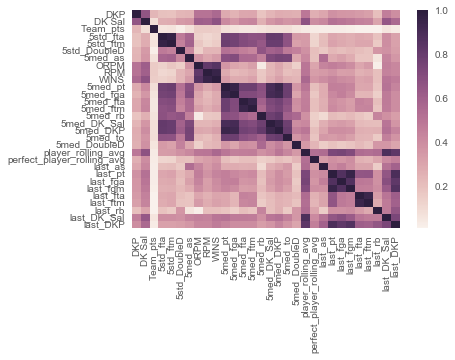

In [577]:
sns.heatmap(correlation.corr())

In [578]:
X_train, X_test, y_train, y_test = \
    train_test_split(nba20171206train[[


'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP'



]],
                    nba20171206train['DKP'],test_size=0.25,
                    random_state=42)

In [579]:
X_test.shape

(451, 29)

In [580]:
y_test.value_counts().sort_values().head()

66.25    1
50.75    1
45.25    1
7.50     1
57.00    1
Name: DKP, dtype: int64

In [581]:
from sklearn.pipeline import Pipeline,make_pipeline, FeatureUnion
from sklearn.preprocessing import Imputer, StandardScaler

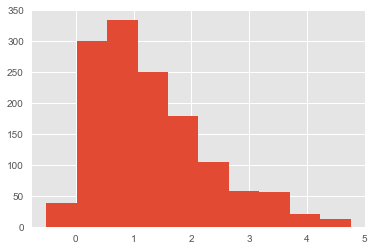

In [582]:
X_train['WINS'].hist()

In [583]:
params = {}
gs = GridSearchCV(RandomForestRegressor(), param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.409785953638
{}


In [382]:
# r_score true values vs. mean baseline for r2 is 0
# calculate baseline 

# nba2017strip['DKP'].mean.value_counts()

In [383]:
from sklearn.metrics import classification_report, confusion_matrix

In [384]:
y_pred = gs.predict(X_test)

In [385]:
test = X_test

In [386]:
X_test.head()

DK Sal  Team_pts  5std_fta  5std_ftm  5std_DoubleD  5med_as  ORPM   RPM  \
7341    9100     121.0      2.61      1.87          0.55      9.0  0.50  2.75   
4294    7900     119.0      3.00      2.49          0.00      3.0  0.32  3.17   
3427    3900      91.0      1.00      1.00          0.00      1.0 -1.23 -2.10   
6875    4800     115.0      3.35      2.17          0.00      1.0 -1.24 -1.27   
3040    7100      99.0      2.00      1.64          0.45      2.0 -2.98 -0.98   

      WINS  5med_pt    ...     perfect_player_rolling_avg  last_as  last_pt  \
7341  2.34     21.0    ...                           0.12      9.0     19.0   
4294  1.92     22.0    ...                           0.00      5.0     22.0   
3427  0.25      7.0    ...                           0.00      2.0      9.0   
6875  0.50      7.0    ...                           0.00      1.0      7.0   
3040  0.74     21.0    ...                           0.25      1.0     21.0   

      last_fga  last_fgm  last_fta  last_ftm  last_rb  last_DK_Sal  last_DKP  
7341      16.0       8.0       6.0       3.0     13.0       8800.0     52.25  
4294      12.0       9.0       6.0       4.0      9.0       8100.0     45.25  
3427      10.0       3.0       1.0       1.0      3.0       4000.0     19.75  
6875       6.0       1.0       7.0       5.0     14.0       4600.0     31.00  
3040      20.0      10.0       2.0       1.0      5.0       6800.0     28.75  

[5 rows x 29 columns]

In [387]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average')

0.41455862956015088

In [388]:
test['DKP Pred'] = y_pred

In [389]:
test[['DKP Pred']].to_csv('submission15.csv', index=False)

In [390]:
check = pd.DataFrame(list(zip(y_pred,y_test, (y_test-y_pred))))

In [391]:
check.sort_values(1, ascending=False).head()

0      1       2
100  63.450  83.75  20.300
438  59.525  70.00  10.475
78   36.075  66.25  30.175
146  61.300  65.50   4.200
286  35.700  64.75  29.050

In [392]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

# K-Means and Clustering

In [1050]:


%matplotlib inline

from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

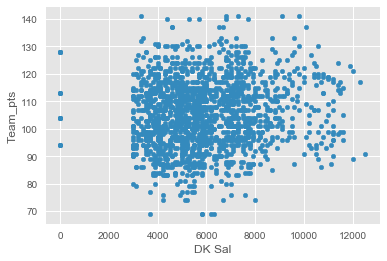

In [137]:
features = [
'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP'
]
nba20171206train[features].plot(kind='scatter', x=features[0], y=features[1])

In [138]:
X = nba20171206train[features]

/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


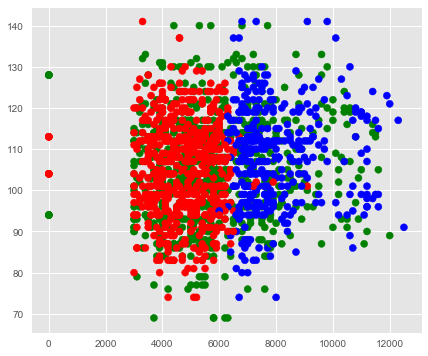

In [139]:
# 1. Run K-Means against our 2 features with 3 clusters
k = 3
model = KMeans(n_clusters=k)
model.fit(nba20171206train[features].values)

# 2. Assign clusters back to our dataframe
nba20171206train['clusters'] = model.labels_
cc = pd.DataFrame(model.cluster_centers_)

# 4. Plot the scatter of our points with calculated centroids
base_colors  =  ['r', 'g', 'b']
colors       =  [base_colors[centroid] for centroid in model.labels_]

# update x,y of our final clusters to plot later
fig, ax      =  plt.subplots(figsize=(7,6))

# Plot the scatter of our points with calculated centroids
ax.scatter(nba20171206train[features[0]], nba20171206train[features[1]], c=colors)
ax.scatter(cc[0], cc[1], marker='X', c=base_colors, s=100) # cc.index

In [140]:
print(model.n_iter_)
print(silhouette_score(nba20171206train[features], nba20171206train['clusters']))

6
0.45486814667


In [141]:
model = KMeans(n_clusters=3, random_state=0).fit(X)

In [142]:
predicted = model.labels_
centroids = model.cluster_centers_

print("Predicted clusters to points: ", predicted)
print("Location of centroids: ")
print(centroids)

Predicted clusters to points:  [1 1 1 ..., 0 0 0]
Location of centroids: 
[[  4.71973466e+03   1.04875622e+02   1.85839138e+00   1.54976783e+00
    1.17495854e-01   1.92703151e+00  -5.07893864e-01  -3.19651741e-01
    9.05787728e-01   1.00995025e+01   8.53233831e+00   1.61194030e+00
    1.16583748e+00   4.21724710e+00   4.77263682e+03   2.13851575e+01
    1.25870647e+00   1.32669983e-02   2.07004478e+01   4.63349917e-02
    2.10945274e+00   1.06865672e+01   8.76948590e+00   4.01160862e+00
    1.94029851e+00   1.50414594e+00   4.55555556e+00   4.69767828e+03
    2.22276119e+01]
 [  5.81923621e+03   1.04835926e+02  -2.26485497e-14   8.88178420e-15
   -9.57567359e-16   7.32747196e-15   2.15205092e-01   4.38953324e-01
    1.27966054e+00   1.77635684e-14   2.57571742e-14  -1.24344979e-14
   -1.39888101e-14  -2.57571742e-14   1.45519152e-11   3.73034936e-14
    9.76996262e-15  -7.14706072e-16   2.20864498e+01   7.21074965e-02
    2.23196605e+00   1.10226308e+01   8.78642150e+00   4.04667610e

# PCA


In [143]:
demo_noage = nba20171206train[[


'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP'

]]
                     
demo_noage = (demo_noage - nba20171206train.mean()) / nba20171206train.std()

In [144]:
demo_noage_corr = np.corrcoef(demo_noage.values.T)
d2 = demo_noage.corr().fillna(0)
d2

5avg_DKP  5avg_DK_Sal  5avg_DoubleD  \
5avg_DKP                          0.0          0.0           0.0   
5avg_DK_Sal                       0.0          0.0           0.0   
5avg_DoubleD                      0.0          0.0           0.0   
5avg_TripleD                      0.0          0.0           0.0   
5avg_as                           0.0          0.0           0.0   
5avg_bl                           0.0          0.0           0.0   
5avg_fga                          0.0          0.0           0.0   
5avg_fgm                          0.0          0.0           0.0   
5avg_fta                          0.0          0.0           0.0   
5avg_ftm                          0.0          0.0           0.0   
5avg_minutes                      0.0          0.0           0.0   
5avg_pt                           0.0          0.0           0.0   
5avg_rb                           0.0          0.0           0.0   
5avg_st                           0.0          0.0           0.0   
5avg_to                           0.0          0.0           0.0   
5avg_trey                         0.0          0.0           0.0   
5med_DKP                          0.0          0.0           0.0   
5med_DK_Sal                       0.0          0.0           0.0   
5med_DoubleD                      0.0          0.0           0.0   
5med_TripleD                      0.0          0.0           0.0   
5med_as                           0.0          0.0           0.0   
5med_bl                           0.0          0.0           0.0   
5med_fga                          0.0          0.0           0.0   
5med_fgm                          0.0          0.0           0.0   
5med_fta                          0.0          0.0           0.0   
5med_ftm                          0.0          0.0           0.0   
5med_minutes                      0.0          0.0           0.0   
5med_pt                           0.0          0.0           0.0   
5med_rb                           0.0          0.0           0.0   
5med_st                           0.0          0.0           0.0   
...                               ...          ...           ...   
last_pt                           0.0          0.0           0.0   
last_rb                           0.0          0.0           0.0   
last_st                           0.0          0.0           0.0   
last_to                           0.0          0.0           0.0   
last_trey                         0.0          0.0           0.0   
perfect_c                         0.0          0.0           0.0   
perfect_f                         0.0          0.0           0.0   
perfect_g                         0.0          0.0           0.0   
perfect_pf                        0.0          0.0           0.0   
perfect_pg                        0.0          0.0           0.0   
perfect_player                    0.0          0.0           0.0   
perfect_player_rolling_avg        0.0          0.0           0.0   
perfect_sf                        0.0          0.0           0.0   
perfect_sg                        0.0          0.0           0.0   
perfect_util                      0.0          0.0           0.0   
player_rolling_avg                0.0          0.0           0.0   
player_rolling_c_avg              0.0          0.0           0.0   
player_rolling_f_avg              0.0          0.0           0.0   
player_rolling_g_avg              0.0          0.0           0.0   
player_rolling_pf_avg             0.0          0.0           0.0   
player_rolling_pg_avg             0.0          0.0           0.0   
player_rolling_sf_avg             0.0          0.0           0.0   
player_rolling_sg_avg             0.0          0.0           0.0   
player_rolling_team_pts_avg       0.0          0.0           0.0   
player_rolling_util_avg           0.0          0.0           0.0   
pt                                0.0          0.0           0.0   
rb                                0.0          0.0           0.0   
st               

In [145]:
from sklearn.decomposition import PCA

X = d2

pca = PCA()
pca = pca.fit(X)

print(pca.explained_variance_)
print(pca.components_)

[  1.03011325e+00   1.71521256e-01   3.64342986e-02   1.86451649e-02
   1.35038356e-02   7.78392827e-03   6.16303539e-03   3.94249459e-03
   2.70713483e-03   2.34803958e-03   1.84110723e-03   1.52840985e-03
   1.23094034e-03   8.50377164e-04   5.45654769e-04   3.51372583e-04
   2.37823256e-04   1.27848469e-04   1.21550908e-04   8.16626854e-05
   2.69073573e-05   1.84376993e-05   7.60592694e-06   6.75976225e-06
   6.11683937e-06   5.45222878e-06   4.41517953e-06   1.39576679e-06
   2.98763607e-07   2.03156416e-31   1.02350988e-32   1.02350988e-32
   1.02350988e-32   1.02350988e-32   1.02350988e-32   1.02350988e-32
   1.02350988e-32   1.02350988e-32   1.02350988e-32   1.02350988e-32
   1.02350988e-32   1.02350988e-32   1.02350988e-32   1.02350988e-32
   1.02350988e-32   1.02350988e-32   1.02350988e-32   1.02350988e-32
   1.02350988e-32   1.02350988e-32   1.02350988e-32   1.02350988e-32
   1.02350988e-32   1.02350988e-32   1.02350988e-32   1.02350988e-32
   1.02350988e-32   1.02350988e-32

In [146]:

var_exp = pca.explained_variance_ratio_
print('Explained variance:            ', var_exp)

cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Explained variance:             [  7.92299382e-01   1.31923538e-01   2.80230083e-02   1.43407073e-02
   1.03863149e-02   5.98691604e-03   4.74022552e-03   3.03232292e-03
   2.08216062e-03   1.80596677e-03   1.41606577e-03   1.17555830e-03
   9.46763149e-04   6.54057503e-04   4.19683889e-04   2.70254052e-04
   1.82918935e-04   9.83331326e-05   9.34894385e-05   6.28098852e-05
   2.06954745e-05   1.41811375e-05   5.85000843e-06   5.19919090e-06
   4.70469440e-06   4.19351706e-06   3.39588294e-06   1.07353746e-06
   2.29790482e-07   1.56255346e-31   7.87220479e-33   7.87220479e-33
   7.87220479e-33   7.87220479e-33   7.87220479e-33   7.87220479e-33
   7.87220479e-33   7.87220479e-33   7.87220479e-33   7.87220479e-33
   7.87220479e-33   7.87220479e-33   7.87220479e-33   7.87220479e-33
   7.87220479e-33   7.87220479e-33   7.87220479e-33   7.87220479e-33
   7.87220479e-33   7.87220479e-33   7.87220479e-33   7.87220479e-33
   7.87220479e-33   7.87220479e-33   7.87220479e-33   7.87220479e-33
  

# Feature Selection

In [147]:
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression

In [148]:
nba20171206train.corr()

GID    DK Sal      Team       Opp  Team_pts  Start  \
GID           1.000000 -0.091008  0.183820 -0.018180 -0.070165    NaN   
DK Sal       -0.091008  1.000000 -0.083473 -0.010651  0.079269    NaN   
Team          0.183820 -0.083473  1.000000 -0.028414  0.061224    NaN   
Opp          -0.018180 -0.010651 -0.028414  1.000000  0.030313    NaN   
Team_pts     -0.070165  0.079269  0.061224  0.030313  1.000000    NaN   
Start              NaN       NaN       NaN       NaN       NaN    NaN   
H/A          -0.006265 -0.002254 -0.030915  0.030850  0.055298    NaN   
Minutes      -0.036804  0.444172 -0.048295 -0.025465  0.047742    NaN   
DKP          -0.068009  0.659738 -0.007883  0.001864  0.228568    NaN   
as           -0.060217  0.450101 -0.000302  0.002394  0.167012    NaN   
bl           -0.017139  0.214157 -0.054870 -0.010322  0.044735    NaN   
fga          -0.030105  0.589633  0.010383  0.007328  0.081287    NaN   
fgm          -0.040894  0.532031  0.019093  0.001545  0.209913    NaN   
fta          -0.028860  0.463478 -0.027039  0.009151  0.124271    NaN   
ftm          -0.026591  0.445861 -0.024818  0.013370  0.139710    NaN   
pt           -0.043848  0.569053  0.008005  0.000066  0.230948    NaN   
rb           -0.073211  0.337976 -0.021458  0.016959  0.035496    NaN   
st            0.039616  0.143340  0.008161 -0.030040  0.023225    NaN   
to           -0.027003  0.423127 -0.057050 -0.008575 -0.005518    NaN   
trey         -0.028563  0.173778  0.011276 -0.031658  0.174744    NaN   
DoubleD      -0.012600  0.352363 -0.059208  0.055691  0.066670    NaN   
TripleD      -0.034083  0.168627 -0.032544  0.022399  0.025344    NaN   
DRPM         -0.174946  0.073430 -0.072679 -0.002253  0.015463    NaN   
ORPM         -0.172859  0.603014  0.006928 -0.009908  0.148374    NaN   
RPM          -0.260309  0.597276 -0.035702 -0.010419  0.145454    NaN   
WINS         -0.208627  0.665649 -0.046034 -0.007397  0.139439    NaN   
DK pos       -0.068761 -0.068541 -0.025917  0.001984 -0.018443    NaN   
Opp_DRPM     -0.153518  0.046198 -0.008940 -0.038621 -0.044988    NaN   
Opp_ORPM      0.045527  0.100540 -0.017949 -0.017878  0.044144    NaN   
Opp_RPM      -0.053210  0.113098 -0.020605 -0.038313  0.010584    NaN   
...                ...       ...       ...       ...       ...    ...   
5std_fta      0.010966  0.261971 -0.008269 -0.034678  0.050567    NaN   
5std_ftm      0.014619  0.262107 -0.005543 -0.037397  0.057446    NaN   
5std_rb      -0.036253  0.134324 -0.025805 -0.026840  0.046433    NaN   
5std_DK_Sal   0.011326  0.107012  0.113891 -0.125475  0.029127    NaN   
5std_DKP      0.028932  0.168952 -0.019922 -0.022149  0.047918    NaN   
5std_bl      -0.032571  0.143854 -0.066233 -0.033176  0.028759    NaN   
5std_st       0.026438  0.134783  0.012259 -0.004596  0.032921    NaN   
5std_to      -0.012782  0.240201 -0.031513  0.004726  0.062220    NaN   
5std_trey    -0.005939  0.146683 -0.000813 -0.022969  0.054989    NaN   
5std_DoubleD -0.052012  0.329115 -0.044498 -0.033123  0.022172    NaN   
5std_TripleD -0.076525  0.293583 -0.042950  0.021070  0.015756    NaN   
5std_minutes  0.019622 -0.007154 -0.009839 -0.014999  0.029545    NaN   
5med_as      -0.049379  0.347248  0.007520 -0.021631  0.064973    NaN   
5med_pt      -0.025592  0.393952 -0.014917 -0.011494  0.076224    NaN   
5med_fga     -0.014873  0.335334 -0.005538 -0.012402  0.063039    NaN   
5med_fgm     -0.020735  0.375966 -0.004437 -0.001543  0.065671    NaN   
5med_fta     -0.028482  0.403701 -0.030913 -0.029673  0.052054    NaN   
5med_ftm     -0.026411  0.413318 -0.041177 -0.031824  0.048715    NaN   
5med_rb      -0.055733  0.248290 -0.024898 -0.014059  0.061836    NaN   
5med_DK_Sal  -0.021569  0.335782 -0.027453 -0.012644  0.070821    NaN   
5med_DKP     -0.034110  0.380271 -0.008363 -0.017452  0.069039    NaN   
5med_bl      -0.018115  0.209470 -0.046226 -0.018626  0.036749    NaN   
5med_st       0.064112  0.180701  0.024166 -0.003865  0.042898    NaN   
5med

In [149]:
nba20171206train_corr = nba20171206train.corr().to_csv('correlation.csv', index=True)



In [150]:
# Below are the highest correlated features to DKP

# 'DK Sal',
# 'Team_pts',
# '5std_fta',
# '5std_ftm',
# '5std_DoubleD',
# '5med_as',
# 'ORPM',
# 'RPM',
# 'WINS',
# '5med_pt',
# '5med_fga',
# '5med_fta',
# '5med_ftm',
# '5med_rb',
# '5med_DK_Sal',
# '5med_DKP',
# '5med_to',
# '5med_DoubleD',
# 'player_rolling_avg',
# 'perfect_player_rolling_avg',
# 'last_as',
# 'last_pt',
# 'last_fga',
# 'last_fgm',
# 'last_fta',
# 'last_ftm',
# 'last_rb',
# 'last_DK_Sal',
# 'last_DKP'

# Simple Linear Regression

In [151]:
from sklearn import linear_model

lm = linear_model.LinearRegression()

# a model, like a dataframe. it's a variable that has functionality around it.

# set up specific variables 

X = nba20171206train[[
'clusters',
'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP']]
y = nba20171206train['DKP'] 

model = lm.fit(X, y)

# fit = training

In [152]:
# R^2 1 is great. 0 is the worst. Somewhere in between.
model.score(X,y)

0.51007944653500814

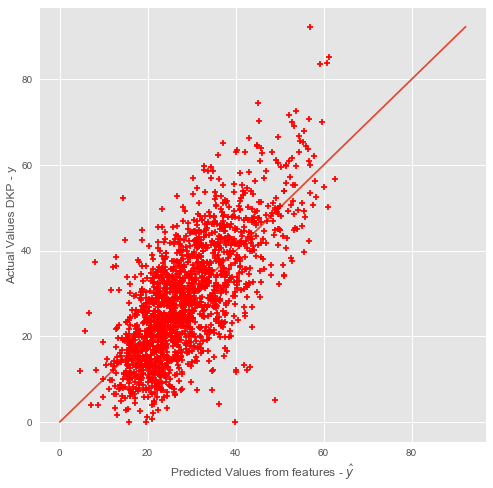

In [153]:
# Y- Y_hat
predictions = model.predict(X)


# Plot the model
plt.figure(figsize=(8,8))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from features - $\hat{y}$")
plt.ylabel("Actual Values DKP - y")

plt.plot([0, np.max(y)], [0, np.max(y)])

plt.show()

# Keras 

In [1210]:
import pandas as pd
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer, StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation


from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

In [1211]:
nba2017train = pd.read_csv('nba20171206train.csv')

In [1212]:
nba2017train.tail()

Unnamed: 0   GID        Date             Name  DK Sal  Team  Opp  \
2497        1374  4379  2017-11-22     Kyrie Irving    8200    30    2   
2498        1589  4705  2017-11-22     Aaron Gordon    7000    20    8   
2499        1588  4549  2017-11-22    Terrence Ross    3700    20    8   
2500        1587  4199  2017-11-22   Garrett Temple    3500    14   16   
2501        1392  3510  2017-11-22  Carmelo Anthony    6700     7   18   

      Team_pts  Start  H/A     ...       5med_st  5med_to  5med_trey  \
2497      98.0      1    0     ...           1.0      2.0        2.0   
2498     118.0      1    0     ...           1.0      2.0        2.0   
2499     118.0      1    0     ...           1.0      1.0        1.0   
2500     113.0      1    1     ...           1.0      2.0        1.0   
2501     108.0      1    1     ...           0.0      0.0        1.0   

      5med_DoubleD  5med_TripleD  5med_minutes  player_rolling_sg_avg  \
2497           0.0           0.0         31.42                    0.0   
2498           0.0           0.0         31.55                    0.0   
2499           0.0           0.0         25.60                    0.0   
2500           0.0           0.0         25.65                    0.0   
2501           0.0           0.0         30.53                    0.0   

      player_rolling_util_avg  player_rolling_c_avg  DKPavgper1k  
2497                      0.0                   0.0         4.42  
2498                      0.0                   0.0         4.29  
2499                      0.0                   0.0         4.94  
2500                      0.0                   0.0         4.20  
2501                      0.0                   0.0         4.79  

[5 rows x 136 columns]

In [1213]:
X_train, X_test, y_train, y_test = \
train_test_split(nba20171206train[[
# 'clusters',


'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP']]



    ,
         nba20171206train['DKP']            
            )
    
ss = StandardScaler()

In [1214]:
X_train = ss.fit_transform(X_train) # only fit the train, not the test
X_test = ss.transform(X_test)

In [1215]:
X_train.shape

(1876, 29)

In [1216]:
X_test.shape

(626, 29)

In [1217]:
model = Sequential()

In [1218]:
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

In [1219]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [1220]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=55)

Train on 1876 samples, validate on 626 samples
Epoch 1/55
1876/1876 [==============================] - 2s 825us/step - loss: 896.6945 - mean_absolute_error: 26.7741 - val_loss: 864.8946 - val_mean_absolute_error: 26.0043
Epoch 2/55
1876/1876 [==============================] - 0s 121us/step - loss: 665.0000 - mean_absolute_error: 22.3942 - val_loss: 585.6242 - val_mean_absolute_error: 20.8113
Epoch 3/55
1876/1876 [==============================] - 0s 123us/step - loss: 409.7034 - mean_absolute_error: 16.9349 - val_loss: 349.4727 - val_mean_absolute_error: 15.4199
Epoch 4/55
1876/1876 [==============================] - 0s 122us/step - loss: 278.2839 - mean_absolute_error: 13.5506 - val_loss: 281.4410 - val_mean_absolute_error: 13.5355
Epoch 5/55
1876/1876 [==============================] - 0s 126us/step - loss: 243.2647 - mean_absolute_error: 12.6154 - val_loss: 247.7891 - val_mean_absolute_error: 12.5751
Epoch 6/55
1876/1876 [==============================] - 0s 107us/step - loss: 212.7

1876/1876 [==============================] - 0s 114us/step - loss: 88.5426 - mean_absolute_error: 7.3610 - val_loss: 99.8386 - val_mean_absolute_error: 7.8006
Epoch 49/55
1876/1876 [==============================] - 0s 116us/step - loss: 88.4468 - mean_absolute_error: 7.3576 - val_loss: 100.6467 - val_mean_absolute_error: 7.8231
Epoch 50/55
1876/1876 [==============================] - 0s 124us/step - loss: 88.0031 - mean_absolute_error: 7.3289 - val_loss: 101.5416 - val_mean_absolute_error: 7.8616
Epoch 51/55
1876/1876 [==============================] - 0s 120us/step - loss: 88.1274 - mean_absolute_error: 7.3467 - val_loss: 101.1294 - val_mean_absolute_error: 7.8338
Epoch 52/55
1876/1876 [==============================] - 0s 119us/step - loss: 87.6454 - mean_absolute_error: 7.3084 - val_loss: 101.8046 - val_mean_absolute_error: 7.8624
Epoch 53/55
1876/1876 [==============================] - 0s 102us/step - loss: 87.4695 - mean_absolute_error: 7.3004 - val_loss: 100.1754 - val_mean_abso

In [1221]:
from keras.utils import to_categorical

In [1222]:
y_pred = model.predict(X_test)

In [1223]:
y_pred.shape

(626, 1)

In [1224]:
r2_score(y_test, y_pred)

0.48412606367468614

In [1225]:
list(zip(X_test, y_test, y_pred))[:5]

[(array([  7.68981031e-01,   1.67587455e+00,  -1.43114990e-01,
          -7.21273107e-02,   1.95114935e+00,  -8.29858567e-01,
          -7.92640971e-01,   7.65255369e-01,  -1.37981146e-03,
           4.30174503e-01,   2.34744115e-01,   1.07751341e-01,
          -1.66443951e-01,   6.95431851e-01,   1.08960937e+00,
           2.59807407e-01,   6.19689579e-01,  -2.67184914e-01,
          -5.28444615e-01,   1.78425428e-01,  -9.95853904e-01,
          -1.12261686e+00,  -1.96275274e-01,  -1.15051738e+00,
          -2.30641524e-01,  -4.22633287e-01,   2.25196771e-01,
           6.25802886e-01,  -9.67670763e-01]),
  47.0,
  array([ 40.20759583], dtype=float32)),
 (array([ 0.41126729, -0.81027821,  0.07265538,  0.20072263,  1.48795971,
          0.96836802, -0.20124756,  0.40819931,  0.09370891,  0.4301745 ,
          0.69911666,  0.96247234,  0.90842301,  0.69543185,  0.80367582,
          0.86369434, -0.1431304 , -0.26718491,  0.36396841, -0.5595069 ,
          0.48745052,  0.81768754,  0.304

In [1226]:
y_test.shape

(626,)

In [1227]:
X = nba20171206train[[

# 'clusters',


'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP']]


                


In [1228]:
y = nba20171206train['DKP']

In [1229]:
ss= StandardScaler()

In [1230]:
X = ss.fit_transform(X)

In [1231]:
model = Sequential()

In [1232]:
model.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

In [1233]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

In [1234]:
history = model.fit(X, y, epochs=55)

Epoch 1/55
2502/2502 [==============================] - 1s 489us/step - loss: 819.3076 - mean_absolute_error: 25.6692
Epoch 2/55
2502/2502 [==============================] - 0s 109us/step - loss: 453.7950 - mean_absolute_error: 17.9482
Epoch 3/55
2502/2502 [==============================] - 0s 109us/step - loss: 280.7301 - mean_absolute_error: 13.4955
Epoch 4/55
2502/2502 [==============================] - 0s 108us/step - loss: 209.7283 - mean_absolute_error: 11.6317
Epoch 5/55
2502/2502 [==============================] - 0s 116us/step - loss: 158.8136 - mean_absolute_error: 10.0153
Epoch 6/55
2502/2502 [==============================] - 0s 113us/step - loss: 131.3436 - mean_absolute_error: 9.1005
Epoch 7/55
2502/2502 [==============================] - 0s 86us/step - loss: 119.4274 - mean_absolute_error: 8.6718
Epoch 8/55
2502/2502 [==============================] - 0s 93us/step - loss: 114.1467 - mean_absolute_error: 8.4589
Epoch 9/55
2502/2502 [==============================] - 0s 68

In [1235]:
from sklearn.metrics import r2_score

In [1236]:
r2_score(y_test, y_pred)

0.48412606367468614

In [1237]:
nba2017test= pd.read_csv('nba20171206test.csv')

In [1238]:
nba2017test.head() 

Unnamed: 0   GID        Date             Name  DK Sal  Team  Opp  Team_pts  \
0        6680  4938  2017-11-24   Taurean Prince    5200    21   28     116.0   
1        6678  3978  2017-11-24  Wilson Chandler    4900     9   12     104.0   
2        6677  4092  2017-11-24     Goran Dragic    6700     2    8     109.0   
3        6676  4787  2017-11-24  Justise Winslow    4100     2    8     109.0   
4        6673  5173  2017-11-24    Dillon Brooks    4100    12    9      92.0   

   Start  H/A     ...       5med_st  5med_to  5med_trey  5med_DoubleD  \
0      1    1     ...           2.0      2.0        2.0           0.0   
1      1    1     ...           0.0      1.0        1.0           0.0   
2      1    0     ...           1.0      3.0        2.0           0.0   
3      1    0     ...           2.0      2.0        0.0           0.0   
4      1    0     ...           1.0      1.0        0.0           0.0   

   5med_TripleD  5med_minutes  player_rolling_sg_avg  player_rolling_util_avg  \
0           0.0         31.95                   0.00                      0.0   
1           0.0         27.07                   0.00                      0.0   
2           0.0         34.57                   0.00                      0.0   
3           0.0         23.60                   0.00                      0.0   
4           0.0         29.55                   0.06                      0.0   

   player_rolling_c_avg  DKPavgper1k  
0                   0.0         5.02  
1                   0.0         3.83  
2                   0.0         4.83  
3                   0.0         4.33  
4                   0.0         4.56  

[5 rows x 136 columns]

In [1239]:
X_new = nba20171206test[[

#  'clusters',
'DK Sal',
'Team_pts',
'5std_fta',
'5std_ftm',
'5std_DoubleD',
'5med_as',
'ORPM',
'RPM',
'WINS',
'5med_pt',
'5med_fga',
'5med_fta',
'5med_ftm',
'5med_rb',
'5med_DK_Sal',
'5med_DKP',
'5med_to',
'5med_DoubleD',
'player_rolling_avg',
'perfect_player_rolling_avg',
'last_as',
'last_pt',
'last_fga',
'last_fgm',
'last_fta',
'last_ftm',
'last_rb',
'last_DK_Sal',
'last_DKP']]   
    



In [1240]:
X_new = ss.transform(X_new)
new_data_preds = model.predict(X_new)

In [1241]:
pred = model.predict(X_new)

In [1242]:
import pandas as pd

In [1243]:
check3 = pd.DataFrame(list(zip(nba2017test['GID'], nba2017test['DK pos'], nba2017test['Date'],nba2017test['DK Sal'], nba2017test['Name'],nba2017test['Team'],new_data_preds)))

In [1244]:
check3[6].value_counts().head()

[40.6148]    1
[24.307]     1
[34.0012]    1
[11.8461]    1
[40.7546]    1
Name: 6, dtype: int64

In [1245]:
check4 = check3.loc[check3[6] > 0, :]
check4.sort_values([6], ascending=False).head(250
                                )

0   1           2      3                       4   5          6
13  4173  12  2017-11-24   9600           Stephen Curry  18  [59.3388]
25  4274  45  2017-11-24  11400        DeMarcus Cousins  11  [57.5903]
7   4482  45  2017-11-24  10700           Anthony Davis  11  [54.5787]
6   4079   1  2017-11-24  10600       Russell Westbrook   7  [53.7871]
33  3541  34  2017-11-24  11200            LeBron James   4  [51.2771]
89  4523   1  2017-11-24   8800          Damian Lillard   6  [49.8569]
34  4379   1  2017-11-24   8300            Kyrie Irving  30  [48.7485]
56  4367   2  2017-11-24   7100           Klay Thompson  18  [47.3868]
51  4211  23  2017-11-24   8400           DeMar DeRozan  26  [43.9305]
9   4489   5  2017-11-24   8800          Andre Drummond  24  [42.5393]
27  3998  45  2017-11-24   6900              Al Horford  30  [42.3543]
8   4772   5  2017-11-24   8600            Nikola Jokic   9  [41.6299]
18  4595   1  2017-11-24   6600         Dennis Schroder  21  [40.7546]
93  4681   5  2017-11-24   6500            Jusuf Nurkic   6  [40.6409]
46  4627  12  2017-11-24   8000          Victor Oladipo  23  [40.6148]
15  4871  45  2017-11-24   8900      Kristaps Porzingis  28  [40.4571]
68  4283   3  2017-11-24   8500             Paul George   7  [39.8874]
82  4879   5  2017-11-24   8700      Karl-Anthony Towns   8  [38.8818]
77  4324   5  2017-11-24   8500        Hassan Whiteside   2  [38.2023]
40  4760  12  2017-11-24   6600       Spencer Dinwiddie  29  [37.8516]
92  4440   1  2017-11-24   8200            Kemba Walker   3  [37.7036]
35  4628  23  2017-11-24   6600        Tim Hardaway Jr.  28  [36.4621]
64  3990   5  2017-11-24   7900              Marc Gasol  12   [36.148]
2   4092   1  2017-11-24   6700            Goran Dragic   2  [35.8158]
85  4705  34  2017-11-24   6500            Aaron Gordon  20  [35.7039]
57  3891   1  2017-11-24   8100              Kyle Lowry  26  [35.2464]
75  4203  34  2017-11-24   5600         DeMarre Carroll  29  [35.1224]
59  4373   5  2017-11-24   6600          Nikola Vucevic  20  [35.0449]
10  4515  23  2017-11-24   5600            Dion Waiters   2  [34.8793]
70  5017  23  2017-11-24   6500            Jaylen Brown  30  [34.7248]
..   ...  ..         ...    ...                     ...  ..        ...
0   4938  23  2017-11-24   5200          Taurean Prince  21  [22.1125]
72  4945  12  2017-11-24   5500               Kris Dunn  25   [22.106]
91  4497   5  2017-11-24   4800       Jonas Valanciunas  26  [22.0806]
62  4364  23  2017-11-24   3700           E'Twaun Moore  11  [21.9991]
30  4761  45  2017-11-24   3500             Noah Vonleh   6  [21.9883]
1   3978  34  2017-11-24   4900         Wilson Chandler   9  [21.5336]
50  4901  23  2017-11-24   5400        Denzel Valentine  25  [21.0247]
24  3553   5  2017-11-24   3100           Zaza Pachulia  18  [20.9927]
44  3872   1  2017-11-24   4900             Rajon Rondo  11  [20.6161]
61  5241  34  2017-11-24   3700              OG Anunoby  26   [20.503]
36  4112   5  2017-11-24   4700             Robin Lopez  25  [19.6684]
74  4532   3  2017-11-24   4000  Michael Kidd-Gilchrist   3  [19.4669]
73  3817  34  2017-11-24   3800         Marvin Williams   3  [19.3649]
95  4461  34  2017-11-24   4000        Chandler Parsons  12  [19.3478]
49  4838  23  2017-11-24   3800         Stanley Johnson  24  [19.2022]
69  4529  45  2017-11-24   3500            Kyle O'Quinn  28  [19.0641]
41  4811  23  2017-11-24   3000         Pat Connaughton   6  [18.7569]
63  4456  45  2017-11-24   3800          Kenneth Faried   9  [17.9493]
84  4549  23  2017-11-24   3700           Terrence Ross  20  [17.6176]
86  3307   5  2017-11-24   4400          Tyson Chandler  15   [17.606]
3   4787  34  2017-11-24   4100         Justise Winslow   2  [17.3641]
81  4559  23  2017-11-24   3300          Andre Roberson   7  [16.6439]
94  3766   1  2017-11-24   3800            Jarrett Jack  28  [16.3972]
19  4581  34  2017-11-24   4300          JaMychal Green  12  [15.9757]
71  4472  34  2017-11-24   3800

# Solving the Knapsack Problem with Pulp

In [1246]:
from pulp import *


In [1247]:
pulp.pulpTestAll()
         

	 Testing zero subtraction
	 Testing inconsistant lp solution
	 Testing continuous LP solution
	 Testing maximize continuous LP solution
	 Testing unbounded continuous LP solution
	 Testing Long Names
	 Testing repeated Names
	 Testing zero constraint
	 Testing zero objective
	 Testing LpVariable (not LpAffineExpression) objective
	 Testing Long lines in LP
	 Testing LpAffineExpression divide
	 Testing MIP solution
	 Testing MIP solution with floats in objective
	 Testing MIP relaxation
	 Testing feasibility problem (no objective)
	 Testing an infeasible problem
	 Testing an integer infeasible problem
	 Testing column based modelling
	 Testing dual variables and slacks reporting
	 Testing fractional constraints
	 Testing elastic constraints (no change)
	 Testing elastic constraints (freebound)
	 Testing elastic constraints (penalty unchanged)
	 Testing elastic constraints (penalty unbounded)
* Solver <class 'pulp.solvers.PULP_CBC_CMD'> passed.
Solver <class 'pulp.solvers.CPLEX_DLL'> un

In [1248]:
players = check3[[1, 4, 3, 0, 6, 5]]

# Rename 'DK Pos' column to 'Position'.
# Rename 'DK Sal' column to 'Salary'
# Rename 'GID' column to 'GameInfo'
# Rename 'new_data_preds' to 'AvgPointsPerGame'
# Rename 'Team' to teamAbbrev

players.columns = ['Position', 'Name', 'Salary', 'GameInfo', 'AvgPointsPerGame', 'teamAbbrev']

# View the head of 'players'

players.head()



Position             Name  Salary  GameInfo AvgPointsPerGame  teamAbbrev
0        23   Taurean Prince    5200      4938        [22.1125]          21
1        34  Wilson Chandler    4900      3978        [21.5336]           9
2         1     Goran Dragic    6700      4092        [35.8158]           2
3        34  Justise Winslow    4100      4787        [17.3641]           2
4        23    Dillon Brooks    4100      5173        [15.5429]          12

In [1249]:
players.dtypes

Position             int64
Name                object
Salary               int64
GameInfo             int64
AvgPointsPerGame    object
teamAbbrev           int64
dtype: object

In [1250]:


players['GameInfo'] = players['GameInfo'].astype(str)




/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1251]:
# Convert Teams from numbers to uppercase Team Names

players['teamAbbrev'] = players['teamAbbrev'].map(lambda x: 'BOS' if x == 30 else 'BKN' if x == 29 else 'NYK' if x == 28 else 'PHI' if x == 27 else 'TOR' if x == 26 else 'CHI' if x == 25 else 'DET' if x == 24 else 'IND' if x == 23 else 'MIL' if x == 22 else 'ATL' if x == 21 else 'ORL' if x == 20 else 'WAS' if x == 19 else 'GSW' if x == 18 else 'LAC' if x == 17 else 'LAL' if x == 16 else 'PHO' if x == 15 else 'SAC' if x == 14 else 'DAL' if x == 13 else 'MEM' if x == 12 else 'NOR' if x == 11 else 'SAS' if x == 10 else 'DEN' if x == 9 else 'MIN' if x == 8 else 'OKC' if x == 7 else 'POR' if x == 6 else 'UTA' if x == 5 else 'CLE' if x == 4 else 'CHA' if x == 3 else 'MIA' if x == 2 else 'HOU' if x == 1 else 0) 




/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [1252]:
# Convert 'DK Pos' to string through a lambda function.
# These are the multiple player options (1 2 3 4 5 12 13 14 15 23 24 25 34 35 45)

players['Position'] = players['Position'].map(lambda x: 'PG' if x == 1 else 'SG' if x == 2 else 'SF' if x == 3 else 'PF' if x == 4 else 'C' if x == 5 else 'PG/SG' if x == 12 else 'PG/SF' if x == 13 else 'PG/PF' if x == 14 else 'PG/C' if x == 15 else 'SG/SF' if x == 23 else 'SG/PF' if x == 24 else 'SF/PF' if x == 34 else 'SF/C' if x == 35 else 'PF/C' if x == 45 else 0)




/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [1253]:
players['teamAbbrev'] = players['teamAbbrev'].astype(str)
players['Position'] = players['Position'].astype(str)

/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [1254]:
players.dtypes

Position            object
Name                object
Salary               int64
GameInfo            object
AvgPointsPerGame    object
teamAbbrev          object
dtype: object

In [1255]:
players.head()

Position             Name  Salary GameInfo AvgPointsPerGame teamAbbrev
0    SG/SF   Taurean Prince    5200     4938        [22.1125]        ATL
1    SF/PF  Wilson Chandler    4900     3978        [21.5336]        DEN
2       PG     Goran Dragic    6700     4092        [35.8158]        MIA
3    SF/PF  Justise Winslow    4100     4787        [17.3641]        MIA
4    SG/SF    Dillon Brooks    4100     5173        [15.5429]        MEM

In [1256]:
players['AvgPointsPerGame'] = players['AvgPointsPerGame'].astype(float).round(decimals=3)

/Users/gilobrien/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1257]:
players

Position                    Name  Salary GameInfo  AvgPointsPerGame  \
0     SG/SF          Taurean Prince    5200     4938            22.112   
1     SF/PF         Wilson Chandler    4900     3978            21.534   
2        PG            Goran Dragic    6700     4092            35.816   
3     SF/PF         Justise Winslow    4100     4787            17.364   
4     SG/SF           Dillon Brooks    4100     5173            15.543   
5      PF/C             Serge Ibaka    5000     4104            22.249   
6        PG       Russell Westbrook   10600     4079            53.787   
7      PF/C           Anthony Davis   10700     4482            54.579   
8         C            Nikola Jokic    8600     4772            41.630   
9         C          Andre Drummond    8800     4489            42.539   
10    SG/SF            Dion Waiters    5600     4515            34.879   
11     PF/C              Taj Gibson    5100     4167            27.928   
12    SF/PF            Jayson Tatum    5700     5111            31.009   
13    PG/SG           Stephen Curry    9600     4173            59.339   
14       PG           Elfrid Payton    5700     4699            30.153   
15     PF/C      Kristaps Porzingis    8900     4871            40.457   
16       SG            Jimmy Butler    6800     4363            34.001   
17     PF/C              Kevin Love    7700     4074            34.609   
18       PG         Dennis Schroder    6600     4595            40.755   
19    SF/PF          JaMychal Green    4300     4581            15.976   
20       PG          Mario Chalmers    5300     4088            27.087   
21    PG/SG            Jamal Murray    5200     4954            25.970   
22    SG/SF          Justin Holiday    5600     4558            24.492   
23        C            Tyler Zeller    3400     4516            15.830   
24        C           Zaza Pachulia    3100     3553            20.993   
25     PF/C        DeMarcus Cousins   11400     4274            57.590   
26     PF/C            John Collins    4800     5134            24.307   
27     PF/C              Al Horford    6900     3998            42.354   
28    SF/PF           Tobias Harris    6500     4412            28.660   
29    SG/SF             Jeremy Lamb    5100     4514            26.036   
..      ...                     ...     ...      ...               ...   
67       PG         Darren Collison    6000     4228            34.151   
68       SF             Paul George    8500     4283            39.887   
69     PF/C            Kyle O'Quinn    3500     4529            19.064   
70    SG/SF            Jaylen Brown    6500     5017            34.725   
71    SF/PF             Jae Crowder    3800     4472            15.873   
72    PG/SG               Kris Dunn    5500     4945            22.106   
73    SF/PF         Marvin Williams    3800     3817            19.365   
74       SF  Michael Kidd-Gilchrist    4000     4532            19.467   
75    SF/PF         DeMarre Carroll    5600     4203            35.122   
76        C            Steven Adams    5200     4574            23.122   
77        C        Hassan Whiteside    8500     4324            38.202   
78    SG/SF           Evan Fournier    5900     4468            27.978   
79        C            Myles Turner    6700     4781            30.379   
80       PG              Tyler Ulis    4100     4950            15.842   
81    SG/SF          Andre Roberson    3300     4559            16.644   
82        C      Karl-Anthony Towns    8700     4879            38.882   
83       PG          Reggie Jackson    6000     4369            26.030   
84    SG/SF           Terrence Ross    3700     4549            17.618   
85    SF/PF            Aaron Gordon    6500     4705            35.704   
86        C          Tyson Chandler    4400     3307            17.606   
87    PG/SG            Aaron Brooks    3000     3976            14.325   
88    SG/SF            Devin Booker    7800     4885            33.875   
89     

In [1258]:
players.to_csv('DKSalaries120617.csv', index=False, quoting=2) 
# quoting = 2 is QUOTE_NONNUMERIC. Need this to be in the correct format to run the optimizer.

(array([  37.,  103.,  133.,  158.,   97.,   55.,   23.,   12.,    6.,    2.]),
 array([  1.5  ,   9.875,  18.25 ,  26.625,  35.   ,  43.375,  51.75 ,
         60.125,  68.5  ,  76.875,  85.25 ]),
 <a list of 10 Patch objects>)

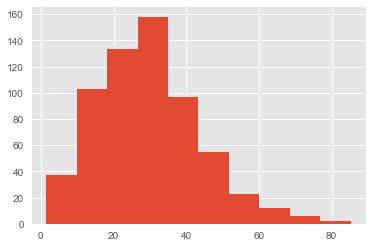

In [1259]:
plt.hist(y_test)

In [1260]:
from pydfs_lineup_optimizer import Site, Sport, get_optimizer


optimizer = get_optimizer(Site.DRAFTKINGS, Sport.BASKETBALL)
optimizer.load_players_from_CSV("DKSalaries120617.csv")
lineup_generator = optimizer.optimize(1)
for lineup in lineup_generator:
    print(lineup)

1. Stephen Curry                 PG/SGGSW            59.339  9600.0$   
2. Dennis Schroder               PG   ATL            40.755  6600.0$   
3. Al Horford                    PF/C BOS            42.354  6900.0$   
4. Spencer Dinwiddie             PG/SGBKN            37.852  6600.0$   
5. Omri Casspi                   SF/PFGSW            24.977  3600.0$   
6. Klay Thompson                 SG   GSW            47.387  7100.0$   
7. Jordan Bell                   PF/C GSW            24.759  3000.0$   
8. Jusuf Nurkic                  C    POR            40.641  6500.0$   
Fantasy Points 318.064
Salary 49900.0


In [1201]:
# 12/5


# 

In [935]:
# 12/4



# 

In [1542]:
# 12/3



# 

In [822]:
# 12/2

In [164]:
# 12/1



#

In [884]:
# 11/30



#

In [350]:
# 11/29



# 

In [759]:
# 11/28



# 

In [758]:
# 11/27



# 

In [697]:
# 11/26 



# 

In [632]:
# 11/25



# 

In [1261]:
# 11/24 

# 1. Stephen Curry                 PG/SGGSW            59.339  9600.0$   
# 2. Dennis Schroder               PG   ATL            40.755  6600.0$   
# 3. Al Horford                    PF/C BOS            42.354  6900.0$   
# 4. Spencer Dinwiddie             PG/SGBKN            37.852  6600.0$   
# 5. Omri Casspi                   SF/PFGSW            24.977  3600.0$   
# 6. Klay Thompson                 SG   GSW            47.387  7100.0$   
# 7. Jordan Bell                   PF/C GSW            24.759  3000.0$   
# 8. Jusuf Nurkic                  C    POR            40.641  6500.0$   
# Fantasy Points 318.064
# Salary 49900.0

# 202.25


In [1202]:
# 11/22 


# 1. Anthony Davis                 PF/C NOR            58.986  9600.0$   
# 2. Taj Gibson                    PF/C MIN            33.278  5300.0$   
# 3. Dennis Schroder               PG   ATL            37.959  6700.0$   
# 4. Austin Rivers                 PG/SGLAC            29.85   5100.0$   
# 5. Bradley Beal                  SG   WAS            47.052  7700.0$   
# 6. Dwight Howard                 C    CHA            42.979  6700.0$   
# 7. Marvin Williams               SF/PFCHA            24.888  3800.0$   
# 8. Marcin Gortat                 C    WAS            32.375  5100.0$   
# Fantasy Points 307.36699999999996
# Salary 50000.0

# 307.25


In [937]:
# 11/20 

# 1. Dario Saric                   PF/C PHI            26.413  4700.0$   
# 2. Steven Adams                  C    OKC            31.075  5700.0$   
# 3. E'Twaun Moore                 SG/SFNOR            23.774  3900.0$   
# 4. Gary Harris                   SG   DEN            30.619  5300.0$   
# 5. Marvin Williams               SF/PFCHA            23.764  3800.0$   
# 6. Victor Oladipo                PG/SGIND            39.172  7600.0$   
# 7. Kemba Walker                  PG   CHA            41.624  7900.0$   
# 8. DeMarcus Cousins              PF/C NOR            56.972  10900.0$  
# Fantasy Points 273.413
# Salary 49800.0


# 232.50

In [875]:
# 11/19 


# 1. Zaza Pachulia                 C    GSW            18.154  3100.0$   
# 2. Jamal Murray                  PG/SGDEN            31.466  5200.0$   
# 3. Victor Oladipo                PG/SGIND            42.25   7700.0$   
# 4. Kyle Kuzma                    SF/PFLAL            41.684  6900.0$   
# 5. Stephen Curry                 PG/SGGSW            48.782  9300.0$   
# 6. Omri Casspi                   SF/PFGSW            19.324  3300.0$   
# 7. Thaddeus Young                SF/PFIND            36.86   6300.0$   
# 8. Devin Booker                  SG/SFPHO            42.821  8100.0$   
# Fantasy Points 281.341
# Salary 49900.0


# 251.25



In [815]:
# 11/18

# 1. Joe Ingles                    SG/SFUTA            31.787  5300.0$   
# 2. Robert Covington              SF/PFPHI            38.123  6300.0$   
# 3. Stephen Curry                 PG/SGGSW            49.586  9100.0$   
# 4. Austin Rivers                 PG/SGLAC            28.599  5400.0$   
# 5. Zaza Pachulia                 C    GSW            19.295  3100.0$   
# 6. Joel Embiid                   C    PHI            58.794  10000.0$  
# 7. Marvin Williams               SF/PFCHA            23.328  3800.0$   
# 8. Klay Thompson                 SG   GSW            38.164  6900.0$   
# Fantasy Points 287.676
# Salary 49900.0

# 228.25

In [755]:
# 11/17

# 1. Jamal Murray                  PG/SGDEN            30.054  4700.0$   
# 2. DeMarcus Cousins              PF/C NOR            62.746  10900.0$  
# 3. Wilson Chandler               SF/PFDEN            29.584  4400.0$   
# 4. Zach Randolph                 PF/C SAC            26.021  4900.0$   
# 5. Nikola Jokic                  C    DEN            52.267  8100.0$   
# 6. Devin Booker                  SG/SFPHO            45.618  7800.0$   
# 7. Gary Harris                   SG   DEN            38.334  5200.0$   
# 8. Marvin Williams               SF/PFCHA            23.88   3900.0$   
# Fantasy Points 308.504
# Salary 49900.0

# 247.5

In [695]:
# 11/16

# 1. Clint Capela                  C    HOU            40.62   7200.0$   
# 2. Chris Paul                    PG/SGHOU            46.01   7100.0$   
# 3. Devin Booker                  SG/SFPHO            45.288  7500.0$   
# 4. Zaza Pachulia                 C    GSW            14.906  3100.0$   
# 5. Ryan Anderson                 PF/C HOU            31.212  4500.0$   
# 6. Klay Thompson                 SG   GSW            27.385  6700.0$   
# 7. Stephen Curry                 PG/SGGSW            49.283  8700.0$   
# 8. Trevor Ariza                  SG/SFHOU            32.601  5200.0$   
# Fantasy Points 287.305
# Salary 50000.0

# 238.25

In [506]:
# 11/15

# 1. DeMar DeRozan                 SG/SFTOR            46.62   7600.0$   
# 2. Bojan Bogdanovic              SG/SFIND            24.747  4400.0$   
# 3. Victor Oladipo                PG/SGIND            41.166  7100.0$   
# 4. Kent Bazemore                 SG/SFATL            32.036  5400.0$   
# 5. Luke Babbitt                  SF/PFATL            24.948  3800.0$   
# 6. Mario Chalmers                PG   MEM            23.257  3800.0$   
# 7. Dennis Schroder               PG   ATL            41.936  6800.0$   
# 8. DeMarcus Cousins              PF/C NOR            60.128  11100.0$  
# Fantasy Points 294.838
# Salary 50000.0

# 254.75


In [445]:
# 11/14 

# 1. Trevor Ariza                  SG/SFHOU            28.995  5100.0$   
# 2. Serge Ibaka                   PF/C TOR            28.5    5200.0$   
# 3. Clint Capela                  C    HOU            34.71   7100.0$   
# 4. DeMar DeRozan                 SG/SFTOR            43.904  8000.0$   
# 5. Kyle Lowry                    PG   TOR            37.411  7700.0$   
# 6. Jaylen Brown                  SG/SFBOS            32.39   6700.0$   
# 7. Dirk Nowitzki                 PF/C DAL            22.801  4000.0$   
# 8. Harrison Barnes               SF/PFDAL            34.118  6100.0$   
# Fantasy Points 262.829
# Salary 49900.0

# 265

In [364]:
# 11/13

# 1. Bradley Beal                  SG   WAS            41.087  7300.0$   
# 2. Kent Bazemore                 SG/SFATL            28.882  5000.0$   
# 3. Ben Simmons                   PG/SFPHI            43.443  8500.0$   
# 4. Robert Covington              SF/PFPHI            35.092  5800.0$   
# 5. Jimmy Butler                  SG   MIN            37.34   6700.0$   
# 6. Taj Gibson                    PF/C MIN            30.439  4700.0$   
# 7. Joel Embiid                   C    PHI            42.211  7900.0$   
# 8. Tony Snell                    SG/SFMIL            22.63   3800.0$   
# Fantasy Points 281.124
# Salary 49700.0

# 334.5

In [507]:
# 11/12

# 1. Harrison Barnes               SF/PFDAL            33.96   6000.0$   
# 2. Dennis Smith                  PG/SGDAL            31.416  5500.0$   
# 3. Paul George                   SF   OKC            48.442  7900.0$   
# 4. Andre Drummond                C    DET            46.129  8700.0$   
# 5. Ryan Anderson                 PF/C HOU            26.649  4400.0$   
# 6. Avery Bradley                 PG/SGDET            30.179  5700.0$   
# 7. Clint Capela                  C    HOU            40.161  6600.0$   
# 8. Trevor Ariza                  SG/SFHOU            33.811  5100.0$   
# Fantasy Points 290.747
# Salary 49900.0

# 293.5

In [244]:
# 11/11


# 1. Nikola Jokic                  C    DEN            48.77   8400.0$   
# 2. Bradley Beal                  SG   WAS            44.733  7500.0$   
# 3. Shelvin Mack                  PG   ORL            23.568  3700.0$   
# 4. Ben Simmons                   PG/SFPHI            51.615  8700.0$   
# 5. Robert Covington              SF/PFPHI            34.623  5900.0$   
# 6. Trevor Ariza                  SG/SFHOU            28.369  4800.0$   
# 7. Patty Mills                   PG   SAS            25.906  4000.0$   
# 8. Klay Thompson                 SG   GSW            42.673  7000.0$   
# Fantasy Points 300.257
# Salary 50000.0

# 244.5

In [538]:
# Bayes and PyMC3

In [539]:
from pymc3 import Model, Normal, HalfNormal

In [386]:
lebronjames = nba20171206train[nba20171206train.Name == 'LeBron James'].DKP.values
demarcuscousins = nba20171206train[nba20171206train.Name == 'DeMarcus Cousins'].DKP.values

In [387]:
print(lebronjames.shape, demarcuscousins.shape)

(22,) (21,)


In [542]:
mean_prior_mean = nba20171206train.DKP.mean()
mean_prior_std = nba20171206train.DKP.std()

print(mean_prior_mean, mean_prior_std)

28.757393292682927 13.58401094012012


In [544]:
y = nba20171206train['DKP']

In [554]:
basic_model = Model()

with basic_model:

    alpha = Normal('alpha', mu=0, sd=10)
    beta = Normal('beta', mu=0, sd=10, shape=3)
    sigma = HalfNormal('sigma', sd=1)

    mu = alpha + beta[0]*nba20171206train['WINS'] + beta[1]*nba20171206train['ORPM'] + beta[2]*nba20171206train['DRPM']  
    Y_obs = Normal('Y_obs', mu=mu, sd=sigma, observed=y)

In [555]:
from pymc3 import find_MAP
map_estimate = find_MAP(model=basic_model)
print(map_estimate)

logp = -12,681, ||grad|| = 31.804: 100%|██████████| 51/51 [00:00<00:00, 1112.11it/s]   

{'alpha': array(15.264109198570093), 'beta': array([ 11.25953707,  -1.49907909,  -2.31320557]), 'sigma_log__': array(2.4051035918175248), 'sigma': array(11.079577976359515)}


In [556]:
from pymc3 import NUTS, sample

with basic_model:
    trace = sample(2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
100%|█████████▉| 2493/2500 [00:16<00:00, 155.79it/s]/Users/gilobrien/anaconda/lib/python3.6/site-packages/pymc3/step_methods/hmc/nuts.py:451: UserWarning: The acceptance probability in chain 0 does not match the target. It is 0.890793806711, but should be close to 0.8. Try to increase the number of tuning steps.
  % (self._chain_id, mean_accept, target_accept))
100%|██████████| 2500/2500 [00:16<00:00, 155.72it/s]


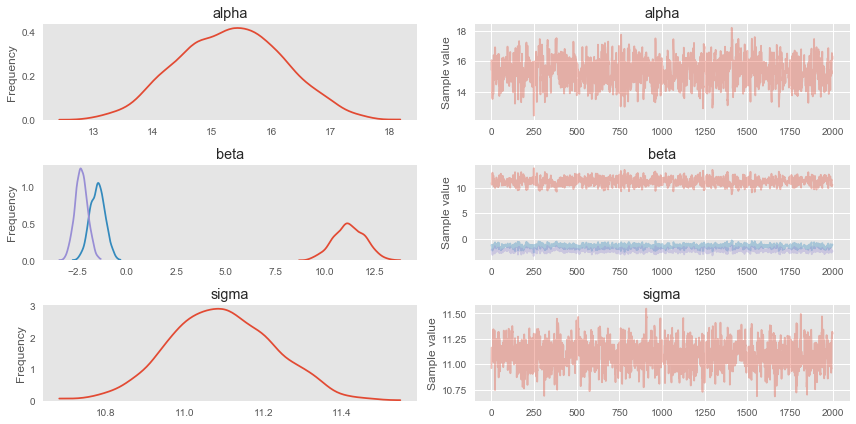

In [266]:
from pymc3 import traceplot
traceplot(trace);